In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline 
import matplotlib
import sklearn
import statsmodels
import os
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams

In [2]:

df = pd.read_csv('Shoesales.csv',parse_dates=True,squeeze=True)
(df)

df.set_index(keys='YearMonth',inplace=True)
df

Shoe_Sales
YearMonth            
1980-01            85
1980-02            89
1980-03           109
1980-04            95
1980-05            91
...               ...
1995-03           188
1995-04           195
1995-05           189
1995-06           220
1995-07           274

[187 rows x 1 columns]

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

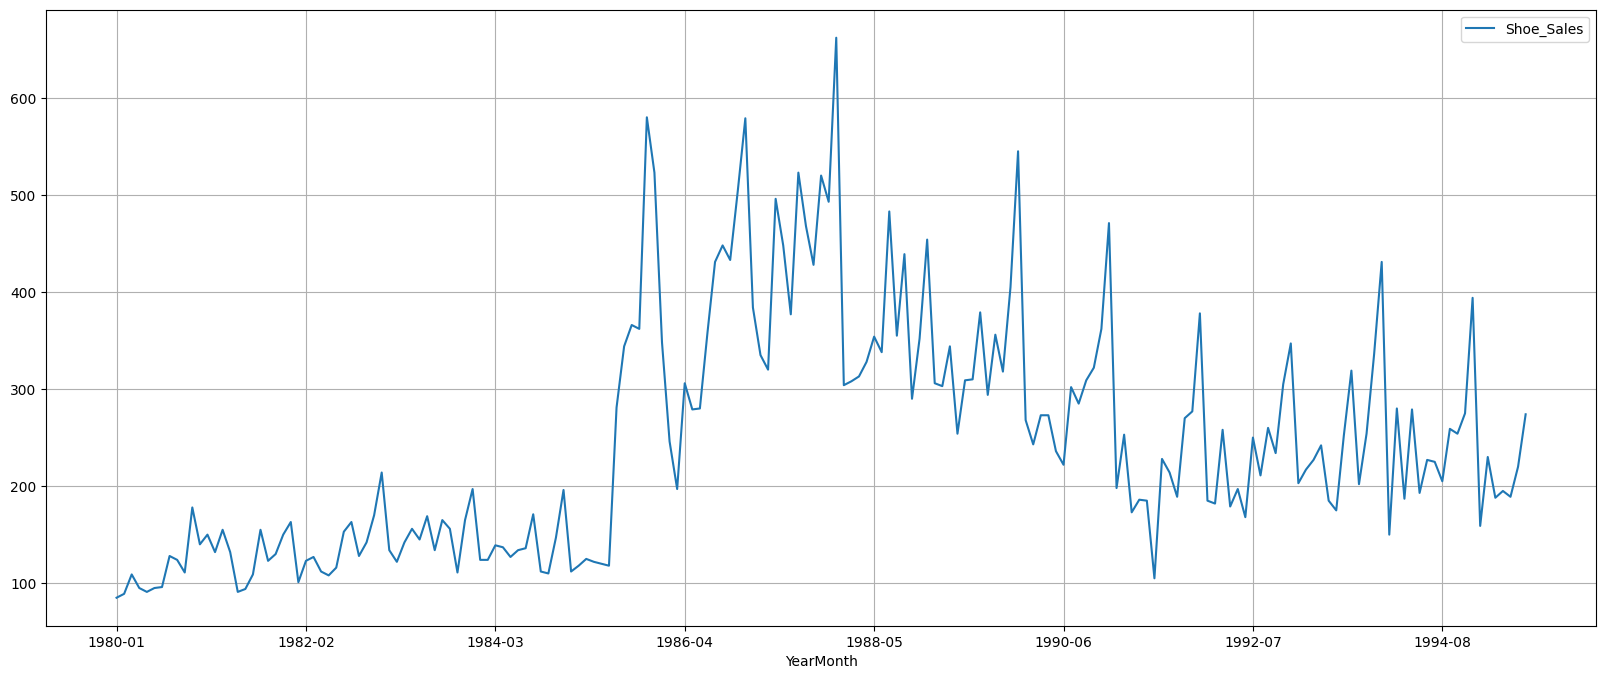

In [4]:
df.plot(grid=True);

In [5]:
df.describe()

Shoe_Sales
count  187.000000
mean   245.636364
std    121.390804
min     85.000000
25%    143.500000
50%    220.000000
75%    315.500000
max    662.000000

In [6]:
df.dtypes

Shoe_Sales    int64
dtype: object

In [7]:
df.tail()

Shoe_Sales
YearMonth            
1995-03           188
1995-04           195
1995-05           189
1995-06           220
1995-07           274

In [8]:
df.shape

(187, 1)

In [9]:
df.info

<bound method DataFrame.info of            Shoe_Sales
YearMonth            
1980-01            85
1980-02            89
1980-03           109
1980-04            95
1980-05            91
...               ...
1995-03           188
1995-04           195
1995-05           189
1995-06           220
1995-07           274

[187 rows x 1 columns]>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, 1980-01 to 1995-07
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Shoe_Sales  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9+ KB


In [11]:
df.describe(include="all")

Shoe_Sales
count  187.000000
mean   245.636364
std    121.390804
min     85.000000
25%    143.500000
50%    220.000000
75%    315.500000
max    662.000000

In [12]:
df.isnull().sum()

Shoe_Sales    0
dtype: int64

In [13]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 42


In [14]:
df.columns


Index(['Shoe_Sales'], dtype='object')

In [15]:
df["Shoe_Sales"].mean()



245.63636363636363

In [16]:
len(df["Shoe_Sales"].value_counts())

145

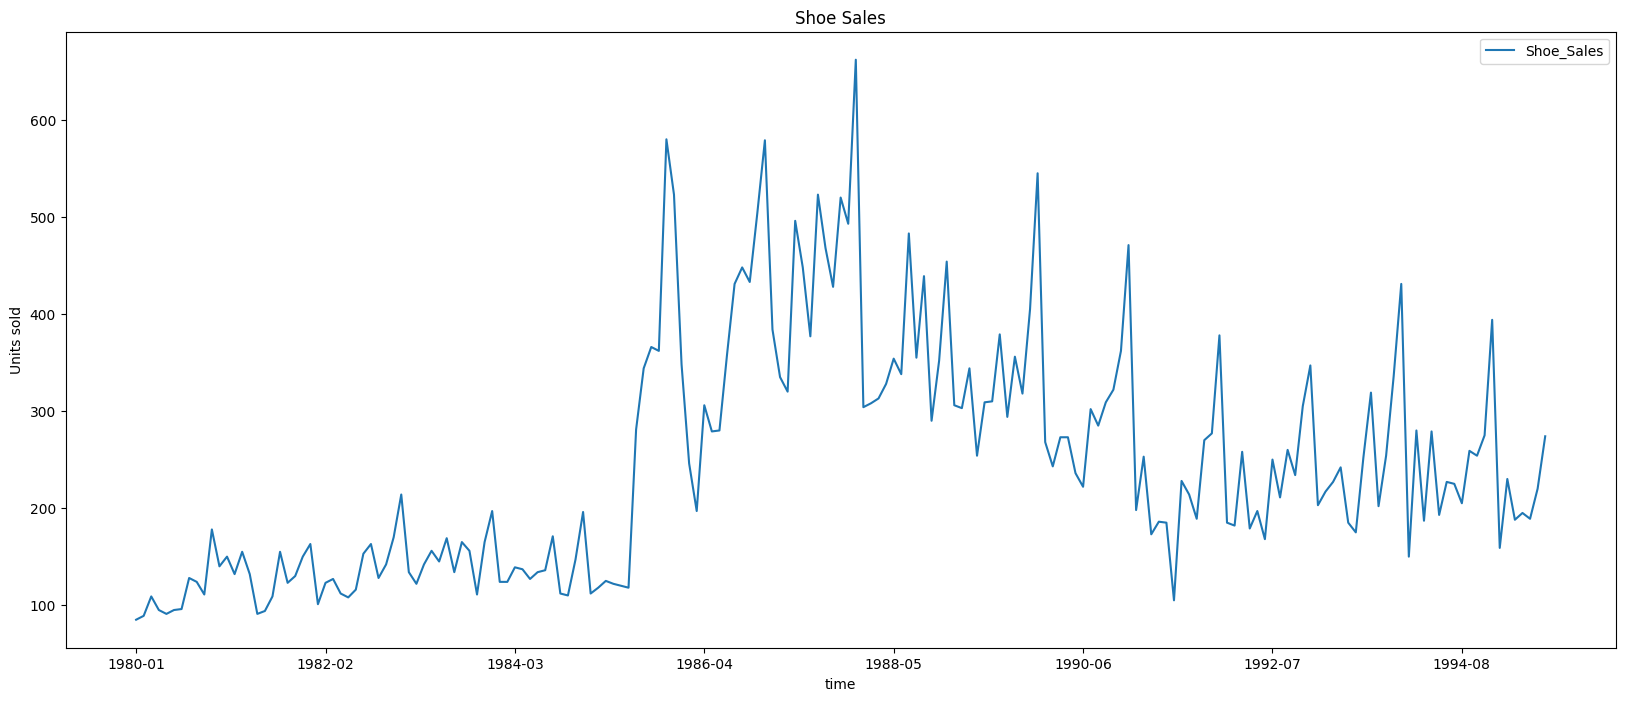

In [17]:
df.plot()
plt.title('Shoe Sales')
plt.xlabel('time')
plt.ylabel('Units sold')
plt.show()

In [18]:
df,type(df)

(           Shoe_Sales
 YearMonth            
 1980-01            85
 1980-02            89
 1980-03           109
 1980-04            95
 1980-05            91
 ...               ...
 1995-03           188
 1995-04           195
 1995-05           189
 1995-06           220
 1995-07           274
 
 [187 rows x 1 columns],
 pandas.core.frame.DataFrame)

<AxesSubplot: xlabel='YearMonth', ylabel='Shoe_Sales'>

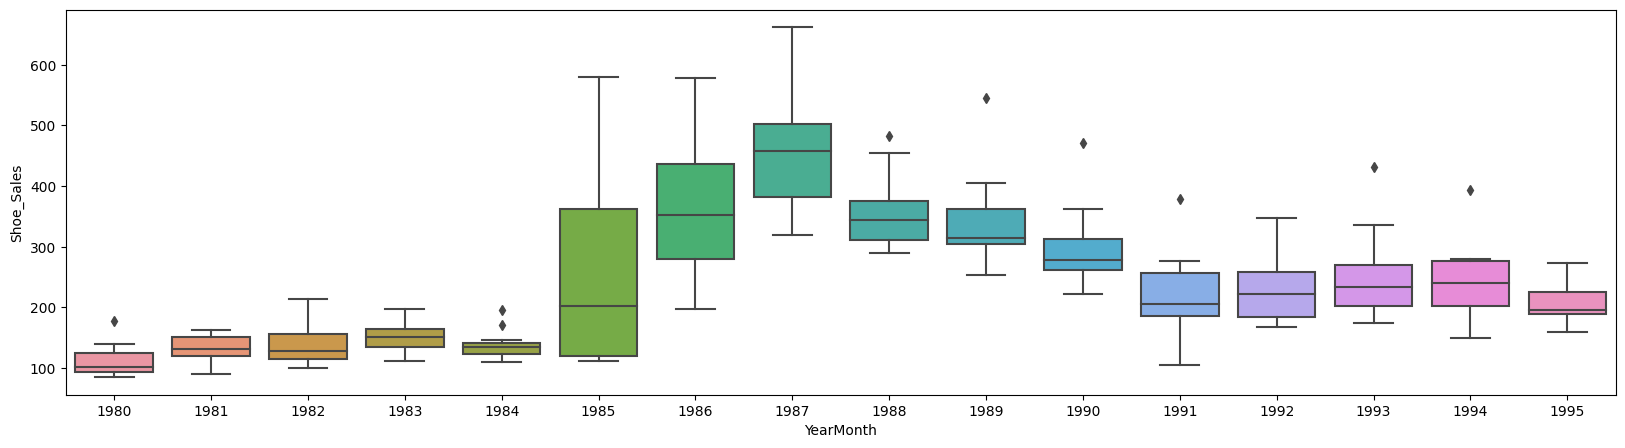

In [19]:
fig, ax = plt.subplots(figsize=(20,5))

sns.boxplot(x = pd.DatetimeIndex(df.index).year, 
                y = df['Shoe_Sales'], 
                ax = ax)


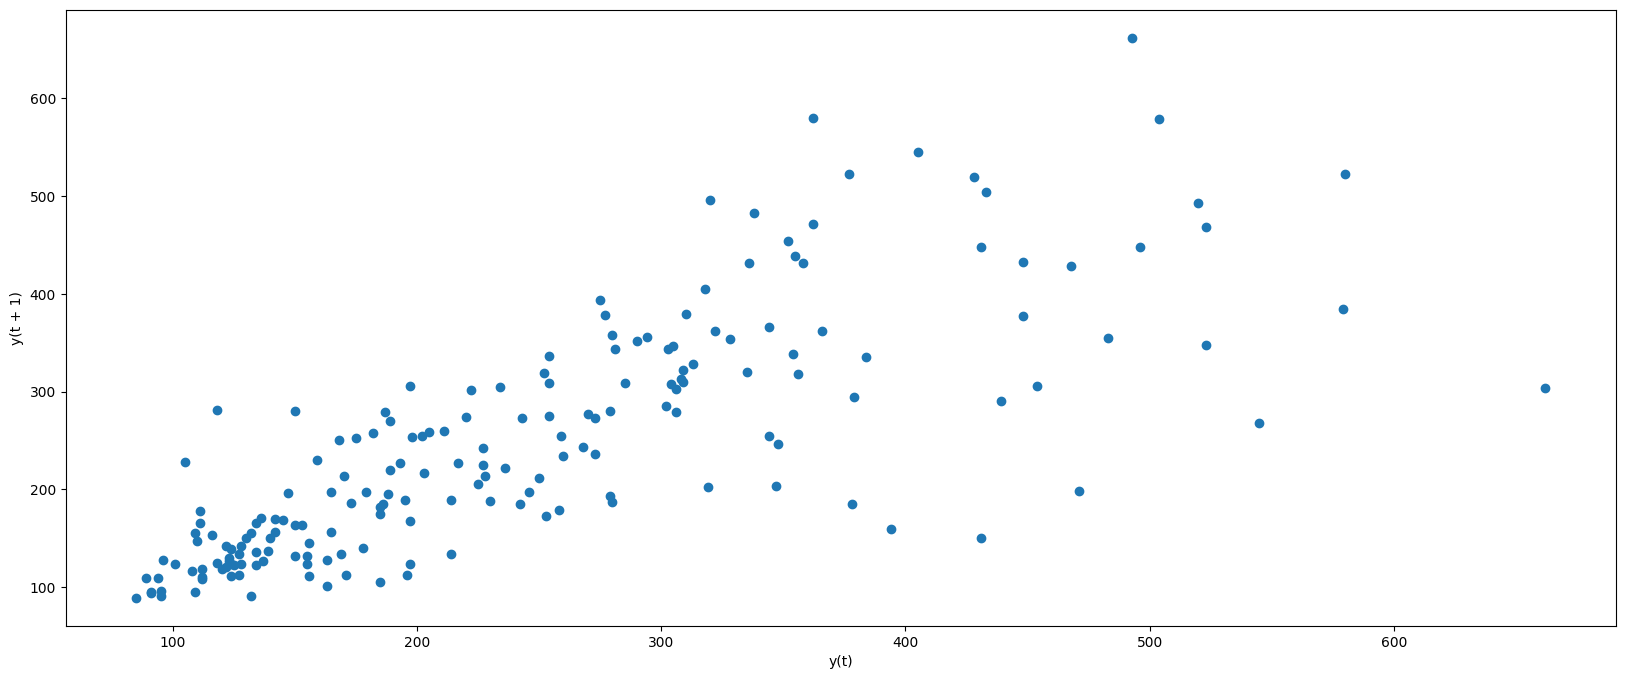

In [20]:
from pandas.plotting import lag_plot
lag_plot(df)
plt.show()

array([[<AxesSubplot: title={'center': 'Shoe_Sales'}>]], dtype=object)

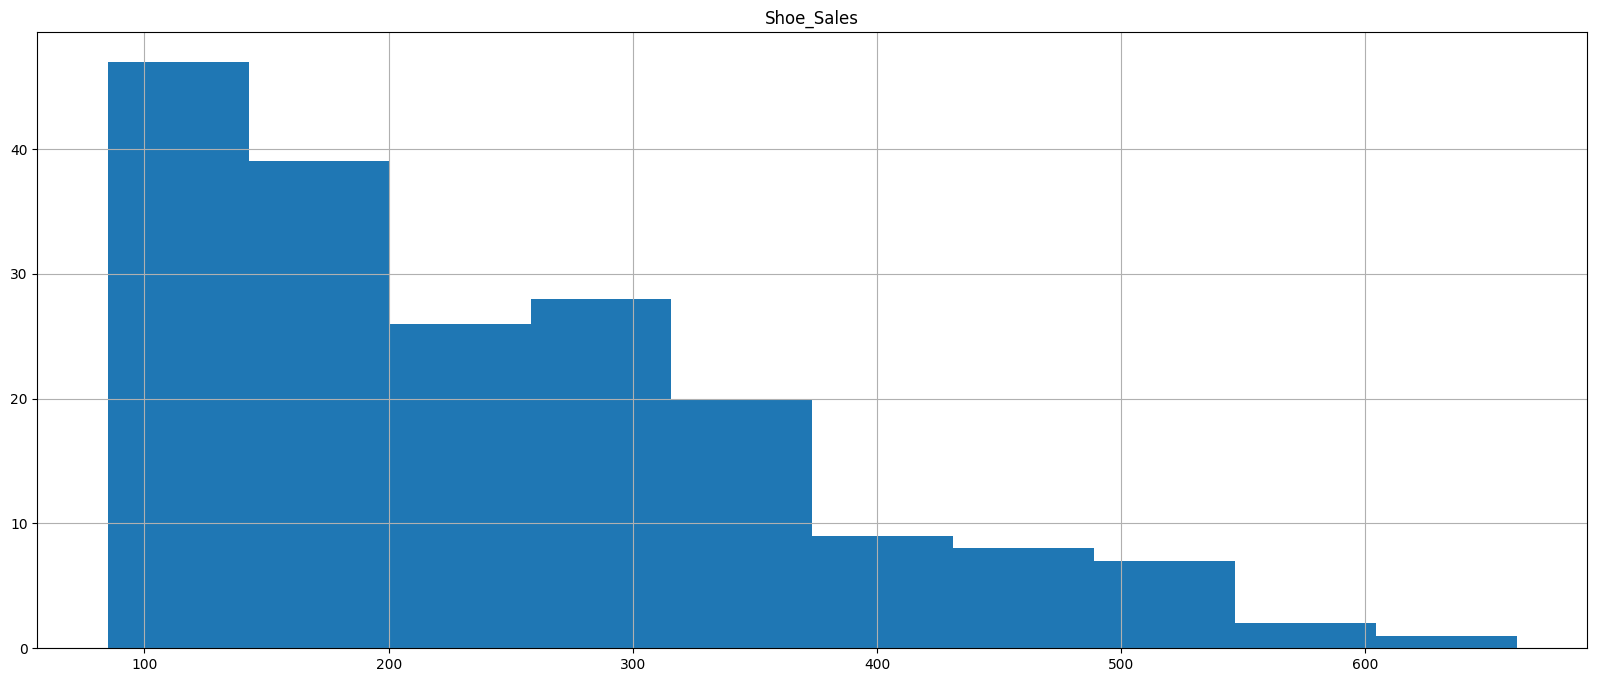

In [21]:
df.hist()

In [22]:
monthly_sales_across_years_shoe = pd.pivot_table(pd.DataFrame(df), columns = pd.DatetimeIndex(df.index).month, 
                                                      index = pd.DatetimeIndex(df.index).year)
monthly_sales_across_years_shoe

Shoe_Sales                                                          \
YearMonth         1      2      3      4      5      6      7      8      9    
YearMonth                                                                      
1980            85.0   89.0  109.0   95.0   91.0   95.0   96.0  128.0  124.0   
1981           150.0  132.0  155.0  132.0   91.0   94.0  109.0  155.0  123.0   
1982           101.0  123.0  127.0  112.0  108.0  116.0  153.0  163.0  128.0   
1983           134.0  122.0  142.0  156.0  145.0  169.0  134.0  165.0  156.0   
1984           124.0  124.0  139.0  137.0  127.0  134.0  136.0  171.0  112.0   
1985           112.0  118.0  125.0  122.0  120.0  118.0  281.0  344.0  366.0   
1986           348.0  246.0  197.0  306.0  279.0  280.0  358.0  431.0  448.0   
1987           384.0  335.0  320.0  496.0  448.0  377.0  523.0  468.0  428.0   
1988           304.0  308.0  313.0  328.0  354.0  338.0  483.0  355.0  439.0   
1989           306.0  303.0  344.0  254.0  309.0  310.0  379.0  294.0  356.0   
1990           268.0  243.0  273.0  273.0  236.0  222.0  302.0  285.0  309.0   
1991           198.0  253.0  173.0  186.0  185.0  105.0  228.0  214.0  189.0   
1992           185.0  182.0  258.0  179.0  197.0  168.0  250.0  211.0  260.0   
1993           203.0  217.0  227.0  242.0  185.0  175.0  252.0  319.0  202.0   
1994           150.0  280.0  187.0  279.0  193.0  227.0  225.0  205.0  259.0   
1995           159.0  230.0  188.0  195.0  189.0  220.0  274.0    NaN    NaN   

                                
YearMonth     10     11     12  
YearMonth                       
1980       111.0  178.0  140.0  
1981       130.0  150.0  163.0  
1982       142.0  170.0  214.0  
1983       111.0  165.0  197.0  
1984       110.0  147.0  196.0  
1985       362.0  580.0  523.0  
1986       433.0  504.0  579.0  
1987       520.0  493.0  662.0  
1988       290.0  352.0  454.0  
1989       318.0  405.0  545.0  
1990       322.0  362.0  471.0  
1991       270.0  277.0  378.0  
1992       234.0  305.0  347.0  
1993       254.0  336.0  431.0  
1994       254.0  275.0  394.0  
1995         NaN    NaN    NaN

In [23]:
df['Shoe_Sales']
type(df)

pandas.core.frame.DataFrame

In [24]:
df

Shoe_Sales
YearMonth            
1980-01            85
1980-02            89
1980-03           109
1980-04            95
1980-05            91
...               ...
1995-03           188
1995-04           195
1995-05           189
1995-06           220
1995-07           274

[187 rows x 1 columns]

In [25]:
train = df[df.index<'1991'] 
test = df[df.index>='1991']
print(type(train),train.shape,train,test.shape)

<class 'pandas.core.frame.DataFrame'> (132, 1)            Shoe_Sales
YearMonth            
1980-01            85
1980-02            89
1980-03           109
1980-04            95
1980-05            91
...               ...
1990-08           285
1990-09           309
1990-10           322
1990-11           362
1990-12           471

[132 rows x 1 columns] (55, 1)


In [26]:
from IPython.display import display

In [27]:
print('First few rows of Training Data')
display(train.head())
# from sklearn.preprocessing import MinMaxScaler
# mmscaler = MinMaxScaler()

# X_train_norm = mmscaler.fit_transform(train)
# display(X_train_norm.head())

# print('Last few rows of Training Data')
# display(train.tail())
# print('First few rows of Test Data')
# display(test.head())
# print('Last few rows of Test Data')
# display(test.tail())

from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics 
scaler = MinMaxScaler()
# Fitting and Transforming the Training data
print("#### X_train before and after scaling ####")
print(train.head())
train[train.columns] = scaler.fit_transform(train[train.columns])
print(train.head())
print(scaler.data_max_, scaler.data_min_)
# Transforming the Teating data
print("#### X_test before and after scaling ####")
print(test.head())
test[test.columns] = scaler.fit_transform(test[test.columns])
print(test.head())


First few rows of Training Data


Shoe_Sales
YearMonth            
1980-01            85
1980-02            89
1980-03           109
1980-04            95
1980-05            91

#### X_train before and after scaling ####
           Shoe_Sales
YearMonth            
1980-01            85
1980-02            89
1980-03           109
1980-04            95
1980-05            91
           Shoe_Sales
YearMonth            
1980-01      0.000000
1980-02      0.006932
1980-03      0.041594
1980-04      0.017331
1980-05      0.010399
[662.] [85.]
#### X_test before and after scaling ####
           Shoe_Sales
YearMonth            
1991-01           198
1991-02           253
1991-03           173
1991-04           186
1991-05           185
           Shoe_Sales
YearMonth            
1991-01      0.285276
1991-02      0.453988
1991-03      0.208589
1991-04      0.248466
1991-05      0.245399


In [28]:
print(test.tail())

           Shoe_Sales
YearMonth            
1995-03      0.254601
1995-04      0.276074
1995-05      0.257669
1995-06      0.352761
1995-07      0.518405


In [29]:
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

/home/avpl/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [30]:
model_SES_autofit = model_SES.fit(optimized=True)

In [31]:
model_SES_autofit.params

{'smoothing_level': 0.6050523566997209,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 0.0066508567152673,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [32]:
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-01    0.580988
1991-02-01    0.580988
1991-03-01    0.580988
1991-04-01    0.580988
1991-05-01    0.580988
1991-06-01    0.580988
1991-07-01    0.580988
1991-08-01    0.580988
1991-09-01    0.580988
1991-10-01    0.580988
1991-11-01    0.580988
1991-12-01    0.580988
1992-01-01    0.580988
1992-02-01    0.580988
1992-03-01    0.580988
1992-04-01    0.580988
1992-05-01    0.580988
1992-06-01    0.580988
1992-07-01    0.580988
1992-08-01    0.580988
1992-09-01    0.580988
1992-10-01    0.580988
1992-11-01    0.580988
1992-12-01    0.580988
1993-01-01    0.580988
1993-02-01    0.580988
1993-03-01    0.580988
1993-04-01    0.580988
1993-05-01    0.580988
1993-06-01    0.580988
1993-07-01    0.580988
1993-08-01    0.580988
1993-09-01    0.580988
1993-10-01    0.580988
1993-11-01    0.580988
1993-12-01    0.580988
1994-01-01    0.580988
1994-02-01    0.580988
1994-03-01    0.580988
1994-04-01    0.580988
1994-05-01    0.580988
1994-06-01    0.580988
1994-07-01    0.580988
1994-08-01 

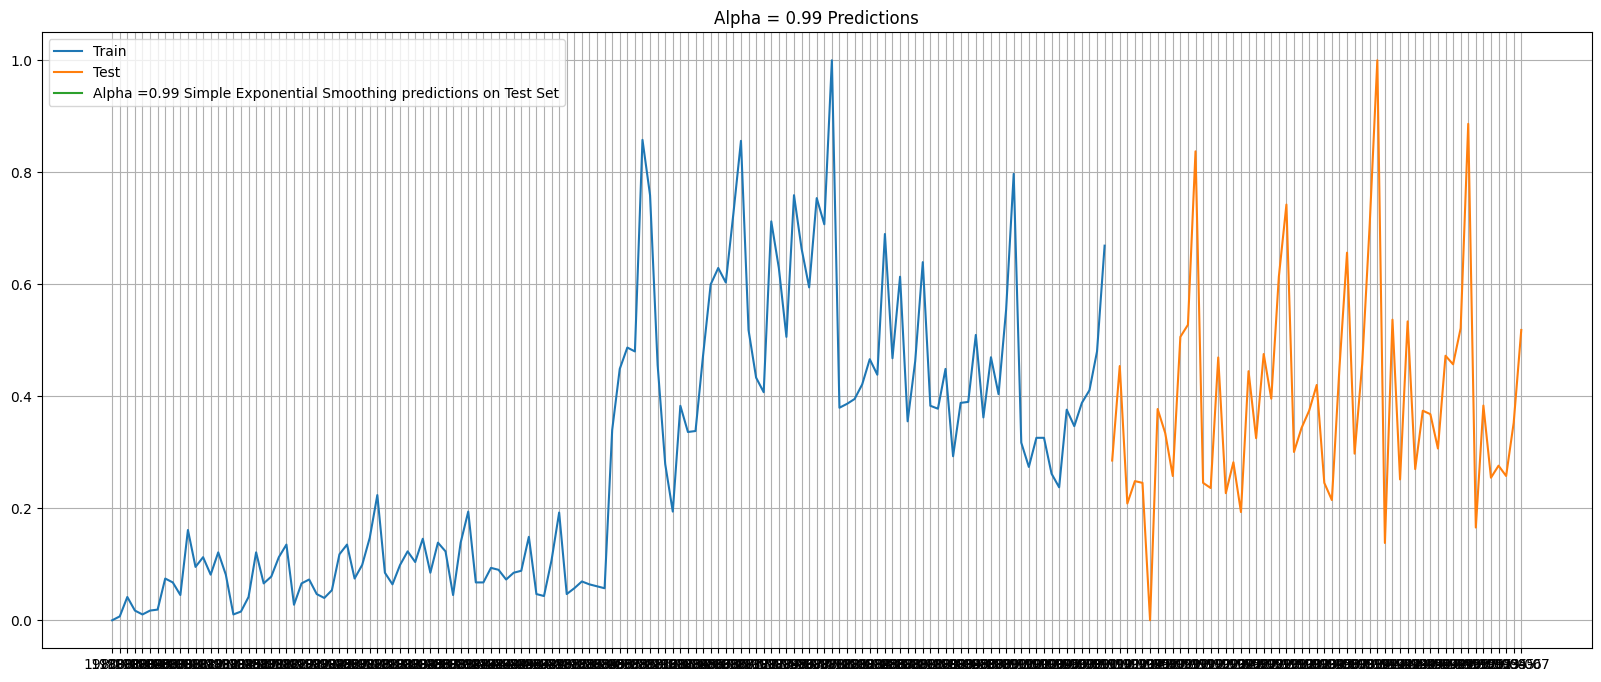

In [33]:

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict[0], label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

In [34]:

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

SES_predict.values

array([0.58098846, 0.58098846, 0.58098846, 0.58098846, 0.58098846,
       0.58098846, 0.58098846, 0.58098846, 0.58098846, 0.58098846,
       0.58098846, 0.58098846, 0.58098846, 0.58098846, 0.58098846,
       0.58098846, 0.58098846, 0.58098846, 0.58098846, 0.58098846,
       0.58098846, 0.58098846, 0.58098846, 0.58098846, 0.58098846,
       0.58098846, 0.58098846, 0.58098846, 0.58098846, 0.58098846,
       0.58098846, 0.58098846, 0.58098846, 0.58098846, 0.58098846,
       0.58098846, 0.58098846, 0.58098846, 0.58098846, 0.58098846,
       0.58098846, 0.58098846, 0.58098846, 0.58098846, 0.58098846,
       0.58098846, 0.58098846, 0.58098846, 0.58098846, 0.58098846,
       0.58098846, 0.58098846, 0.58098846, 0.58098846, 0.58098846])

In [35]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values[0]))

SES RMSE: 0.2654185125860849
SES RMSE (calculated using statsmodels): [0.26541851]


In [36]:
resultsDf = pd.DataFrame({'RMSE': [em.rmse(test.values,SES_predict.values[0])]},index=['Alpha=0.99,SES'])
resultsDf

RMSE
Alpha=0.99,SES  [0.2654185125860849]

In [37]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.5995122101610626, 'smoothing_trend': 0.0, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': -0.0006130248666581152, 'initial_trend': 0.004413149557460279, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/home/avpl/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [38]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-01    0.586864
1991-02-01    0.591277
1991-03-01    0.595690
1991-04-01    0.600103
1991-05-01    0.604516
1991-06-01    0.608929
1991-07-01    0.613343
1991-08-01    0.617756
1991-09-01    0.622169
1991-10-01    0.626582
1991-11-01    0.630995
1991-12-01    0.635408
1992-01-01    0.639821
1992-02-01    0.644235
1992-03-01    0.648648
1992-04-01    0.653061
1992-05-01    0.657474
1992-06-01    0.661887
1992-07-01    0.666300
1992-08-01    0.670713
1992-09-01    0.675127
1992-10-01    0.679540
1992-11-01    0.683953
1992-12-01    0.688366
1993-01-01    0.692779
1993-02-01    0.697192
1993-03-01    0.701605
1993-04-01    0.706019
1993-05-01    0.710432
1993-06-01    0.714845
1993-07-01    0.719258
1993-08-01    0.723671
1993-09-01    0.728084
1993-10-01    0.732498
1993-11-01    0.736911
1993-12-01    0.741324
1994-01-01    0.745737
1994-02-01    0.750150
1994-03-01    0.754563
1994-04-01    0.758976
1994-05-01    0.763390
1994-06-01    0.767803
1994-07-01    0.772216
1994-08-01 

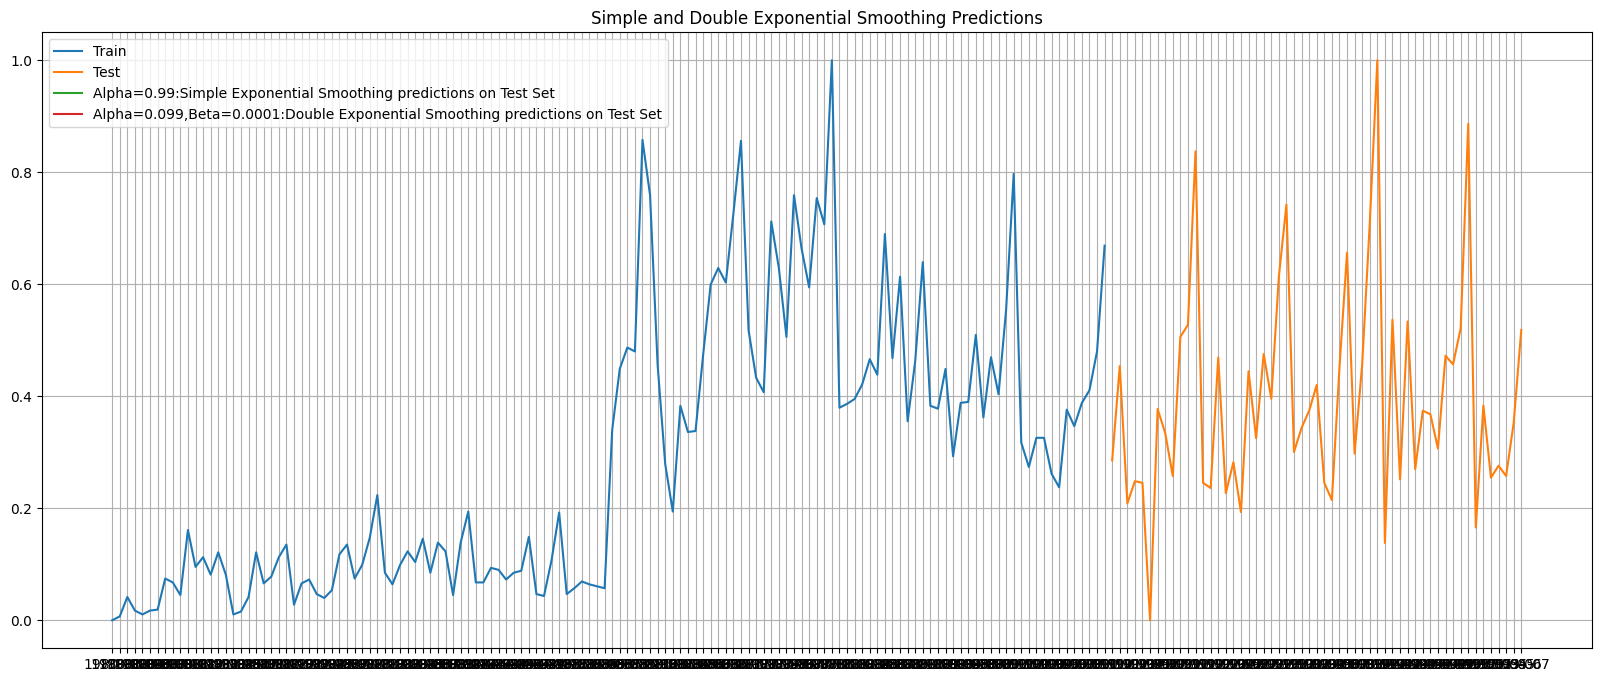

In [39]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict[0], label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict[0], label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [40]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 0.3650704016314725


In [41]:
resultsDf_temp = pd.DataFrame({'RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=1,Beta=0.0189:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

RMSE
Alpha=0.99,SES           [0.2654185125860849]
Alpha=1,Beta=0.0189:DES               0.36507

In [42]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.6122691490499219, 'smoothing_trend': 0.0, 'smoothing_seasonal': 0.2368408636759404, 'damping_trend': nan, 'initial_level': 0.08384598628068707, 'initial_trend': 0.002308752170501752, 'initial_seasons': array([-0.08561216, -0.08832152, -0.0416631 , -0.03286573, -0.05037632,
       -0.02503821,  0.01849831,  0.06695191,  0.04359109,  0.03280233,
        0.11707029,  0.07425347]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/home/avpl/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [43]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-01    0.253047
1991-02-01    0.249362
1991-03-01    0.298823
1991-04-01    0.333133
1991-05-01    0.349986
1991-06-01    0.334822
1991-07-01    0.487649
1991-08-01    0.422729
1991-09-01    0.478862
1991-10-01    0.435967
1991-11-01    0.534026
1991-12-01    0.682077
1992-01-01    0.280752
1992-02-01    0.277067
1992-03-01    0.326528
1992-04-01    0.360838
1992-05-01    0.377691
1992-06-01    0.362527
1992-07-01    0.515354
1992-08-01    0.450434
1992-09-01    0.506567
1992-10-01    0.463672
1992-11-01    0.561731
1992-12-01    0.709782
1993-01-01    0.308457
1993-02-01    0.304772
1993-03-01    0.354233
1993-04-01    0.388543
1993-05-01    0.405396
1993-06-01    0.390232
1993-07-01    0.543059
1993-08-01    0.478139
1993-09-01    0.534272
1993-10-01    0.491377
1993-11-01    0.589436
1993-12-01    0.737487
1994-01-01    0.336162
1994-02-01    0.332477
1994-03-01    0.381938
1994-04-01    0.416248
1994-05-01    0.433101
1994-06-01    0.417937
1994-07-01    0.570764
1994-08-01 

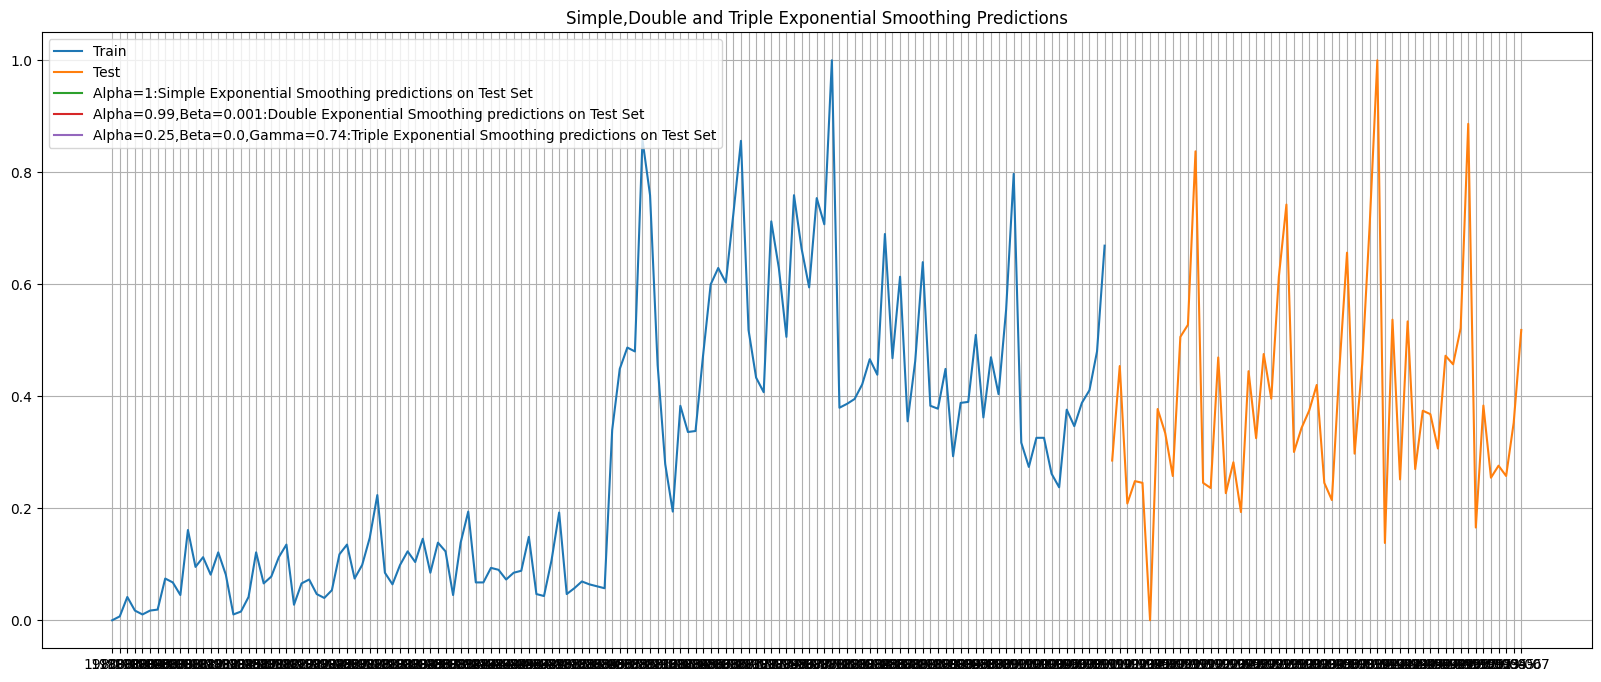

In [44]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict[0], label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict[0], label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict[0], label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [45]:
print('RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

RMSE: 0.1370742465424607


In [46]:
resultsDf_temp = pd.DataFrame({'RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.25,Beta=0.0,Gamma=0.74:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

RMSE
Alpha=0.99,SES                      [0.2654185125860849]
Alpha=1,Beta=0.0189:DES                          0.36507
Alpha=0.25,Beta=0.0,Gamma=0.74:TES              0.137074

In [47]:
df = pd.read_csv('Shoesales.csv',parse_dates=True,squeeze=True)
df.head()
df.set_index('YearMonth',inplace = True)
df

Shoe_Sales
YearMonth            
1980-01            85
1980-02            89
1980-03           109
1980-04            95
1980-05            91
...               ...
1995-03           188
1995-04           195
1995-05           189
1995-06           220
1995-07           274

[187 rows x 1 columns]

In [48]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [49]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

LinearRegression_test
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

type(LinearRegression_train)

pandas.core.frame.DataFrame

In [50]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data',LinearRegression_test.tail(),'\n')

First few rows of Training Data            Shoe_Sales  time
YearMonth                  
1980-01      0.000000     1
1980-02      0.006932     2
1980-03      0.041594     3
1980-04      0.017331     4
1980-05      0.010399     5 

Last few rows of Training Data            Shoe_Sales  time
YearMonth                  
1990-08      0.346620   128
1990-09      0.388215   129
1990-10      0.410745   130
1990-11      0.480069   131
1990-12      0.668977   132 

First few rows of Test Data            Shoe_Sales  time
YearMonth                  
1991-01      0.285276   133
1991-02      0.453988   134
1991-03      0.208589   135
1991-04      0.248466   136
1991-05      0.245399   137 

Last few rows of Test Data            Shoe_Sales  time
YearMonth                  
1995-03      0.254601   183
1995-04      0.276074   184
1995-05      0.257669   185
1995-06      0.352761   186
1995-07      0.518405   187 



In [51]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Shoe_Sales'].values)

LinearRegression()

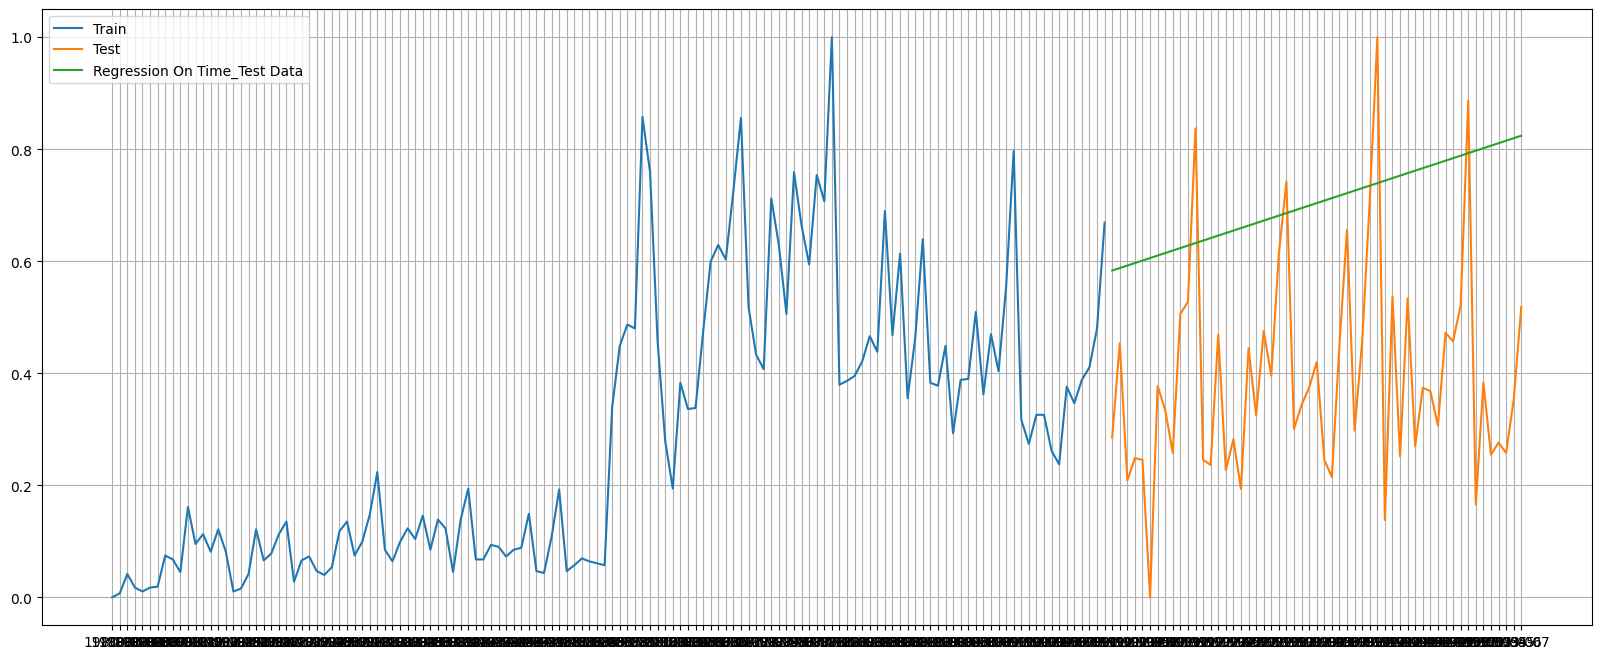

In [52]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Shoe_Sales'], label='Train')
plt.plot(test['Shoe_Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [53]:
rmse_model1_test = metrics.mean_squared_error(test['Shoe_Sales'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 0.363 


In [54]:
resultsDf_reg = pd.DataFrame({'RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf = pd.concat([resultsDf, resultsDf_reg])
resultsDf

RMSE
Alpha=0.99,SES                      [0.2654185125860849]
Alpha=1,Beta=0.0189:DES                          0.36507
Alpha=0.25,Beta=0.0,Gamma=0.74:TES              0.137074
RegressionOnTime                                0.363304

In [55]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [56]:
train.columns

Index(['Shoe_Sales'], dtype='object')

In [57]:
NaiveModel_test['naive'] = np.asarray(train['Shoe_Sales'])[len(np.asarray(train['Shoe_Sales']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01    0.668977
1991-02    0.668977
1991-03    0.668977
1991-04    0.668977
1991-05    0.668977
Name: naive, dtype: float64

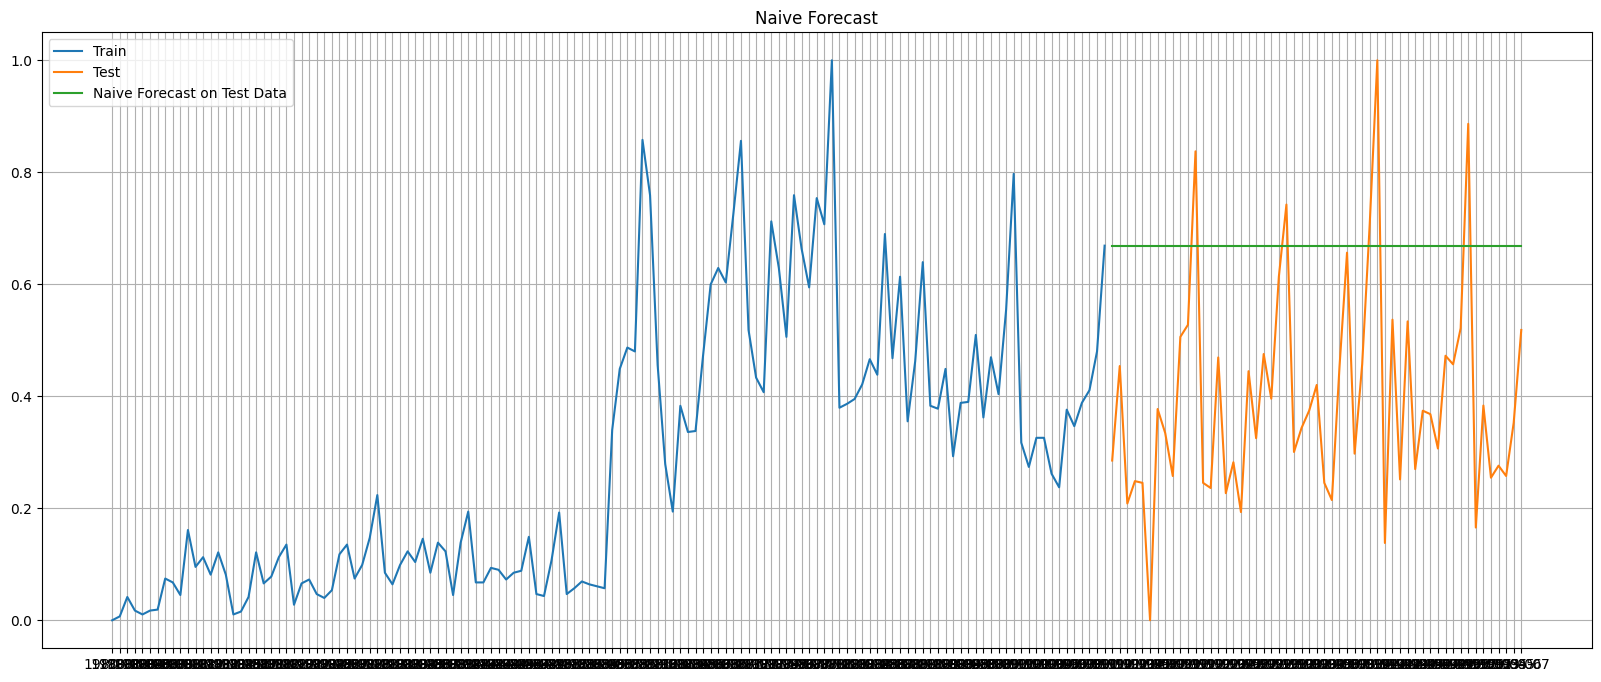

In [58]:
plt.plot(NaiveModel_train['Shoe_Sales'], label='Train')
plt.plot(test['Shoe_Sales'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [59]:
rmse_model2_test = metrics.mean_squared_error(test['Shoe_Sales'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 0.333


In [60]:
resultsDf_2 = pd.DataFrame({'RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
type(resultsDf)

pandas.core.frame.DataFrame

In [61]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()
print(train.mean())
print(test.mean())

Shoe_Sales    0.28696
dtype: float64
Shoe_Sales    0.395036
dtype: float64


In [62]:
SimpleAverage_test['mean_forecast'] = train['Shoe_Sales'].mean()
SimpleAverage_test.head()

Shoe_Sales  mean_forecast
YearMonth                           
1991-01      0.285276        0.28696
1991-02      0.453988        0.28696
1991-03      0.208589        0.28696
1991-04      0.248466        0.28696
1991-05      0.245399        0.28696

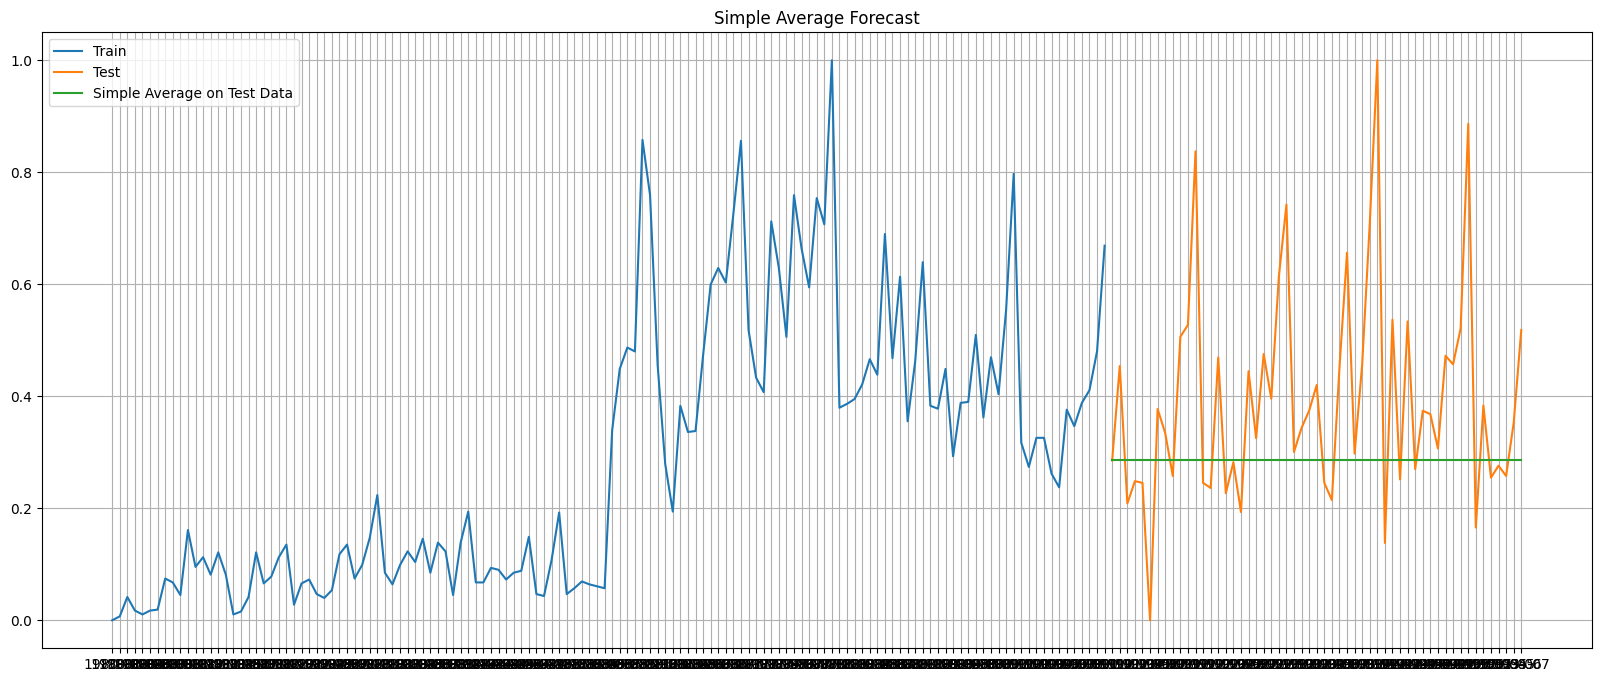

In [63]:
plt.plot(SimpleAverage_train['Shoe_Sales'], label='Train')
plt.plot(SimpleAverage_test['Shoe_Sales'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [64]:
rmse_model3_test = metrics.mean_squared_error(test['Shoe_Sales'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 0.218


In [65]:
resultsDf_3 = pd.DataFrame({'RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

RMSE
Alpha=0.99,SES                      [0.2654185125860849]
Alpha=1,Beta=0.0189:DES                          0.36507
Alpha=0.25,Beta=0.0,Gamma=0.74:TES              0.137074
RegressionOnTime                                0.363304
NaiveModel                                      0.333035
SimpleAverageModel                              0.218058

In [66]:
MovingAverage = df.copy()
MovingAverage.head()

scaler = MinMaxScaler()
# Fitting and Transforming the Training data
print(MovingAverage.head())
MovingAverage[MovingAverage.columns] = scaler.fit_transform(MovingAverage[MovingAverage.columns])
print(MovingAverage.head())
print(scaler.data_max_, scaler.data_min_)



           Shoe_Sales
YearMonth            
1980-01            85
1980-02            89
1980-03           109
1980-04            95
1980-05            91
           Shoe_Sales
YearMonth            
1980-01      0.000000
1980-02      0.006932
1980-03      0.041594
1980-04      0.017331
1980-05      0.010399
[662.] [85.]


In [67]:

MovingAverage['Trailing_2'] = MovingAverage['Shoe_Sales'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Shoe_Sales'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Shoe_Sales'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Shoe_Sales'].rolling(9).mean()

MovingAverage.head()

Shoe_Sales  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                            
1980-01      0.000000         NaN         NaN         NaN         NaN
1980-02      0.006932    0.003466         NaN         NaN         NaN
1980-03      0.041594    0.024263         NaN         NaN         NaN
1980-04      0.017331    0.029463    0.016464         NaN         NaN
1980-05      0.010399    0.013865    0.019064         NaN         NaN

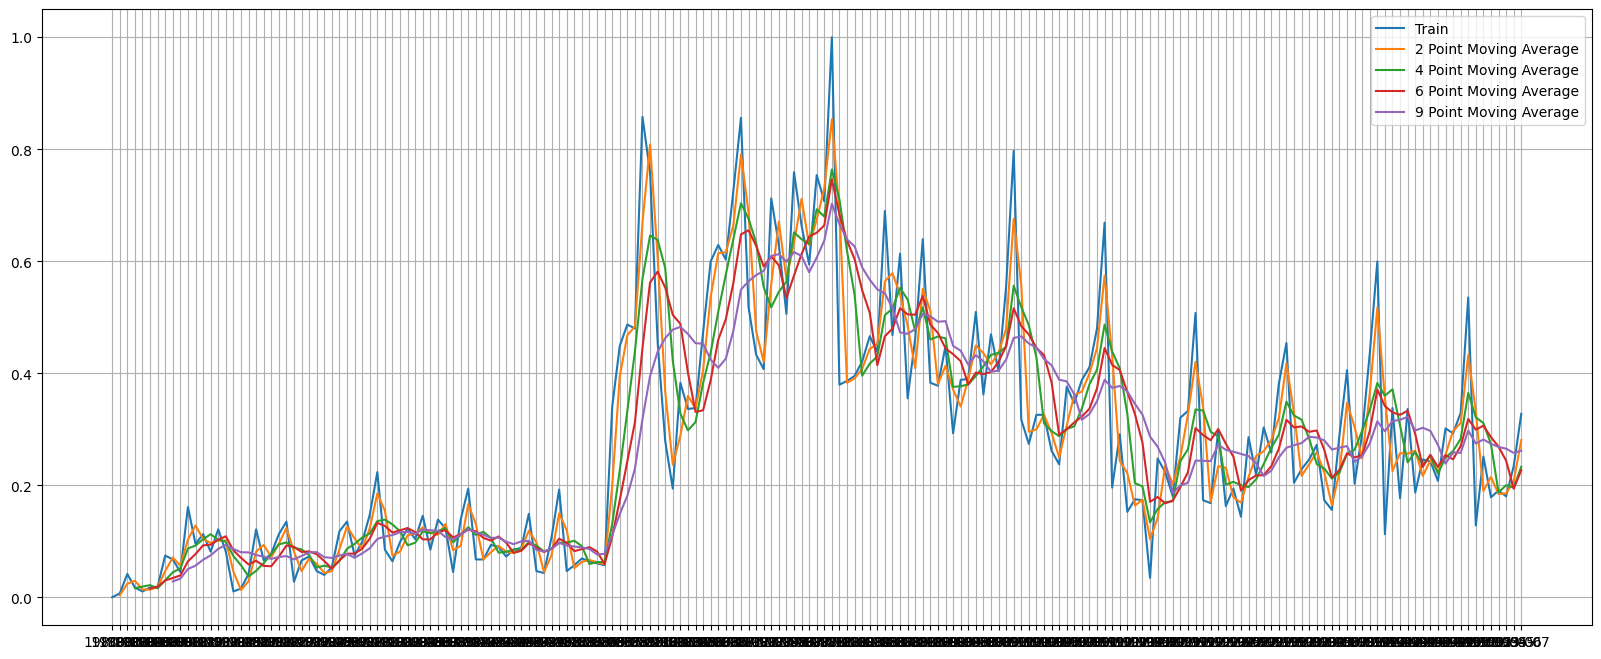

In [68]:

plt.plot(MovingAverage['Shoe_Sales'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [69]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(train))] 

trailing_MovingAverage_test=MovingAverage[int(len(train)):]


YearMonth
1991-01    0.285276
1991-02    0.453988
1991-03    0.208589
1991-04    0.248466
1991-05    0.245399
Name: Shoe_Sales, dtype: float64

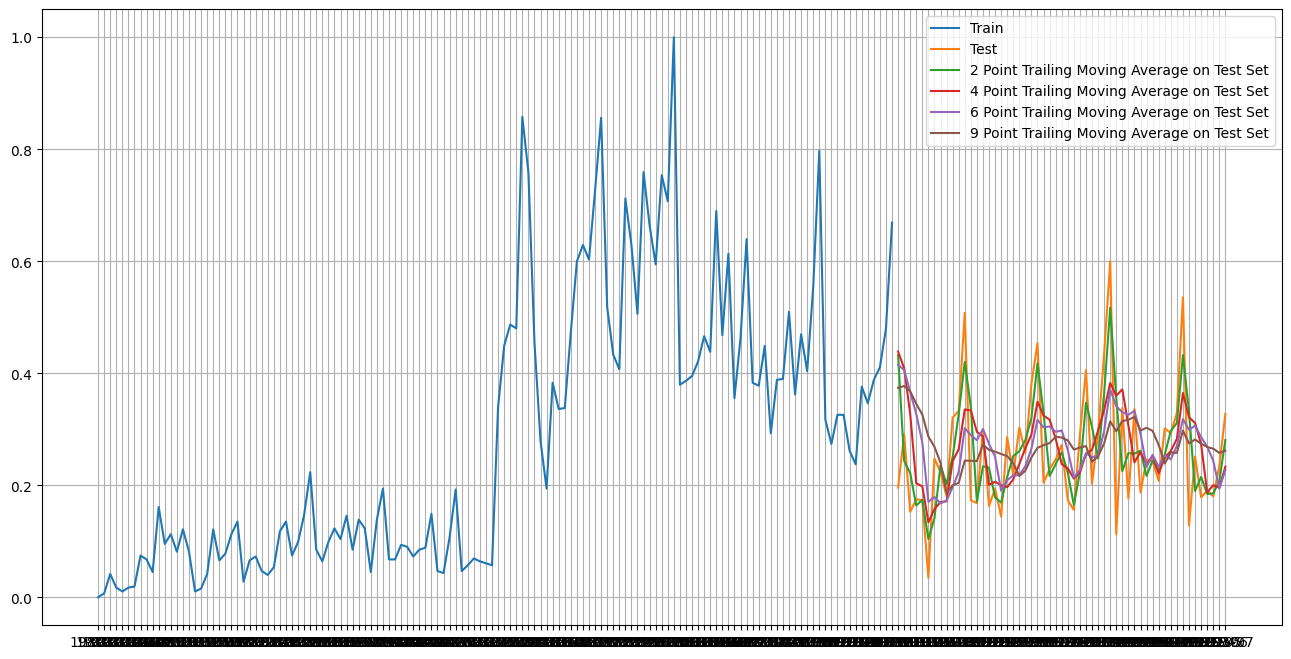

In [70]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Shoe_Sales'], label='Train')
plt.plot(trailing_MovingAverage_test['Shoe_Sales'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

test['Shoe_Sales'].head()

In [71]:
trailing_MovingAverage_test['Trailing_2'].head()

YearMonth
1991-01    0.432409
1991-02    0.243501
1991-03    0.221837
1991-04    0.163778
1991-05    0.174177
Name: Trailing_2, dtype: float64

In [72]:
test['Shoe_Sales'].shape,trailing_MovingAverage_test['Trailing_2'].shape

((55,), (55,))

In [73]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Shoe_Sales'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Shoe_Sales'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Shoe_Sales'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Shoe_Sales'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 0.199
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 0.216
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 0.224
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 0.230


In [74]:
resultsDf_4 = pd.DataFrame({'RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

RMSE
Alpha=0.99,SES                      [0.2654185125860849]
Alpha=1,Beta=0.0189:DES                          0.36507
Alpha=0.25,Beta=0.0,Gamma=0.74:TES              0.137074
RegressionOnTime                                0.363304
NaiveModel                                      0.333035
SimpleAverageModel                              0.218058
2pointTrailingMovingAverage                      0.19928
4pointTrailingMovingAverage                     0.215983
6pointTrailingMovingAverage                      0.22363
9pointTrailingMovingAverage                     0.230484

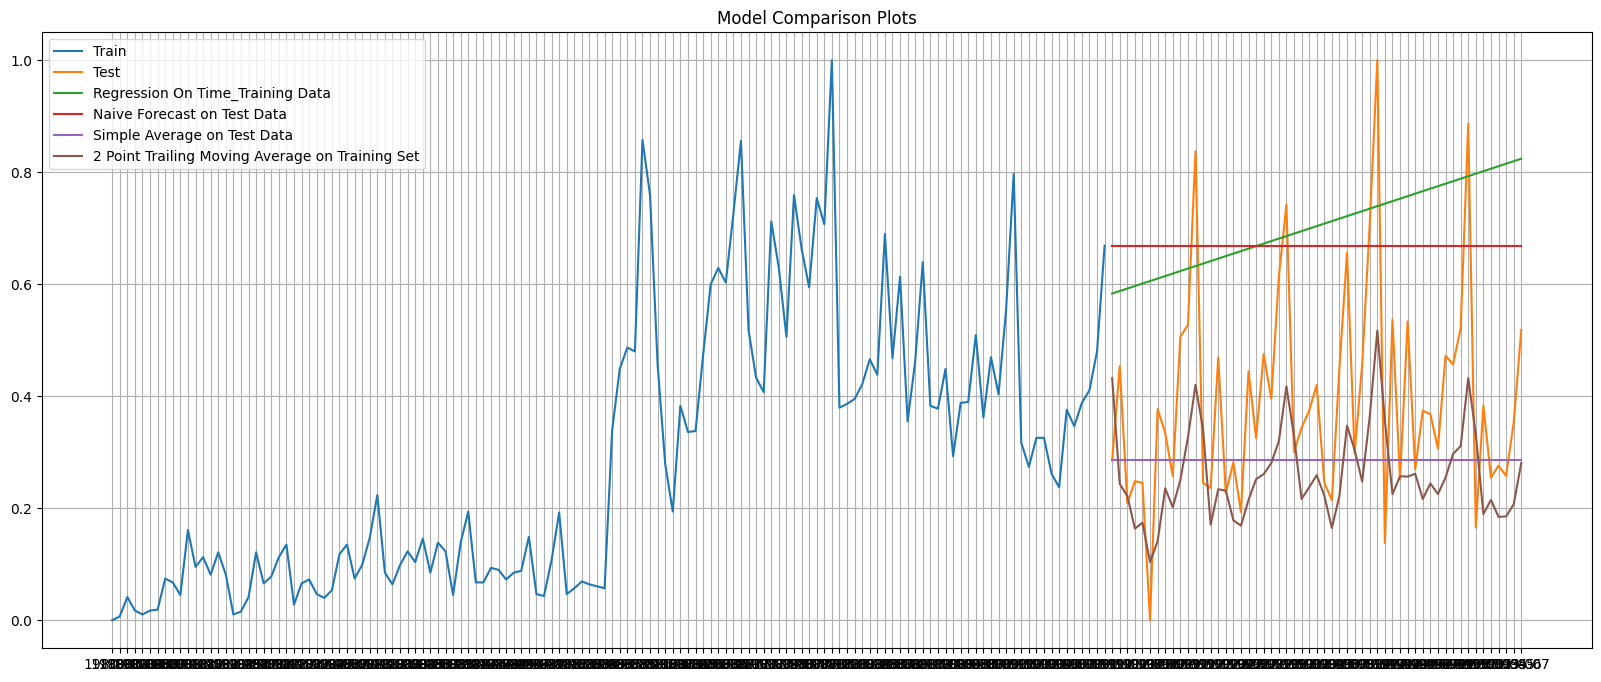

In [75]:
## Plotting on both Training and Test data

plt.plot(train['Shoe_Sales'], label='Train')
plt.plot(test['Shoe_Sales'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

In [76]:
# pd.DatetimeIndex(df.index).year
df
df.index = pd.DatetimeIndex(df.index)
df.index

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '1994-10-01', '1994-11-01', '1994-12-01', '1995-01-01',
               '1995-02-01', '1995-03-01', '1995-04-01', '1995-05-01',
               '1995-06-01', '1995-07-01'],
              dtype='datetime64[ns]', name='YearMonth', length=187, freq=None)

In [77]:
from    statsmodels.tsa.seasonal import   seasonal_decompose
print(df.index)

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '1994-10-01', '1994-11-01', '1994-12-01', '1995-01-01',
               '1995-02-01', '1995-03-01', '1995-04-01', '1995-05-01',
               '1995-06-01', '1995-07-01'],
              dtype='datetime64[ns]', name='YearMonth', length=187, freq=None)


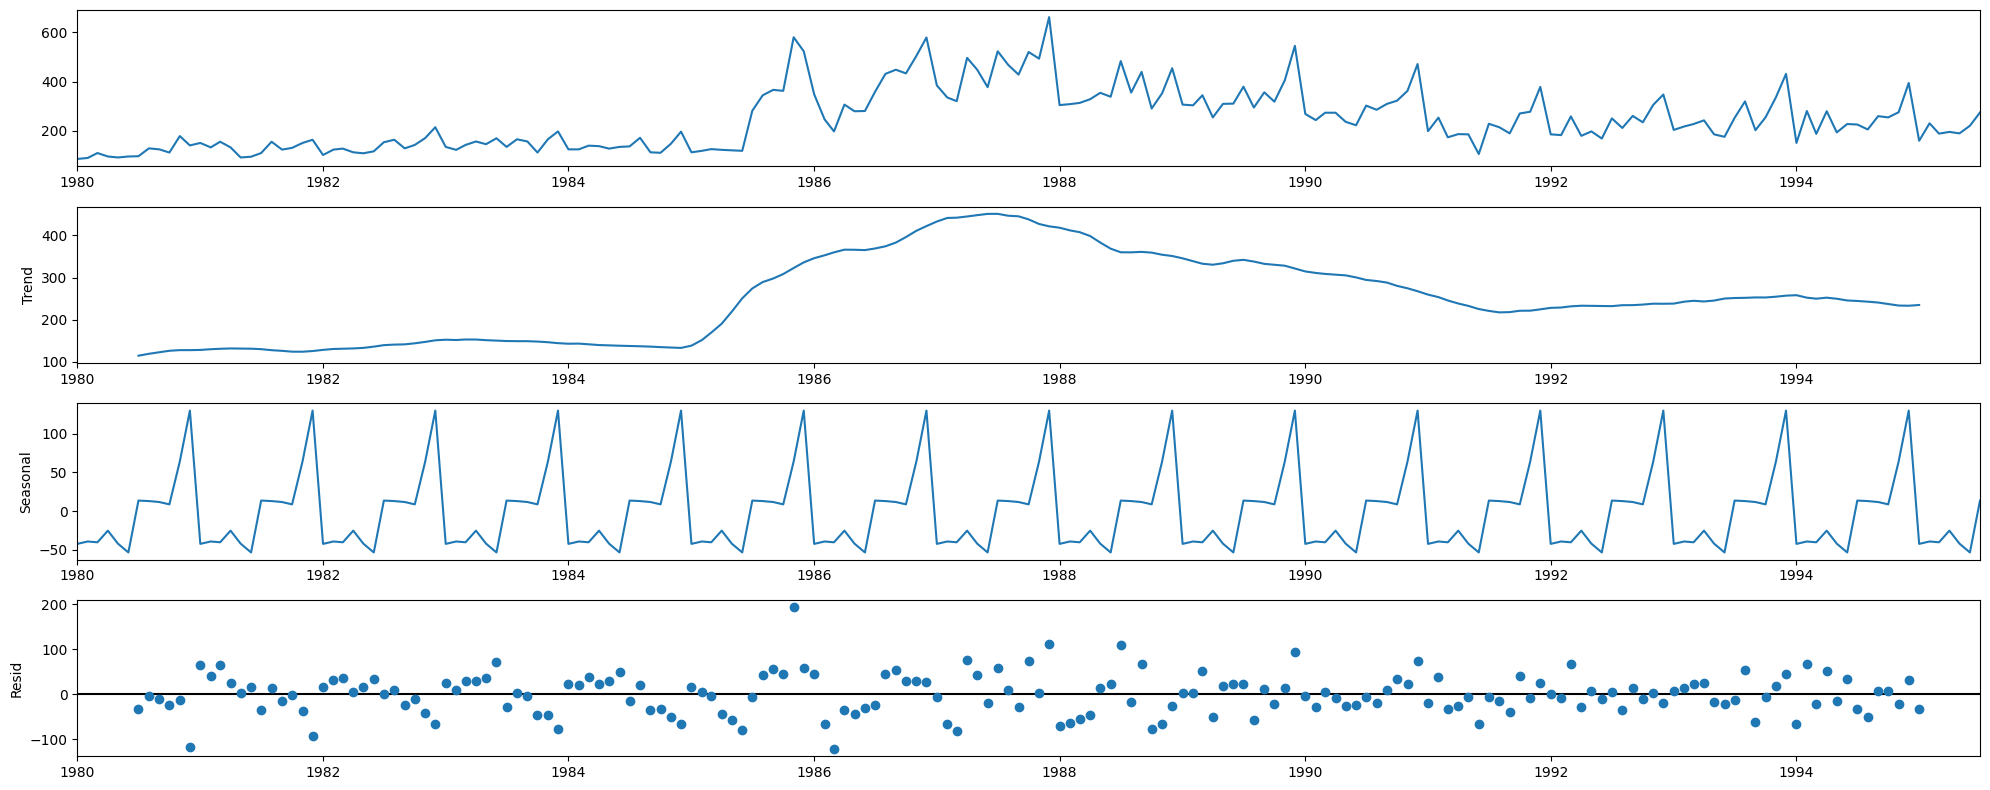

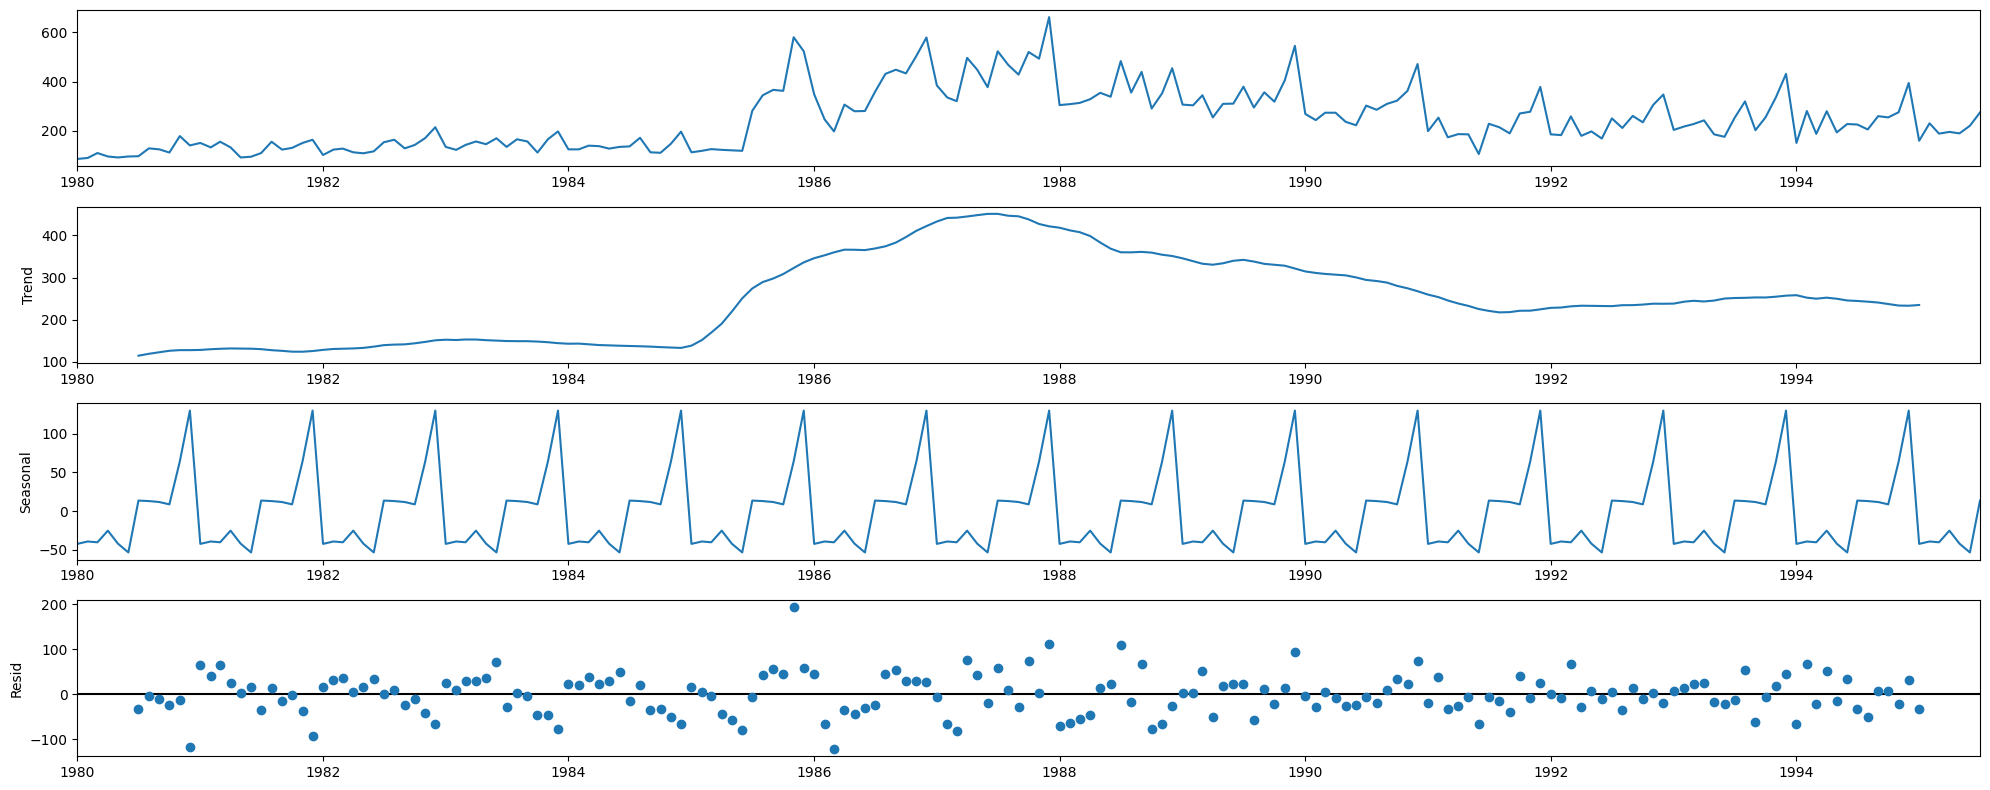

In [78]:
decomposition = seasonal_decompose(df,model='additive')
decomposition.plot()

In [79]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    114.458333
1980-08-01    118.958333
1980-09-01    122.666667
1980-10-01    126.125000
1980-11-01    127.666667
1980-12-01    127.625000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -42.175463
1980-02-01    -39.062566
1980-03-01    -40.122090
1980-04-01    -25.092328
1980-05-01    -41.878042
1980-06-01    -53.208399
1980-07-01     13.741204
1980-08-01     13.077315
1980-09-01     11.866204
1980-10-01      8.835648
1980-11-01     64.152315
1980-12-01    129.866204
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    -32.199537
1980-08-01     -4.035648
1980-09-01    -10.532870
1980-10-01    -23.960648
1980-11-01    -13.818981

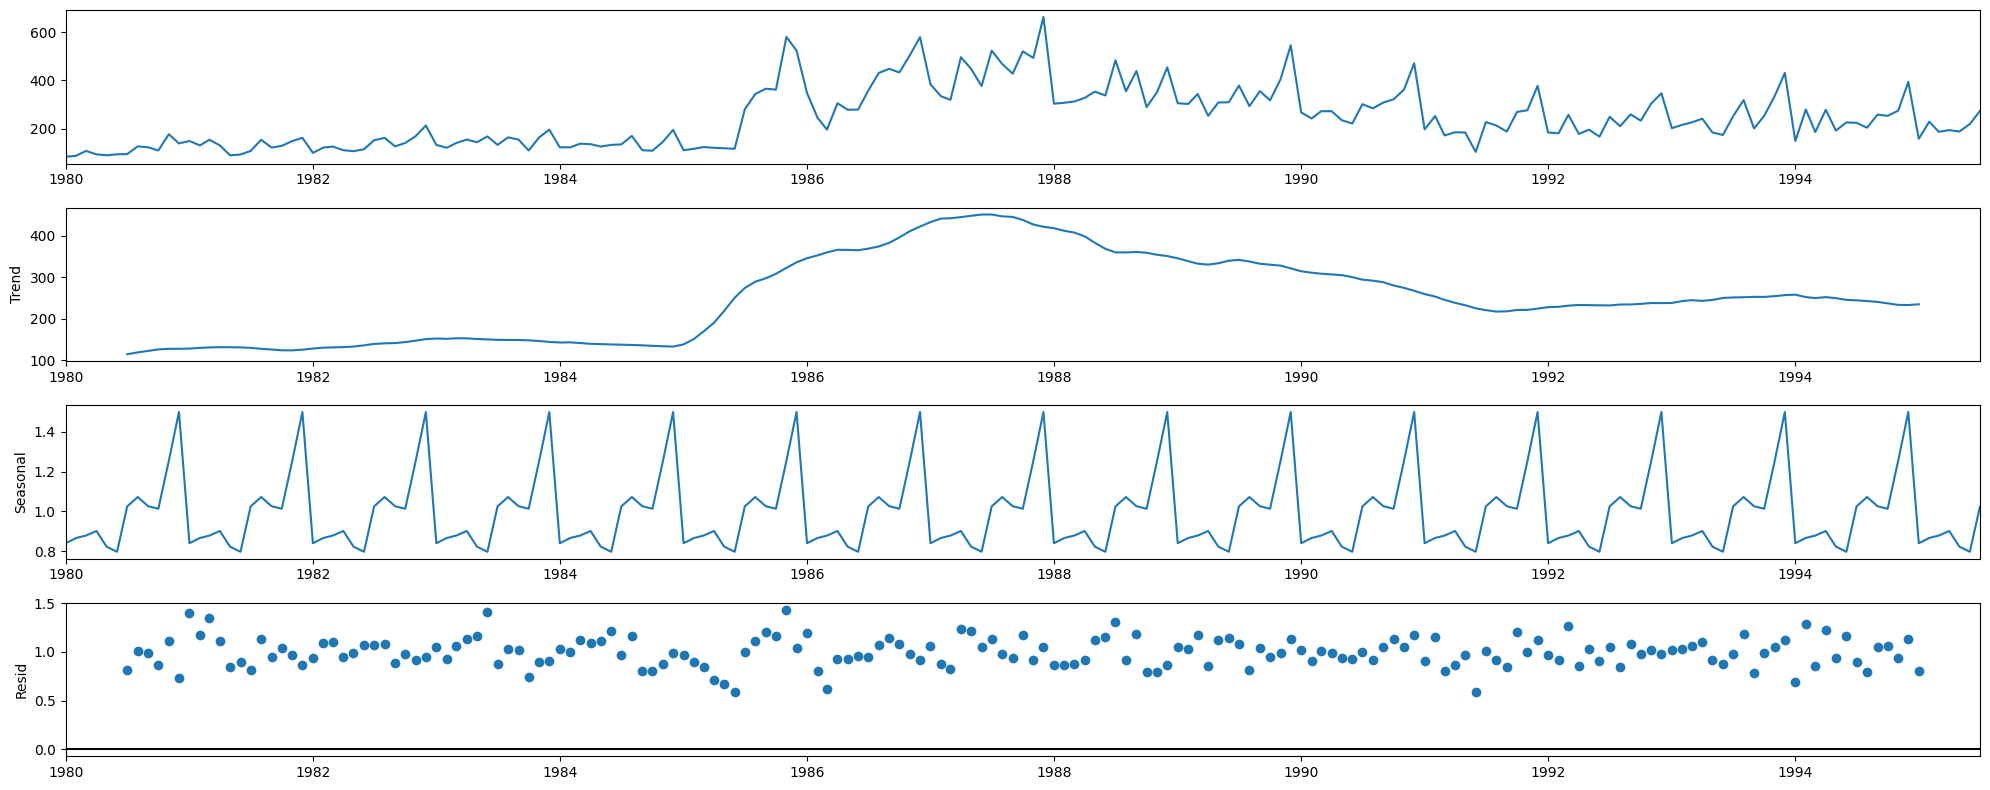

In [80]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

In [81]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    114.458333
1980-08-01    118.958333
1980-09-01    122.666667
1980-10-01    126.125000
1980-11-01    127.666667
1980-12-01    127.625000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.840405
1980-02-01    0.866682
1980-03-01    0.878675
1980-04-01    0.901826
1980-05-01    0.823141
1980-06-01    0.797254
1980-07-01    1.025527
1980-08-01    1.072445
1980-09-01    1.026307
1980-10-01    1.013557
1980-11-01    1.254223
1980-12-01    1.499958
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.817856
1980-08-01    1.003322
1980-09-01    0.984958
1980-10-01    0.868308
1980-11-01    1.111649
1980-12-01    0.731330
Name: resid, dtype: fl

In [82]:
from statsmodels.tsa.stattools import adfuller
# def test_stationarity(timeseries, color):
    
#     #Determing rolling statistics
#     rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
#     rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

#     #Plot rolling statistics:
#     orig = plt.plot(timeseries, color=color,label='Observed')
#     mean = plt.plot(rolmean, color='black', label='Rolling Mean')
#     std = plt.plot(rolstd, color='darkblue', label = 'Rolling Std')
#     plt.legend(loc='best')
#     plt.title('Rolling Mean & Standard Deviation')
#     plt.show(block=False)
    
#     #Perform Dickey-Fuller test:
#     print ('Results of Dickey-Fuller Test:')
#     dftest = adfuller(timeseries, autolag='AIC')
#     dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
#     for key,value in dftest[4].items():
#         dfoutput['Critical Value (%s)'%key] = value
#     print (dfoutput,'\n')

In [83]:
# test_stationarity(df['Shoe_Sales'], 'orange')

In [84]:
# test_stationarity(df['Shoe_Sales'].diff(1).dropna(), 'lightblue')

In [85]:
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# import itertools
# p = q = range(0, 3)
# d= range(1,2)
# pdq = list(itertools.product(p, d, q))
# print('Some parameter combinations for the Model...')
# for i in range(1,len(pdq)):
#     print('Model: {}'.format(pdq[i]))

In [86]:
scaled_df = df.copy()
scaled_df.head()

scaler = MinMaxScaler()
# Fitting and Transforming the Training data
print(scaled_df.head())
scaled_df[scaled_df.columns] = scaler.fit_transform(scaled_df[scaled_df.columns])
print(scaled_df.head())
print(scaler.data_max_, scaler.data_min_)


            Shoe_Sales
YearMonth             
1980-01-01          85
1980-02-01          89
1980-03-01         109
1980-04-01          95
1980-05-01          91
            Shoe_Sales
YearMonth             
1980-01-01    0.000000
1980-02-01    0.006932
1980-03-01    0.041594
1980-04-01    0.017331
1980-05-01    0.010399
[662.] [85.]


In [87]:
dftest = adfuller(scaled_df,regression='ct')
print(type(dftest),len(dftest),dftest)
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

<class 'tuple'> 6 (-1.5767135477417233, 0.8014186234537588, 13, 173, {'1%': -4.012075815845091, '5%': -3.4361787125348875, '10%': -3.1421311308149904}, -291.7050410499103)
DF test statistic is -1.577
DF test p-value is 0.8014186234537588
Number of lags used 13


In [88]:
#NON STATIONARY 
#pvalue>significance level of 5% and ADF stat> any 1%,5%,10% 
#u can t reject null hypothesei 


#STATIONARY

#The p-value << significance level of 0.05 
#hence we can reject the null hypothesis


In [89]:
#HERE 0.8>> -3.43 and -1.5>critvial =>>>> NON STATIONARY SEREIS 


In [90]:
dftest = adfuller(scaled_df.diff().dropna(),regression='ct')
print(dftest)
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

(-3.531721892940743, 0.036117034001383254, 12, 173, {'1%': -4.012075815845091, '5%': -3.4361787125348875, '10%': -3.1421311308149904}, -288.56290280204485)
DF test statistic is -3.532
DF test p-value is 0.036117034001383254
Number of lags used 12


In [91]:
done_df= scaled_df.diff().dropna()

In [92]:
dftest = adfuller(done_df.diff().dropna(),regression='ct')
print(dftest)
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

(-12.94460040689614, 1.6019810165507425e-20, 11, 173, {'1%': -4.012075815845091, '5%': -3.4361787125348875, '10%': -3.1421311308149904}, -277.6287506446349)
DF test statistic is -12.945
DF test p-value is 1.6019810165507425e-20
Number of lags used 11


In [93]:
# here d is 2 

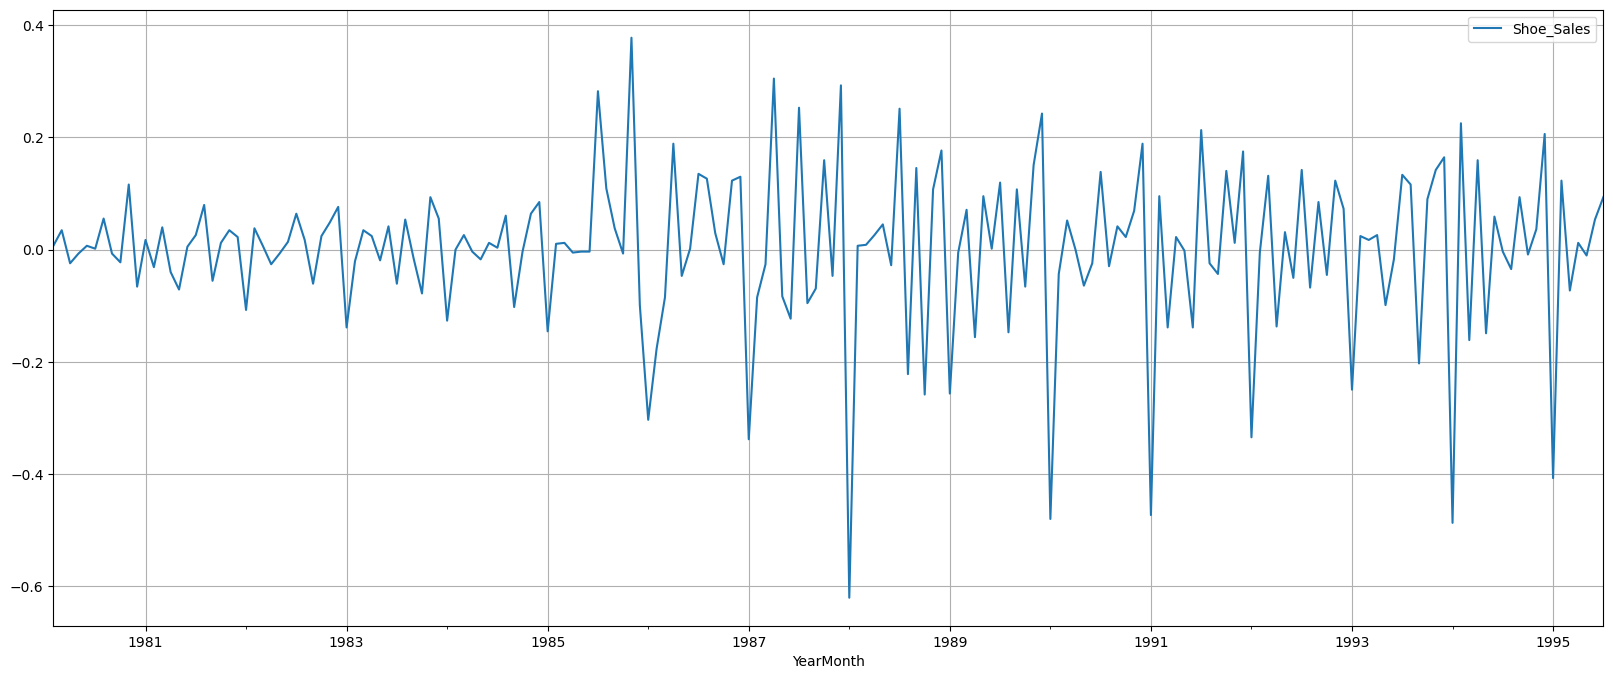

In [94]:
scaled_df.diff().dropna().plot(grid=True);

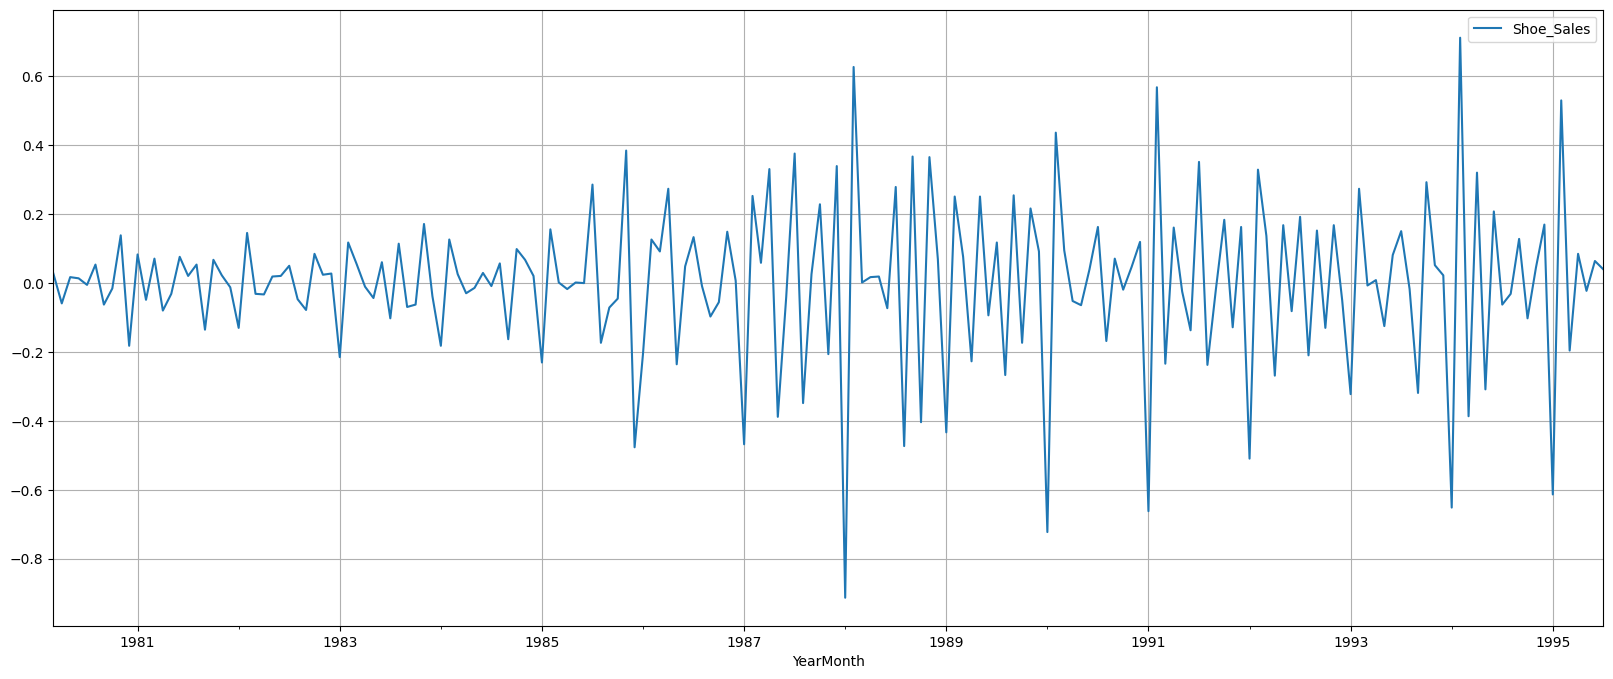

In [95]:
done_df.diff().dropna().plot(grid = True);

In [96]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

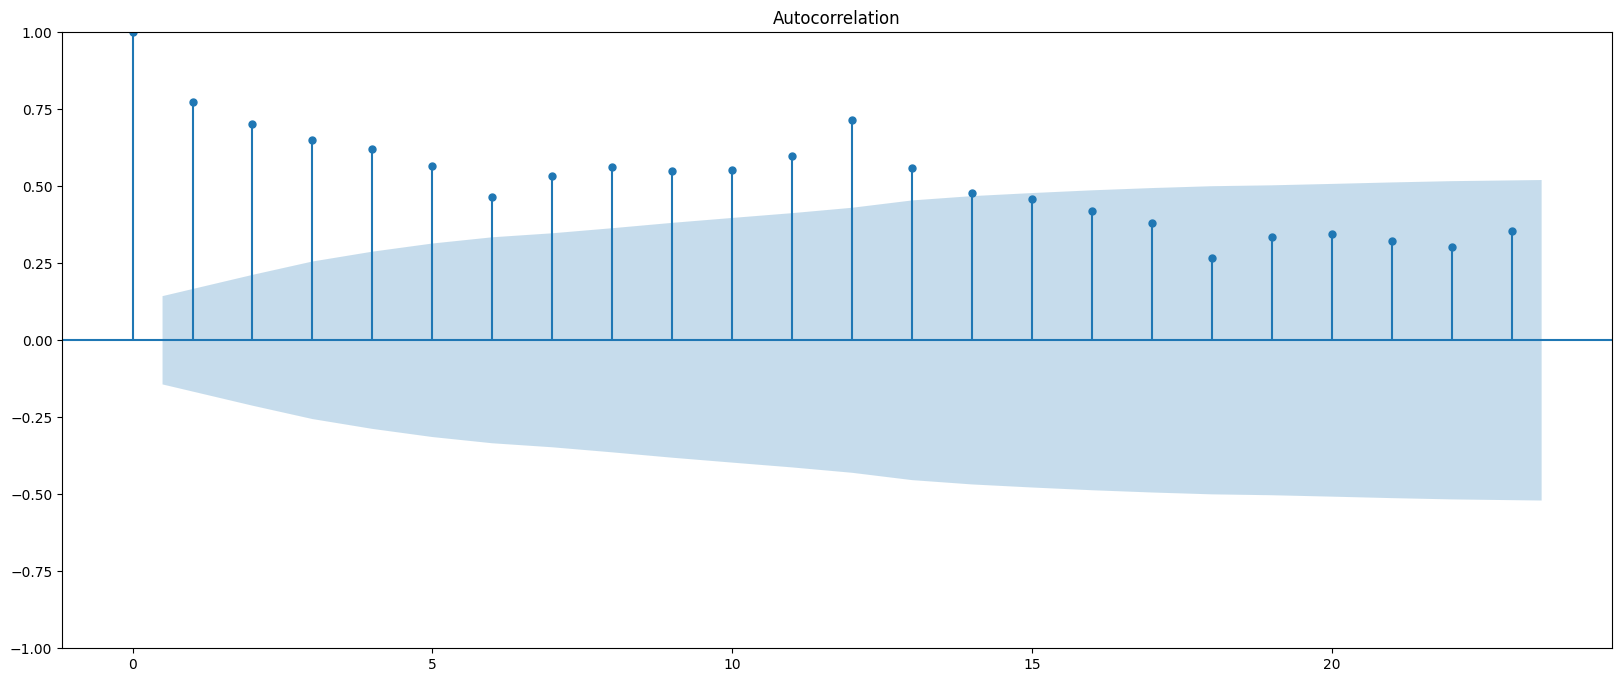

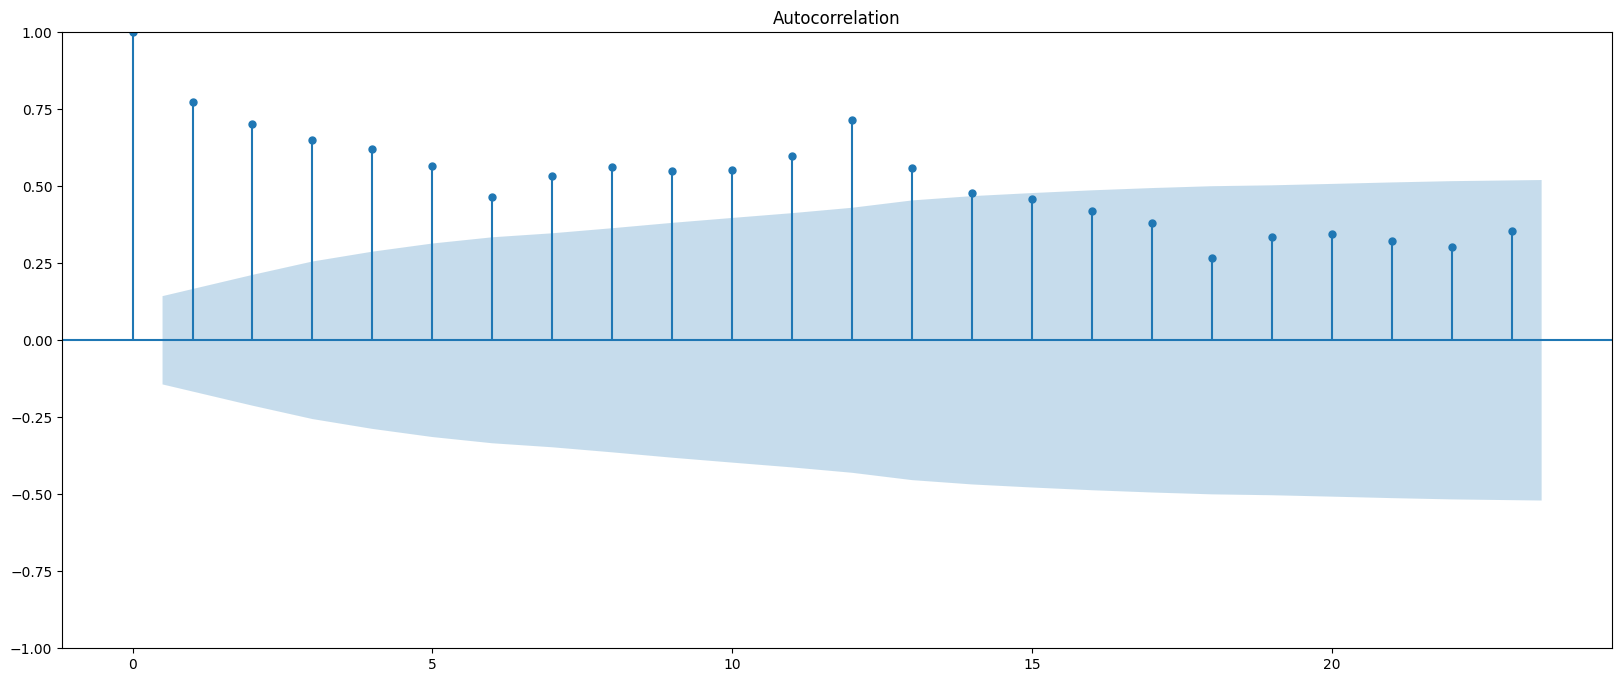

In [97]:
plot_acf(scaled_df,alpha=0.05)#count til first cutoff after the first 

In [98]:
#   ACF   q=13 tak no cutoff upto 12 lags hence put q=0

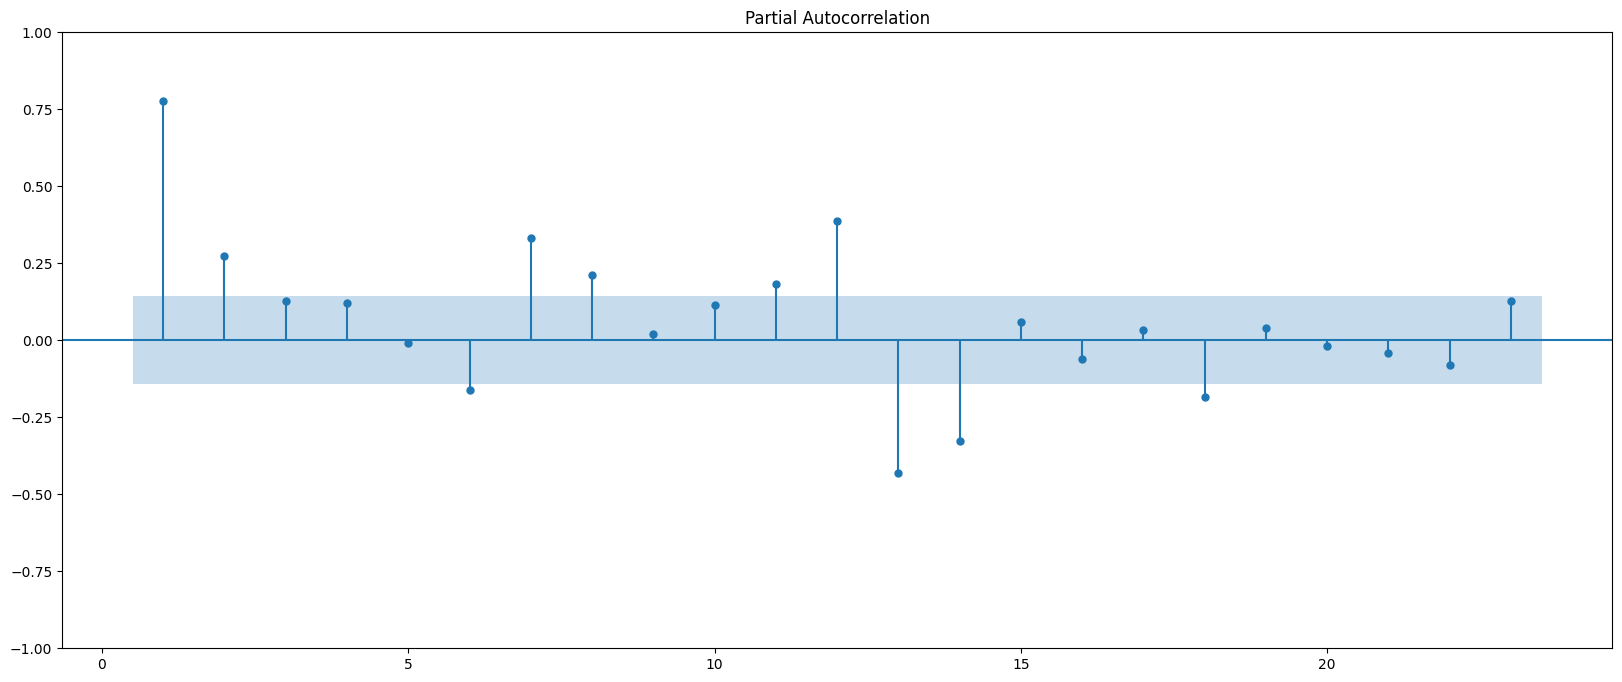

In [99]:
plot_pacf(df,zero=False,alpha=0.05);

In [100]:
#PACF (2 = p)

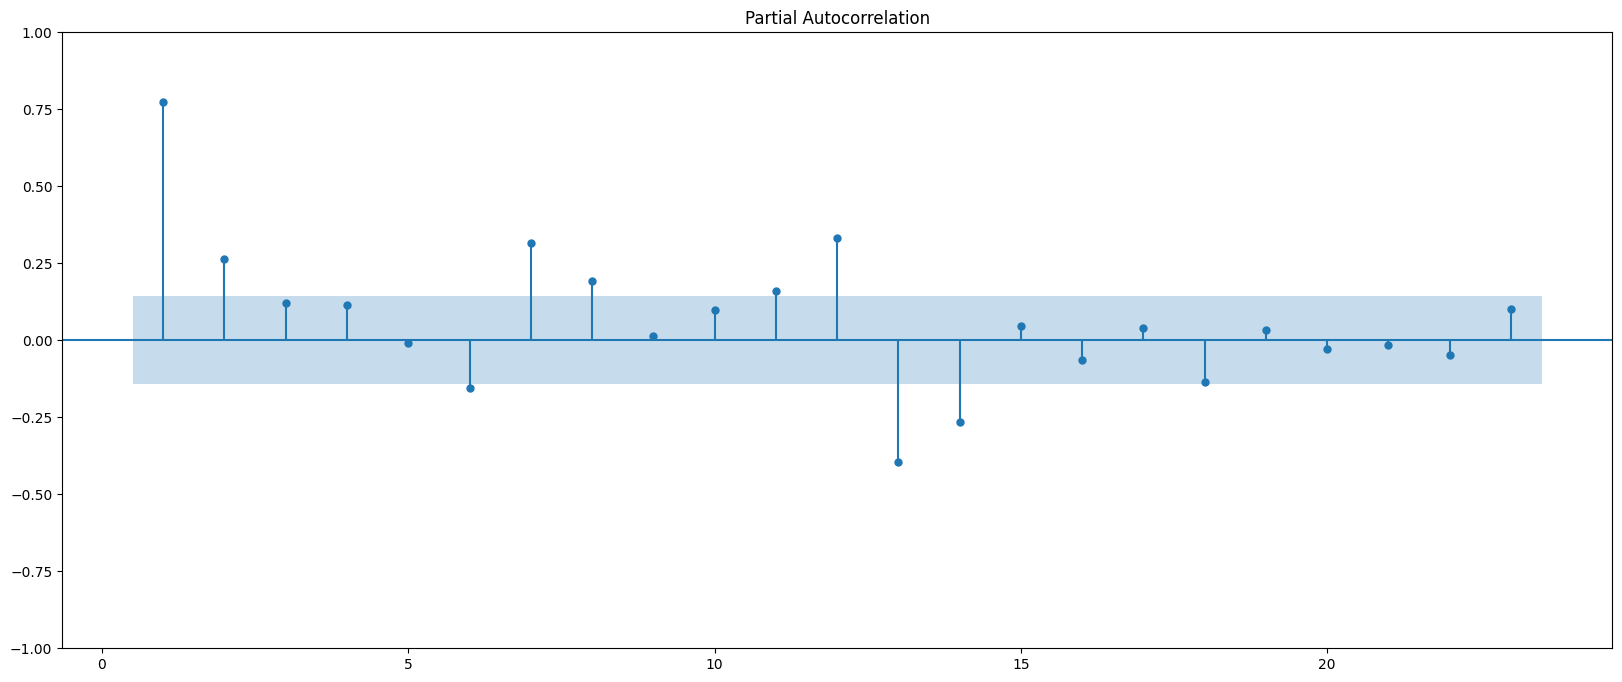

In [101]:
plot_pacf(df,zero=False,alpha=0.05,method='ywmle');

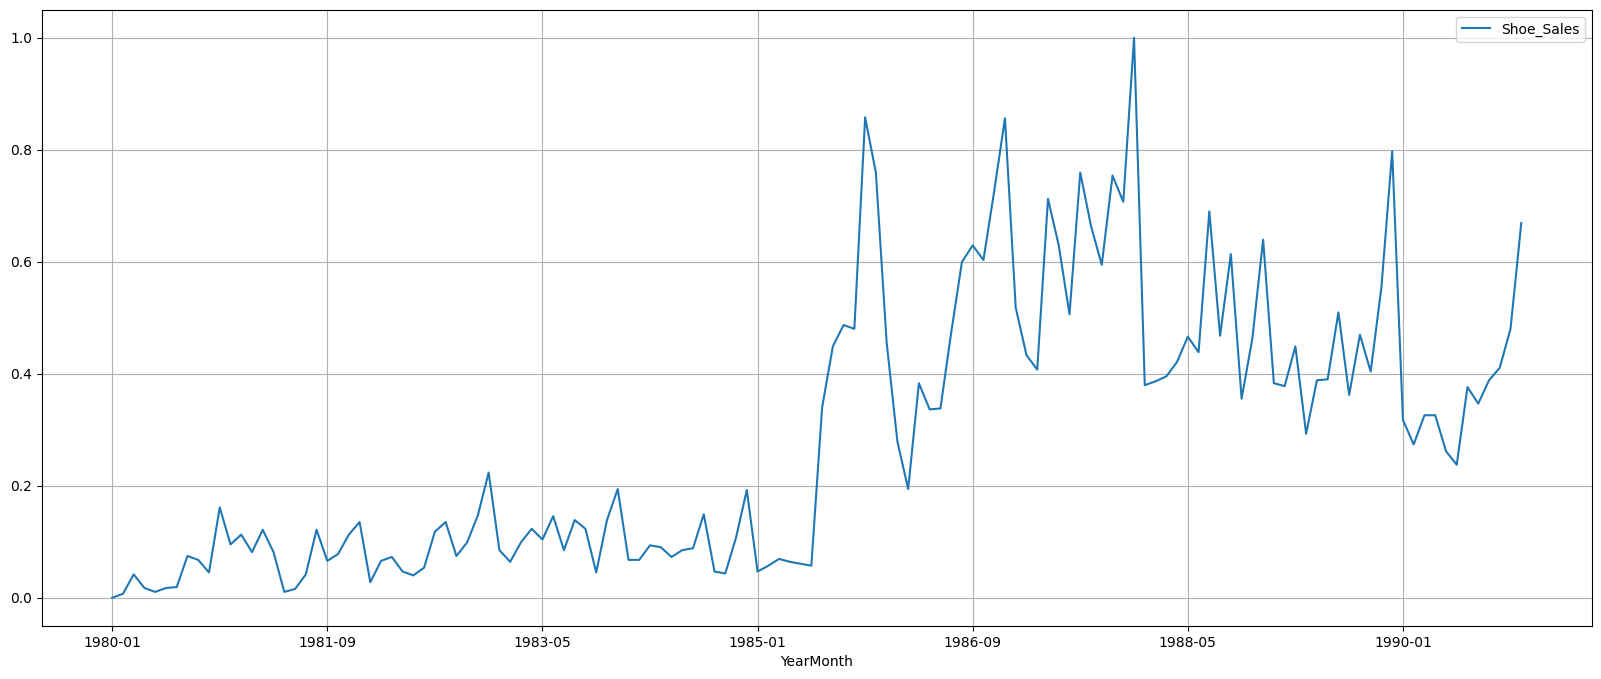

In [102]:
train.plot(grid=True);

In [103]:
dftest = adfuller(train,regression='ct')
print(dftest)
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

(-1.7491078300447207, 0.7287654522796951, 13, 118, {'1%': -4.037614492012328, '5%': -3.448373347128966, '10%': -3.149257372954392}, -188.77128313785232)
DF test statistic is -1.749
DF test p-value is 0.7287654522796951
Number of lags used 13


In [104]:
dftest = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -3.181
DF test p-value is 0.08822589255914448
Number of lags used 13


In [105]:
df_train_stat = train.diff().dropna()
dftest = adfuller(df_train_stat.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -6.564
DF test p-value is 1.336228351659891e-07
Number of lags used 13


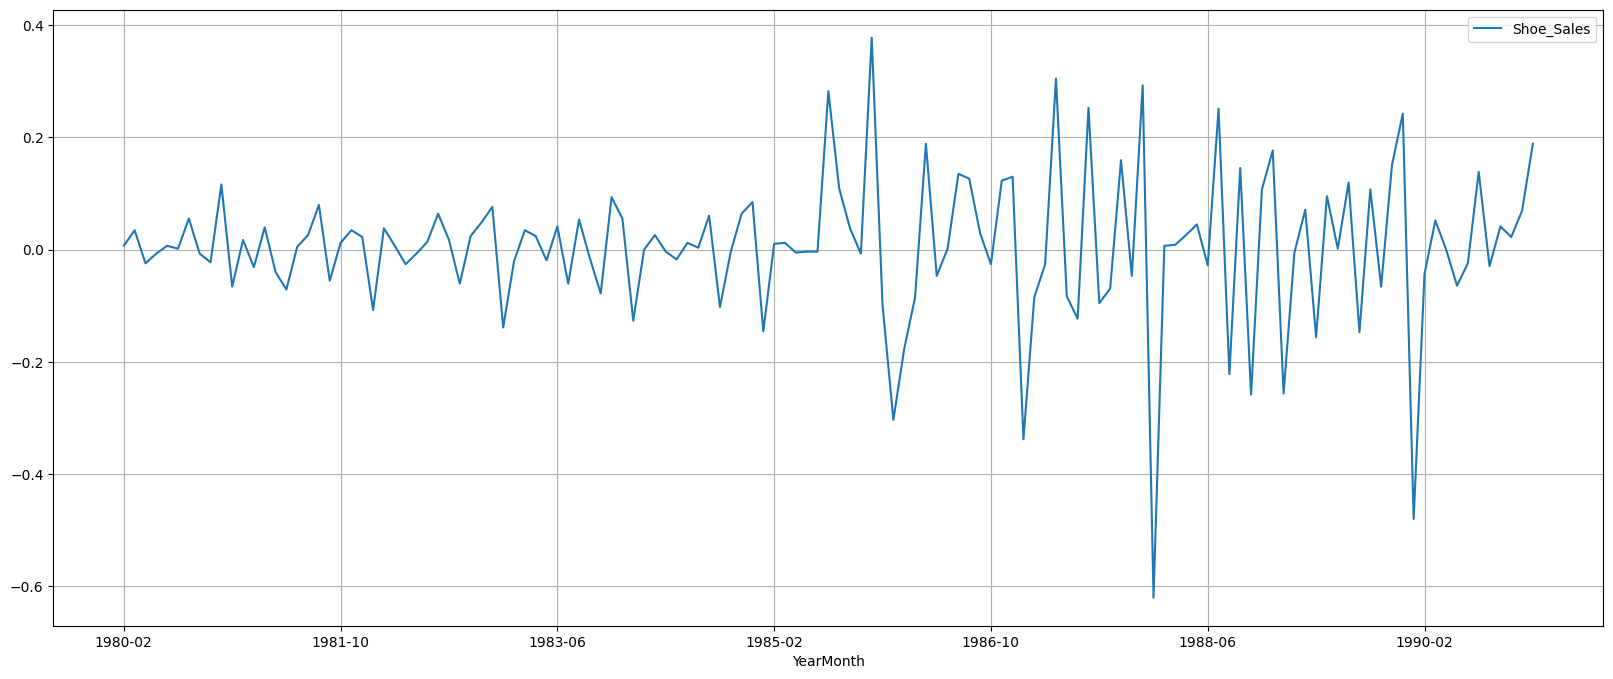

In [106]:
train.diff().dropna().plot(grid=True);

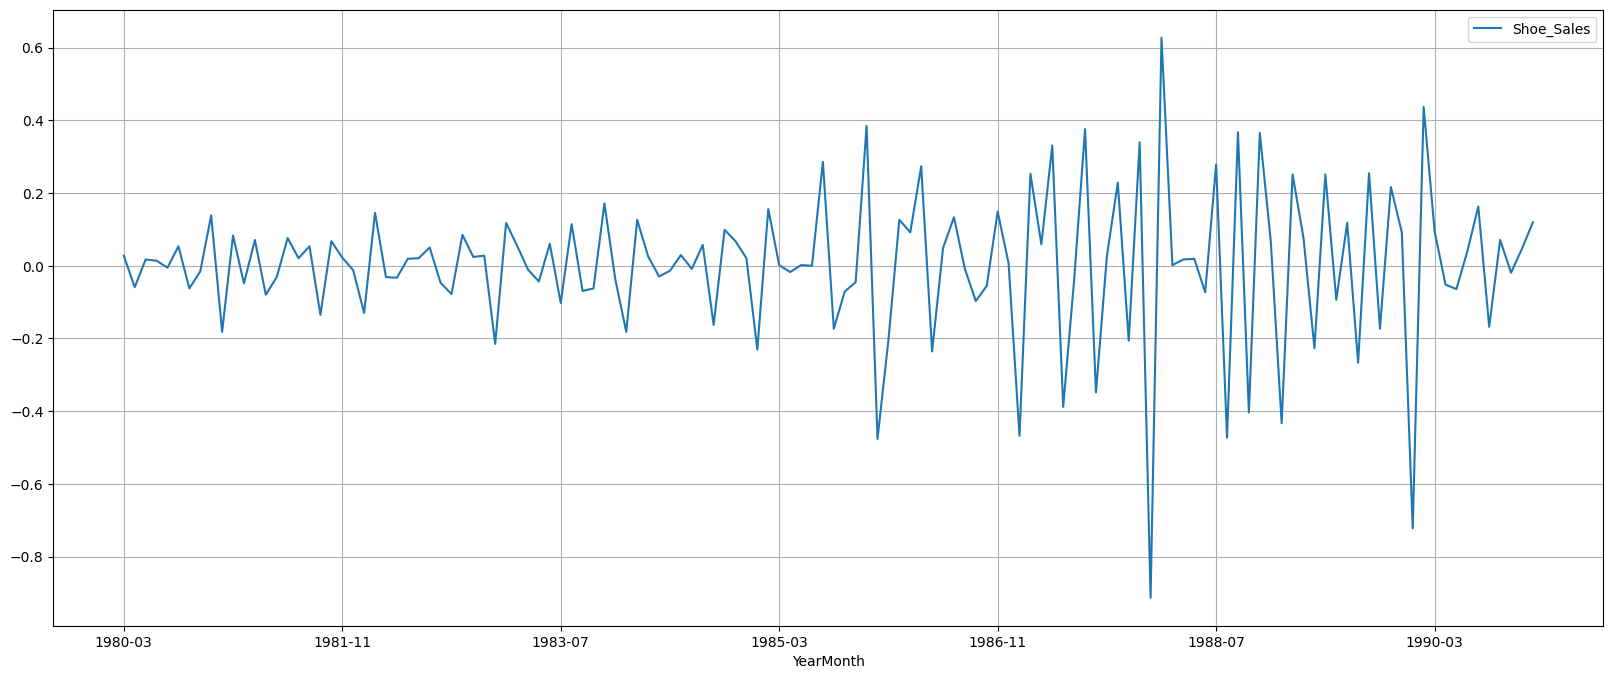

In [107]:
df_train_stat.diff().dropna().plot(grid=True);

In [108]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132 entries, 1980-01 to 1990-12
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Shoe_Sales  132 non-null    float64
dtypes: float64(1)
memory usage: 2.1+ KB


In [109]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.
#q=0,p=2
import itertools
p =q =  range(0, 3)
d= range(2,3)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 2, 0)
Model: (0, 2, 1)
Model: (0, 2, 2)
Model: (1, 2, 0)
Model: (1, 2, 1)
Model: (1, 2, 2)
Model: (2, 2, 0)
Model: (2, 2, 1)
Model: (2, 2, 2)


In [110]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [111]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Shoe_Sales'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 2, 0) - AIC:-36.794560513020755
ARIMA(0, 2, 1) - AIC:-148.57794706535594
ARIMA(0, 2, 2) - AIC:-158.98332096310835
ARIMA(1, 2, 0) - AIC:-82.76259543569978
ARIMA(1, 2, 1) - AIC:-154.80084810244617
ARIMA(1, 2, 2) - AIC:-162.87592681887844
ARIMA(2, 2, 0) - AIC:-104.81535331567504


/home/avpl/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 1) - AIC:-157.20375184408854
ARIMA(2, 2, 2) - AIC:-155.06433371988066


In [112]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param         AIC
5  (1, 2, 2) -162.875927
2  (0, 2, 2) -158.983321
7  (2, 2, 1) -157.203752
8  (2, 2, 2) -155.064334
4  (1, 2, 1) -154.800848

In [113]:
auto_ARIMA = ARIMA(train, order=(1,2,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:             Shoe_Sales   No. Observations:                  132
Model:                 ARIMA(1, 2, 2)   Log Likelihood                  85.438
Date:                Tue, 14 Feb 2023   AIC                           -162.876
Time:                        19:11:38   BIC                           -151.406
Sample:                    01-01-1980   HQIC                          -158.215
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4697      0.111      4.221      0.000       0.252       0.688
ma.L1         -1.8297      0.106    -17.200      0.000      -2.038      -1.621
ma.L2          0.8304      0.089      9.317      0.0

/home/avpl/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/avpl/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/avpl/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/avpl/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


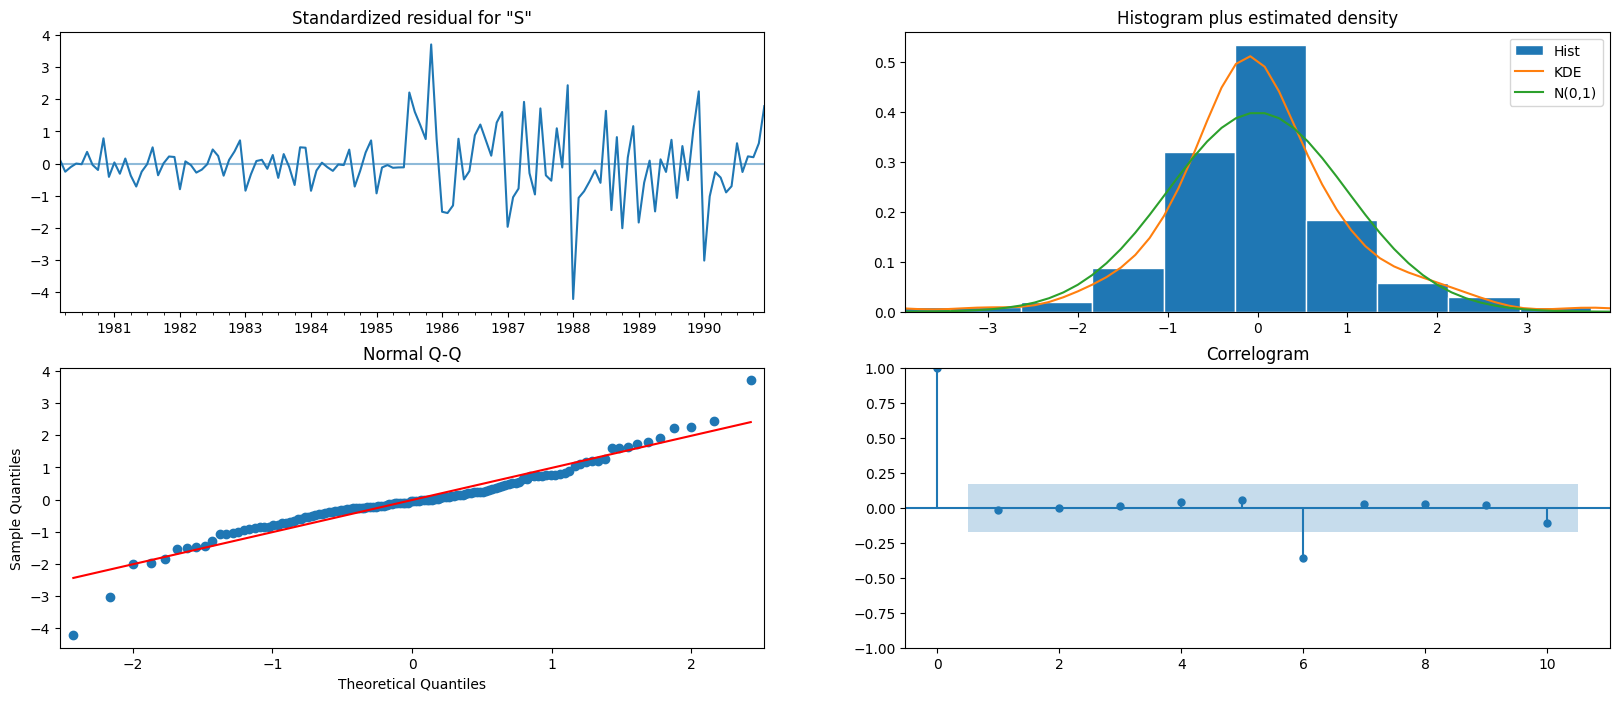

In [114]:
results_auto_ARIMA.plot_diagnostics();

In [115]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [116]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [117]:
rmse = mean_squared_error(test['Shoe_Sales'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Shoe_Sales'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 0.2758282342060599 
MAPE: nan


In [118]:
resultsDf_ARIM = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(1,2,2)'])
resultsDf = pd.concat([resultsDf, resultsDf_4])

resultsDf

RMSE
Alpha=0.99,SES                      [0.2654185125860849]
Alpha=1,Beta=0.0189:DES                          0.36507
Alpha=0.25,Beta=0.0,Gamma=0.74:TES              0.137074
RegressionOnTime                                0.363304
NaiveModel                                      0.333035
SimpleAverageModel                              0.218058
2pointTrailingMovingAverage                      0.19928
4pointTrailingMovingAverage                     0.215983
6pointTrailingMovingAverage                      0.22363
9pointTrailingMovingAverage                     0.230484
2pointTrailingMovingAverage                      0.19928
4pointTrailingMovingAverage                     0.215983
6pointTrailingMovingAverage                      0.22363
9pointTrailingMovingAverage                     0.230484

In [119]:
print(train)

           Shoe_Sales
YearMonth            
1980-01      0.000000
1980-02      0.006932
1980-03      0.041594
1980-04      0.017331
1980-05      0.010399
...               ...
1990-08      0.346620
1990-09      0.388215
1990-10      0.410745
1990-11      0.480069
1990-12      0.668977

[132 rows x 1 columns]


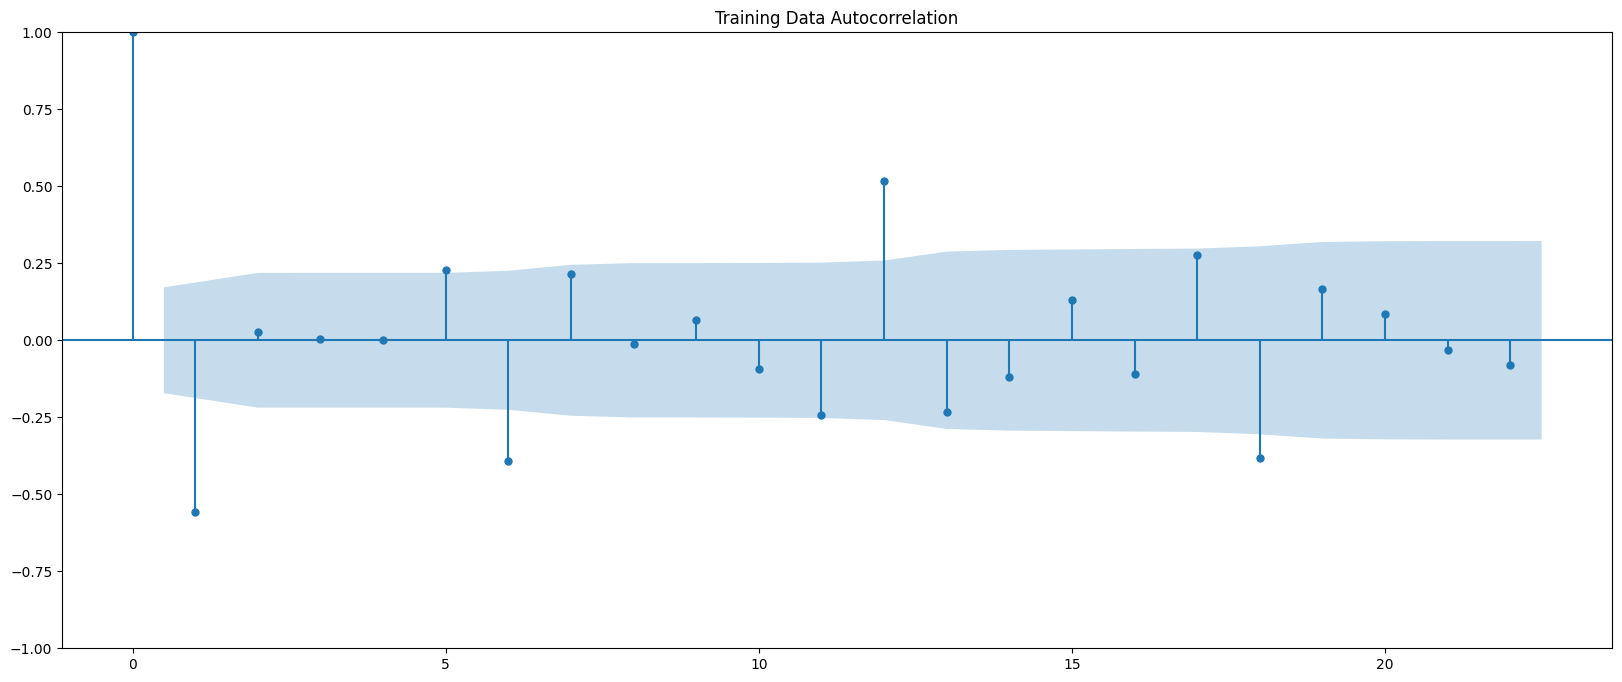

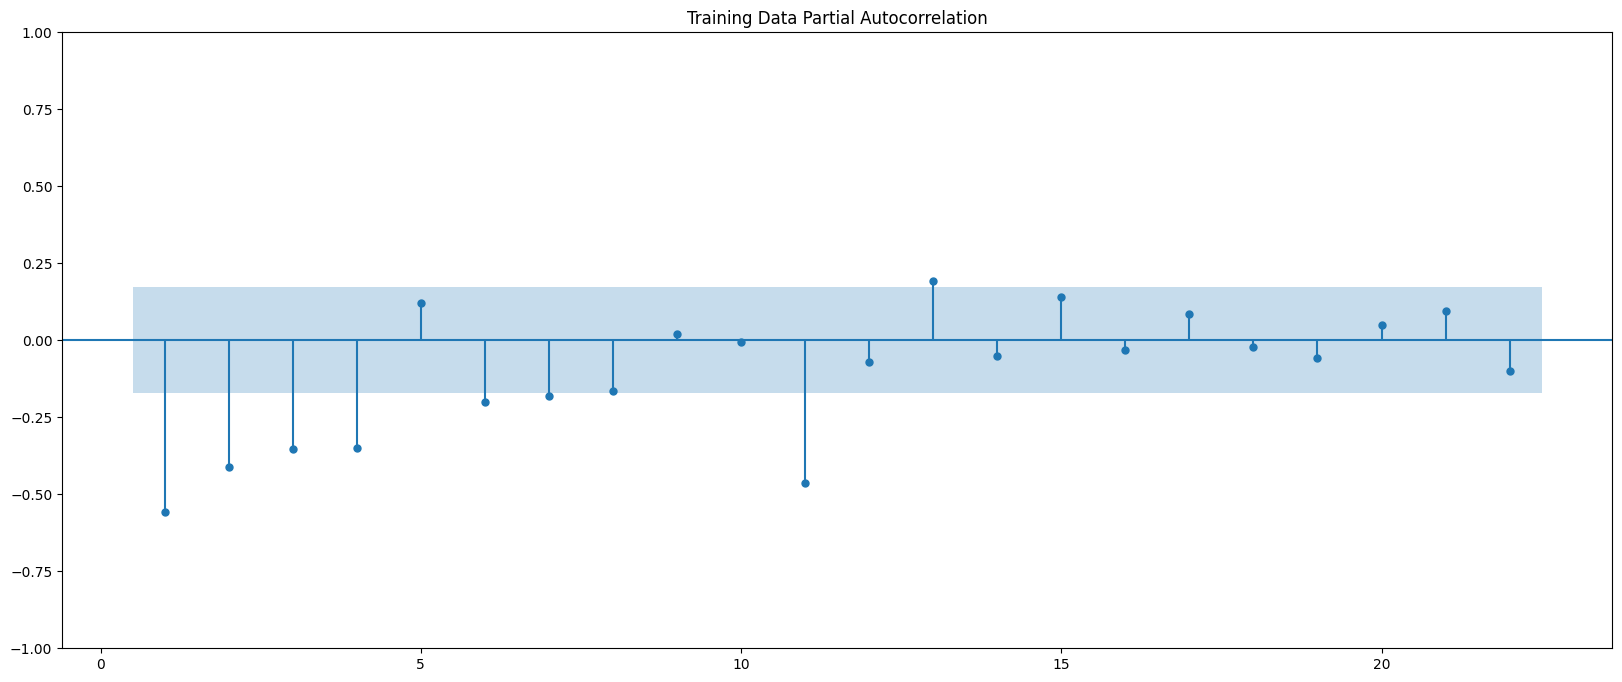

In [120]:
plot_acf(df_train_stat.diff().dropna(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(df_train_stat.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()
###WHEN DF_TRAIN_STAT
#q=1 ACF
#p=4 PACF----0.35
#d=2

##WHEN TRAIN ONLY
#p=2,d=1,q=1---0.435

In [121]:
manual_ARIMA = ARIMA(df_train_stat['Shoe_Sales'], order=(4,2,1))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

/home/avpl/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/avpl/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/avpl/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/avpl/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:             Shoe_Sales   No. Observations:                  131
Model:                 ARIMA(4, 2, 1)   Log Likelihood                  68.643
Date:                Tue, 14 Feb 2023   AIC                           -125.286
Time:                        19:11:39   BIC                           -108.127
Sample:                    02-01-1980   HQIC                          -118.314
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0621      0.069    -15.459      0.000      -1.197      -0.927
ar.L2         -0.9409      0.108     -8.730      0.000      -1.152      -0.730
ar.L3         -0.6882      0.108     -6.396      0.0

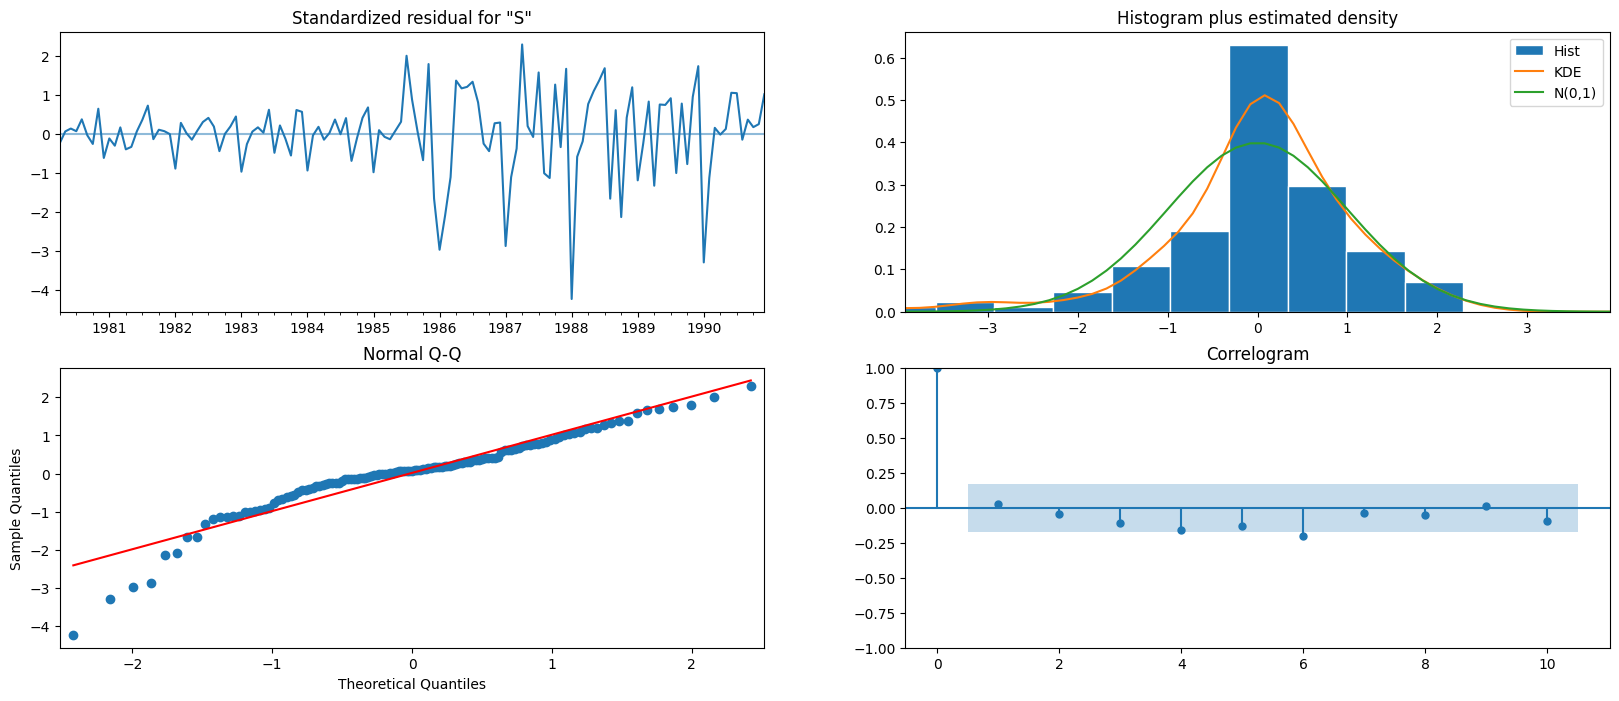

In [122]:
results_manual_ARIMA.plot_diagnostics();

In [123]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [124]:
rmse = mean_squared_error(test['Shoe_Sales'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Shoe_Sales'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 0.35800236183874423 
MAPE: nan


In [125]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(4,2,1)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE  MAPE
Alpha=0.99,SES                      [0.2654185125860849]   NaN
Alpha=1,Beta=0.0189:DES                          0.36507   NaN
Alpha=0.25,Beta=0.0,Gamma=0.74:TES              0.137074   NaN
RegressionOnTime                                0.363304   NaN
NaiveModel                                      0.333035   NaN
SimpleAverageModel                              0.218058   NaN
2pointTrailingMovingAverage                      0.19928   NaN
4pointTrailingMovingAverage                     0.215983   NaN
6pointTrailingMovingAverage                      0.22363   NaN
9pointTrailingMovingAverage                     0.230484   NaN
2pointTrailingMovingAverage                      0.19928   NaN
4pointTrailingMovingAverage                     0.215983   NaN
6pointTrailingMovingAverage                      0.22363   NaN
9pointTrailingMovingAverage                     0.230484   NaN
ARIMA(4,2,1)                                    0.358002   NaN

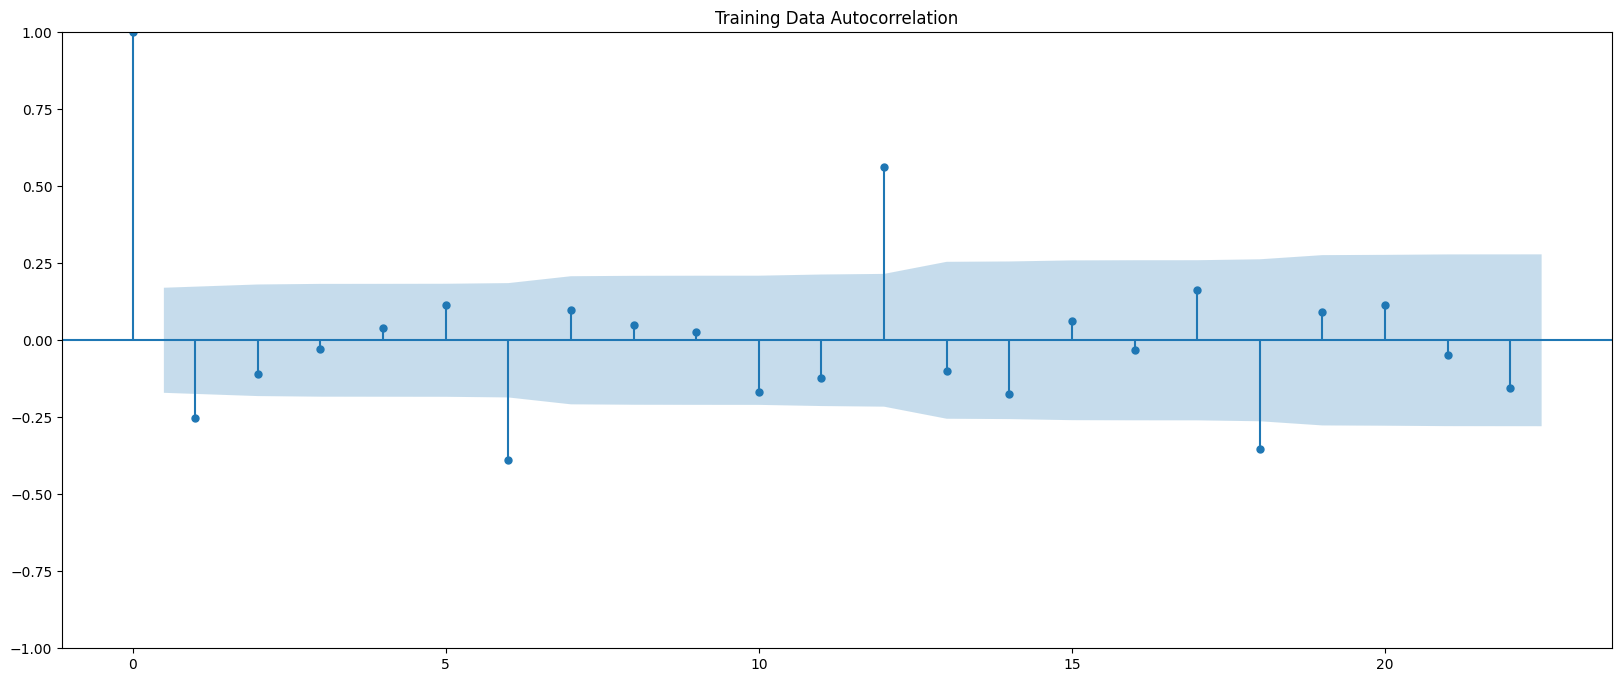

In [126]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop');

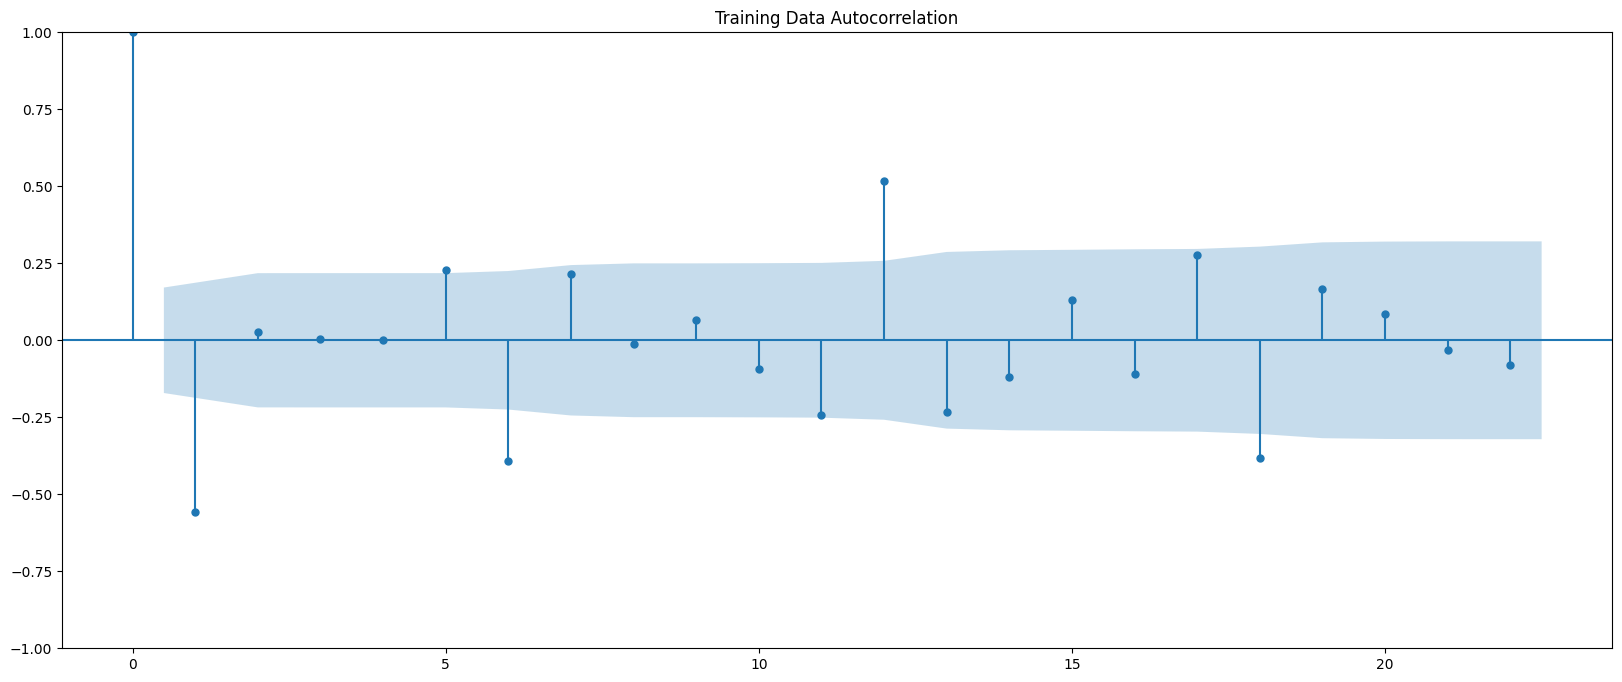

In [127]:
plot_acf(df_train_stat.diff(),title='Training Data Autocorrelation',missing='drop');

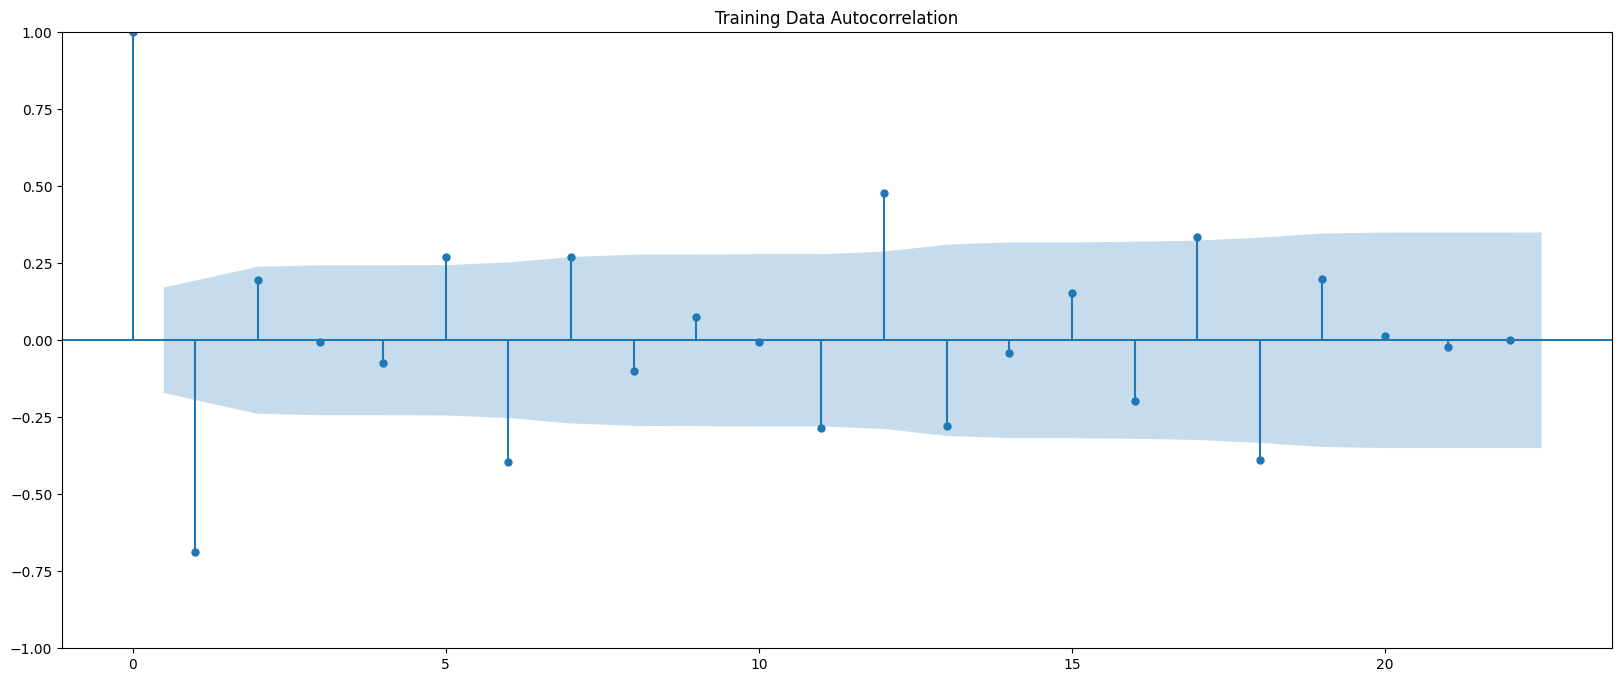

In [128]:
plot_acf(df_train_stat.diff().diff(),title='Training Data Autocorrelation',missing='drop');

In [129]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [130]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [131]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.95625D-01    |proj g|=  1.14780D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      3     14      1     0     0   3.646D-05  -5.957D-01
  F = -0.59568236517994200     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:-155.2601444075047
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -6.02699D-01    |proj g|=  3.48359D-01

At iterate   10    f= -6.03631D-01    |proj g|=  1.23260D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     19      1     0     0   1.575D-04  -6.036D-01
  F = -0.60363146452826799     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:-151.35870663546274
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.34134D-01    |proj g|=  5.96559D-04

           * *

 This problem is unconstrained.
/home/avpl/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -6.27960D-01    |proj g|=  3.24897D-01

At iterate   10    f= -6.32684D-01    |proj g|=  3.89208D-01

At iterate   15    f= -6.48799D-01    |proj g|=  9.58893D-01

At iterate   20    f= -6.70437D-01    |proj g|=  7.96710D-02

At iterate   25    f= -6.81088D-01    |proj g|=  5.46707D-02

At iterate   30    f= -6.81114D-01    |proj g|=  1.23603D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     48      1     0     0   1.328D-04  -6.811D-01
  F = -0.68111420225051100     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:-169.81414939413

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f= -7.47714D-01    |proj g|=  1.26927D-01

At iterate   20    f= -7.48173D-01    |proj g|=  1.79714D-02

At iterate   25    f= -7.48394D-01    |proj g|=  1.55564D-01

At iterate   30    f= -7.49147D-01    |proj g|=  1.44278D-02

At iterate   35    f= -7.49149D-01    |proj g|=  4.47584D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     41      1     0     0   4.476D-04  -7.491D-01
  F = -0.74914896287268307     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:-187.77532619838834
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f= -6.93256D-01    |proj g|=  2.09203D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     34      1     0     0   2.092D-04  -6.933D-01
  F = -0.69325579056728170     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:-171.01952870976237
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.89105D-01    |proj g|=  9.08749D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.87159D-01    |proj g|=  9.83412D-01

At iterate    5    f= -6.95613D-01    |proj g|=  3.57304D-01

At iterate   10    f= -6.96434D-01    |proj g|=  8.84361D-02

At iterate   15    f= -6.96700D-01    |proj g|=  1.09048D-01

At iterate   20    f= -6.96906D-01    |proj g|=  9.88072D-02

At iterate   25    f= -6.98334D-01    |proj g|=  8.27430D-02

At iterate   30    f= -6.99150D-01    |proj g|=  1.86582D-01

At iterate   35    f= -6.99963D-01    |proj g|=  1.26545D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate   15    f= -6.87902D-01    |proj g|=  7.24621D-02

At iterate   20    f= -6.92346D-01    |proj g|=  2.32026D-02

At iterate   25    f= -6.93315D-01    |proj g|=  8.77673D-03

At iterate   30    f= -6.94312D-01    |proj g|=  5.74178D-02

At iterate   35    f= -6.94360D-01    |proj g|=  1.59762D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38     50      1     0     0   1.005D-04  -6.944D-01
  F = -0.69435973384208660     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:-169.31096973431087
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     35      1     0     0   1.284D-04  -6.943D-01
  F = -0.69425474914738505     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:-175.28325377490967
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.18119D-01    |proj g|=  1.39534D+00

At iterate    5    f= -6.30815D-01    |proj g|=  3.41943D-01

At iterate   10    f= -6.40393D-01    |proj g|=  2.69740D-02

At iterate   1

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -6.85440D-01    |proj g|=  4.28610D-03

At iterate   10    f= -6.85444D-01    |proj g|=  2.20439D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     16      1     0     0   2.204D-06  -6.854D-01
  F = -0.68544448930312396     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:-174.95734517602472
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.82838D-01    |proj g|=  1.40710D+00

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:-203.3135856914594
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.54789D-01    |proj g|=  2.75450D+00

At iterate    5    f= -8.01419D-01    |proj g|=  4.36224D-02

At iterate   10    f= -8.02830D-01    |proj g|=  1.54439D-02

At iterate   15    f= -8.02986D-01    |proj g|=  5.23608D-02

At iterate   20    f= -8.03288D-01    |proj g|=  1.04194D-02

At iterate   25    f= -8.03603D-01    |proj g|=  1.55977D-02

At iterate   30    f= -8.03617D-01    |proj g|=  5.13119D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

 

 This problem is unconstrained.



At iterate   25    f= -7.37605D-01    |proj g|=  7.60403D-02

At iterate   30    f= -7.37677D-01    |proj g|=  3.75465D-02

At iterate   35    f= -7.38406D-01    |proj g|=  4.54358D-02

At iterate   40    f= -7.38767D-01    |proj g|=  8.44126D-04

At iterate   45    f= -7.38767D-01    |proj g|=  1.32124D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     56      1     0     0   1.321D-04  -7.388D-01
  F = -0.73876684153506944     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(2, 0, 3, 6) - AIC:-181.03444616525834
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -7.39029D-01    |proj g|=  4.51806D-02

At iterate   10    f= -7.41108D-01    |proj g|=  9.27677D-02

At iterate   15    f= -7.41345D-01    |proj g|=  9.09996D-02

At iterate   20    f= -7.41443D-01    |proj g|=  6.35915D-02

At iterate   25    f= -7.41471D-01    |proj g|=  2.93102D-04

At iterate   30    f= -7.41471D-01    |proj g|=  1.12610D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     40      1     0     0   1.126D-04  -7.415D-01
  F = -0.74147119403032880     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(3, 0, 0, 6) - AIC:-185.74839522400

 This problem is unconstrained.



At iterate   10    f= -7.52152D-01    |proj g|=  6.79267D-02

At iterate   15    f= -7.53286D-01    |proj g|=  7.17183D-02

At iterate   20    f= -7.53668D-01    |proj g|=  8.10701D-02

At iterate   25    f= -7.54934D-01    |proj g|=  6.88677D-02

At iterate   30    f= -7.55236D-01    |proj g|=  3.53338D-02

At iterate   35    f= -7.56428D-01    |proj g|=  2.97487D-02

At iterate   40    f= -7.56718D-01    |proj g|=  4.95315D-04

At iterate   45    f= -7.56718D-01    |proj g|=  7.97314D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     61      1     0     0   2.102D-04  -7.567D-01
  F = -0.756717924678

 This problem is unconstrained.



At iterate    5    f= -7.24310D-01    |proj g|=  3.52839D-01

At iterate   10    f= -7.31430D-01    |proj g|=  1.32311D-01

At iterate   15    f= -7.32564D-01    |proj g|=  3.33501D-02

At iterate   20    f= -7.35307D-01    |proj g|=  4.58114D-02

At iterate   25    f= -7.37600D-01    |proj g|=  3.96688D-02

At iterate   30    f= -7.37884D-01    |proj g|=  6.98644D-02

At iterate   35    f= -7.37976D-01    |proj g|=  2.93499D-02

At iterate   40    f= -7.38150D-01    |proj g|=  2.89868D-02

At iterate   45    f= -7.38621D-01    |proj g|=  7.13093D-02

At iterate   50    f= -7.38758D-01    |proj g|=  4.06376D-03

At iterate   55    f= -7.38772D-01    |proj g|=  3.25606D-03

At iterate   60    f= -7.38773D-01    |proj g|=  4.53382D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.64081D-01    |proj g|=  1.77982D+00

At iterate    5    f= -6.84636D-01    |proj g|=  4.00624D-01

At iterate   10    f= -6.90606D-01    |proj g|=  1.19519D-02

At iterate   15    f= -6.90745D-01    |proj g|=  9.64953D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     22      1     0     0   8.226D-05  -6.907D-01
  F = -0.69074519560157144     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(0, 0, 2, 6) - AIC:-172.3567316388148

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -7.54643D-01    |proj g|=  2.64924D-01

At iterate   10    f= -7.66639D-01    |proj g|=  8.66499D-01

At iterate   15    f= -7.87572D-01    |proj g|=  1.62215D-02

At iterate   20    f= -7.87657D-01    |proj g|=  5.64444D-04

At iterate   25    f= -7.87657D-01    |proj g|=  8.78302D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     31      1     0     0   8.783D-06  -7.877D-01
  F = -0.78765688951765633     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(1, 0, 1, 6) - AIC:-197.94141883266127
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate   15    f= -7.09692D-01    |proj g|=  3.75110D-02

At iterate   20    f= -7.12638D-01    |proj g|=  2.73231D-02

At iterate   25    f= -7.12704D-01    |proj g|=  7.97021D-03

At iterate   30    f= -7.12706D-01    |proj g|=  5.78820D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     34     46      1     0     0   1.525D-04  -7.127D-01
  F = -0.71270634159684976     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(1, 0, 3, 6) - AIC:-174.15447418156833
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f= -8.04229D-01    |proj g|=  1.96614D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     42      1     0     0   1.838D-05  -8.042D-01
  F = -0.80423166661189893     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(2, 0, 1, 6) - AIC:-200.3171599855413
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.28144D-01    |proj g|=  2.76265D+00

At iterate    5    f= -7.78740D-01    |proj g|=  2.17067D-01

At iterate   10

 This problem is unconstrained.



At iterate   35    f= -7.87805D-01    |proj g|=  5.22937D-03

At iterate   40    f= -7.87826D-01    |proj g|=  2.20510D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     41     54      1     0     0   5.069D-04  -7.878D-01
  F = -0.78782564136228106     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(2, 0, 2, 6) - AIC:-193.9859693196422
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.76618D-01    |proj g|=  2.38118D+00

At iterate    5

 This problem is unconstrained.



At iterate   15    f= -7.26312D-01    |proj g|=  2.01279D-01

At iterate   20    f= -7.26987D-01    |proj g|=  8.52590D-02

At iterate   25    f= -7.27536D-01    |proj g|=  4.57194D-03

At iterate   30    f= -7.27559D-01    |proj g|=  7.45964D-03

At iterate   35    f= -7.27864D-01    |proj g|=  9.44970D-02

At iterate   40    f= -7.28491D-01    |proj g|=  1.70689D-02

At iterate   45    f= -7.28502D-01    |proj g|=  1.03445D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     46     57      1     0     0   2.000D-04  -7.285D-01
  F = -0.72850210566328755     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     37      1     0     0   2.205D-05  -7.420D-01
  F = -0.74195431794595357     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(3, 0, 0, 6) - AIC:-183.87593993773174
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.96472D-01    |proj g|=  2.40787D+00

At iterate    5    f= -7.33888D-01    |proj g|=  1.05715D-01

At iterate   10    f= -7.38751D-01    |proj g|=  4.49025D-02

At iterate   1

 This problem is unconstrained.



At iterate   20    f= -7.54442D-01    |proj g|=  1.81847D-02

At iterate   25    f= -7.55121D-01    |proj g|=  1.70669D-01

At iterate   30    f= -7.55435D-01    |proj g|=  2.97150D-02

At iterate   35    f= -7.55832D-01    |proj g|=  8.00067D-02

At iterate   40    f= -7.56582D-01    |proj g|=  1.08820D-02

At iterate   45    f= -7.56740D-01    |proj g|=  4.63186D-03

At iterate   50    f= -7.56746D-01    |proj g|=  3.55694D-03

At iterate   55    f= -7.56747D-01    |proj g|=  4.70300D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     59     69      1     0     0   2.098D-05  -7.567D-01
  F = -0.756747036935

 This problem is unconstrained.



At iterate   10    f= -7.20381D-01    |proj g|=  1.05766D-01

At iterate   15    f= -7.21867D-01    |proj g|=  9.27473D-02

At iterate   20    f= -7.22643D-01    |proj g|=  2.47039D-02

At iterate   25    f= -7.23716D-01    |proj g|=  1.39007D-01

At iterate   30    f= -7.27548D-01    |proj g|=  1.81773D-02

At iterate   35    f= -7.27936D-01    |proj g|=  1.61496D-02

At iterate   40    f= -7.28017D-01    |proj g|=  5.41939D-03

At iterate   45    f= -7.28083D-01    |proj g|=  2.60208D-02

At iterate   50    f= -7.28217D-01    |proj g|=  3.44663D-02

At iterate   55    f= -7.28463D-01    |proj g|=  1.32373D-02

At iterate   60    f= -7.28528D-01    |proj g|=  4.98282D-03

At iterate   65    f= -7.28530D-01    |proj g|=  1.38719D-03

At iterate   70    f= -7.28530D-01    |proj g|=  1.86909D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f= -6.92746D-01    |proj g|=  7.00382D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     27      1     0     0   7.004D-05  -6.927D-01
  F = -0.69274555704771079     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 3)x(0, 0, 2, 6) - AIC:-170.88482706059565
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.06298D-01    |proj g|=  1.66056D+00

At iterate    5    f= -6.26770D-01    |proj g|=  3.96508D-01

At iterate   1

 This problem is unconstrained.



At iterate   20    f= -6.37289D-01    |proj g|=  9.10881D-03

At iterate   25    f= -6.37293D-01    |proj g|=  1.14953D-03

At iterate   30    f= -6.37294D-01    |proj g|=  3.81816D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     31     37      1     0     0   1.603D-05  -6.373D-01
  F = -0.63729358269817471     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 3)x(0, 0, 3, 6) - AIC:-154.24550583231812
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -7.81147D-01    |proj g|=  5.51191D-01

At iterate   15    f= -7.86831D-01    |proj g|=  2.57880D-02

At iterate   20    f= -7.86975D-01    |proj g|=  1.87423D-02

At iterate   25    f= -7.86993D-01    |proj g|=  3.29138D-02

At iterate   30    f= -7.87001D-01    |proj g|=  2.02356D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     43      1     0     0   5.142D-05  -7.870D-01
  F = -0.78700144507437475     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 3)x(1, 0, 1, 6) - AIC:-195.76838149963493
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate   10    f= -7.23945D-01    |proj g|=  3.08703D-01

At iterate   15    f= -7.30767D-01    |proj g|=  2.25676D-01

At iterate   20    f= -7.44473D-01    |proj g|=  6.95831D-01

At iterate   25    f= -7.48168D-01    |proj g|=  6.90252D-02

At iterate   30    f= -7.48381D-01    |proj g|=  4.53725D-03

At iterate   35    f= -7.48391D-01    |proj g|=  9.68674D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     36     45      1     0     0   2.110D-04  -7.484D-01
  F = -0.74839071129477153     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 3)x(1, 0, 2, 6) - AIC:-183.57514778181

 This problem is unconstrained.



At iterate    5    f= -6.54073D-01    |proj g|=  2.84856D-01

At iterate   10    f= -6.62653D-01    |proj g|=  1.42238D-01

At iterate   15    f= -6.72773D-01    |proj g|=  4.21249D-01

At iterate   20    f= -7.05767D-01    |proj g|=  8.39241D-01

At iterate   25    f= -7.20833D-01    |proj g|=  8.84433D-02

At iterate   30    f= -7.21168D-01    |proj g|=  2.67616D-03

At iterate   35    f= -7.21170D-01    |proj g|=  8.29775D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     39     55      1     0     0   7.825D-05  -7.212D-01
  F = -0.72117013371959648     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f= -8.21546D-01    |proj g|=  3.05748D-01

At iterate   20    f= -8.22584D-01    |proj g|=  1.26024D-02

At iterate   25    f= -8.23065D-01    |proj g|=  3.48903D-02

At iterate   30    f= -8.23341D-01    |proj g|=  4.51282D-02

At iterate   35    f= -8.23450D-01    |proj g|=  4.75885D-03

At iterate   40    f= -8.23451D-01    |proj g|=  4.97692D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     42     47      1     0     0   3.410D-04  -8.235D-01
  F = -0.82345081472892967     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 3)x(2, 0, 1, 6) - AIC:-203.39101508843

 This problem is unconstrained.



At iterate   10    f= -7.94254D-01    |proj g|=  3.46498D-02

At iterate   15    f= -7.94896D-01    |proj g|=  3.54986D-02

At iterate   20    f= -7.95005D-01    |proj g|=  9.53814D-03

At iterate   25    f= -7.95073D-01    |proj g|=  1.91230D-02

At iterate   30    f= -7.95102D-01    |proj g|=  3.37588D-03

At iterate   35    f= -7.95141D-01    |proj g|=  5.40001D-03

At iterate   40    f= -7.95156D-01    |proj g|=  3.45666D-03

At iterate   45    f= -7.95157D-01    |proj g|=  3.64510D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     49     57      1     0     0   7.435D-05  -7.952D-01
  F = -0.795157310802

 This problem is unconstrained.



At iterate    5    f= -7.08520D-01    |proj g|=  3.07532D-01

At iterate   10    f= -7.31169D-01    |proj g|=  8.15436D-02

At iterate   15    f= -7.34976D-01    |proj g|=  4.44907D-02

At iterate   20    f= -7.36365D-01    |proj g|=  5.35481D-02

At iterate   25    f= -7.37797D-01    |proj g|=  3.71748D-02

At iterate   30    f= -7.39361D-01    |proj g|=  1.44784D-01

At iterate   35    f= -7.41234D-01    |proj g|=  2.08771D-02

At iterate   40    f= -7.41875D-01    |proj g|=  1.83820D-02

At iterate   45    f= -7.41888D-01    |proj g|=  1.50111D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     49     60   

 This problem is unconstrained.



At iterate   30    f= -7.59259D-01    |proj g|=  7.79236D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     33     43      1     0     0   3.407D-04  -7.593D-01
  F = -0.75925913939865641     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 3)x(3, 0, 0, 6) - AIC:-186.4444128012453
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.93795D-01    |proj g|=  2.55511D+00

At iterate    5    f= -7.39183D-01    |proj g|=  2.05968D-01

At iterate   10

 This problem is unconstrained.



At iterate   20    f= -7.56842D-01    |proj g|=  1.36565D-02

At iterate   25    f= -7.57353D-01    |proj g|=  2.52815D-01

At iterate   30    f= -7.60870D-01    |proj g|=  4.20542D-01

At iterate   35    f= -7.64550D-01    |proj g|=  1.75607D-01

At iterate   40    f= -7.64936D-01    |proj g|=  1.66941D-02

At iterate   45    f= -7.64943D-01    |proj g|=  4.19786D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     47     58      1     0     0   1.637D-04  -7.649D-01
  F = -0.76494312759761141     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 3)x(3, 0, 1, 6) - AIC:-185.94498568576

 This problem is unconstrained.



At iterate   10    f= -7.60897D-01    |proj g|=  1.78288D-01

At iterate   15    f= -7.69031D-01    |proj g|=  3.54539D-02

At iterate   20    f= -7.69366D-01    |proj g|=  4.40836D-02

At iterate   25    f= -7.70307D-01    |proj g|=  3.96025D-02

At iterate   30    f= -7.72004D-01    |proj g|=  2.94464D-02

At iterate   35    f= -7.72766D-01    |proj g|=  1.13861D-01

At iterate   40    f= -7.73124D-01    |proj g|=  3.41483D-02

At iterate   45    f= -7.73788D-01    |proj g|=  4.67490D-02

At iterate   50    f= -7.74745D-01    |proj g|=  3.34298D-02

At iterate   55    f= -7.74969D-01    |proj g|=  4.73157D-03

At iterate   60    f= -7.74975D-01    |proj g|=  1.79124D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    5    f= -7.06693D-01    |proj g|=  3.40447D-01

At iterate   10    f= -7.26641D-01    |proj g|=  1.34058D-01

At iterate   15    f= -7.32292D-01    |proj g|=  1.80071D-01

At iterate   20    f= -7.33649D-01    |proj g|=  1.14857D-01

At iterate   25    f= -7.35709D-01    |proj g|=  6.18178D-02

At iterate   30    f= -7.38017D-01    |proj g|=  4.86681D-02

At iterate   35    f= -7.40001D-01    |proj g|=  2.25253D-02

At iterate   40    f= -7.41446D-01    |proj g|=  4.57092D-02

At iterate   45    f= -7.41828D-01    |proj g|=  2.53564D-03

At iterate   50    f= -7.41851D-01    |proj g|=  4.18827D-03

At iterate   55    f= -7.41889D-01    |proj g|=  3.03729D-02

At iterate   60    f= -7.41895D-01    |proj g|=  5.14736D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -6.29114D-01    |proj g|=  3.51061D-01

At iterate   10    f= -6.38151D-01    |proj g|=  2.15969D-02

At iterate   15    f= -6.38532D-01    |proj g|=  8.47428D-02

At iterate   20    f= -6.38580D-01    |proj g|=  1.81591D-02

At iterate   25    f= -6.38588D-01    |proj g|=  1.02333D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     32      1     0     0   5.531D-04  -6.386D-01
  F = -0.63858770179333735     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(0, 0, 3, 6) - AIC:-158.58715327344106
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f= -7.86544D-01    |proj g|=  6.90732D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     26      1     0     0   2.513D-06  -7.865D-01
  F = -0.78654376341973953     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(1, 0, 1, 6) - AIC:-199.64755354281124
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.95818D-01    |proj g|=  2.07320D+00

At iterate    5    f= -7.27350D-01    |proj g|=  4.06838D-01

At iterate   1

 This problem is unconstrained.



At iterate   10    f= -6.94305D-01    |proj g|=  1.68520D-01

At iterate   15    f= -7.26049D-01    |proj g|=  7.38449D-01

At iterate   20    f= -7.28454D-01    |proj g|=  2.12662D-02

At iterate   25    f= -7.28733D-01    |proj g|=  3.42015D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     39      1     0     0   2.220D-04  -7.287D-01
  F = -0.72873375191960565     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(1, 0, 3, 6) - AIC:-180.3857105067759
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.41494D-01    |proj g|=  2.68019D+00

At iterate    5    f= -7.86620D-01    |proj g|=  1.28644D-01

At iterate   10    f= -7.91410D-01    |proj g|=  2.81270D-02

At iterate   15    f= -7.91486D-01    |proj g|=  1.08390D-02

At iterate   20    f= -7.91750D-01    |proj g|=  2.18043D-01

At iterate   25    f= -7.92000D-01    |proj g|=  3.43650D-03

At iterate   30    f= -7.92005D-01    |proj g|=  1.05267D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate   15    f= -7.48554D-01    |proj g|=  8.59450D-02

At iterate   20    f= -7.49349D-01    |proj g|=  1.51281D-02

At iterate   25    f= -7.49440D-01    |proj g|=  1.53902D-02

At iterate   30    f= -7.49523D-01    |proj g|=  9.11036D-02

At iterate   35    f= -7.50094D-01    |proj g|=  1.79937D-02

At iterate   40    f= -7.50100D-01    |proj g|=  2.42290D-03

At iterate   45    f= -7.50101D-01    |proj g|=  1.04946D-03

At iterate   50    f= -7.50101D-01    |proj g|=  3.27605D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     52     65      1     0     0   2.302D-04  -7.501D-01
  F = -0.750100977183

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f= -7.30340D-01    |proj g|=  8.16278D-02

At iterate   20    f= -7.30518D-01    |proj g|=  5.66526D-03

At iterate   25    f= -7.30526D-01    |proj g|=  4.47857D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     31      1     0     0   8.983D-06  -7.305D-01
  F = -0.73052551271451838     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(3, 0, 0, 6) - AIC:-182.85873535663285
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate   20    f= -7.44722D-01    |proj g|=  4.63327D-02

At iterate   25    f= -7.46056D-01    |proj g|=  2.00984D-02

At iterate   30    f= -7.47407D-01    |proj g|=  4.23360D-02

At iterate   35    f= -7.47730D-01    |proj g|=  2.66062D-02

At iterate   40    f= -7.47755D-01    |proj g|=  4.48455D-02

At iterate   45    f= -7.47924D-01    |proj g|=  1.96718D-01

At iterate   50    f= -7.47950D-01    |proj g|=  8.70580D-03

At iterate   55    f= -7.47951D-01    |proj g|=  7.08731D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     55    102      2     0     0   7.087D-03  -7.480D-01
  F = -0.747950769689


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.88030D-01    |proj g|=  2.41003D+00

At iterate    5    f= -7.28782D-01    |proj g|=  4.46359D-01

At iterate   10    f= -7.41501D-01    |proj g|=  9.52673D-02

At iterate   15    f= -7.43456D-01    |proj g|=  7.34761D-02

At iterate   20    f= -7.46069D-01    |proj g|=  4.51862D-02

At iterate   25    f= -7.48524D-01    |proj g|=  1.86700D-02

At iterate   30    f= -7.49380D-01    |proj g|=  8.69453D-03

At iterate   35    f= -7.49456D-01    |proj g|=  6.79103D-02

At iterate   40    f= -7.49943D-01    |proj g|=  3.00952D-02

At iterate   45    f= -7.50100D-01    |proj g|=  4.40769D-03

At iterate   50    f= -7.50101D-01    |proj g|=  1.66615D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f= -7.05345D-01    |proj g|=  2.18217D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     32      1     0     0   7.361D-06  -7.053D-01
  F = -0.70534497210839464     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(0, 0, 2, 6) - AIC:-176.2110726366162
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.30108D-01    |proj g|=  1.50222D+00

At iterate    5    f= -6.44071D-01    |proj g|=  2.83077D-01

At iterate   10

 This problem is unconstrained.



At iterate   20    f= -6.52048D-01    |proj g|=  5.92284D-03

At iterate   25    f= -6.52049D-01    |proj g|=  4.58284D-03

At iterate   30    f= -6.52049D-01    |proj g|=  3.44193D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     39      1     0     0   3.827D-05  -6.520D-01
  F = -0.65204946688396148     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(0, 0, 3, 6) - AIC:-160.14105925736584
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -7.89797D-01    |proj g|=  1.06853D+00

At iterate   15    f= -8.01806D-01    |proj g|=  8.63455D-04

At iterate   20    f= -8.01807D-01    |proj g|=  2.42014D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     36      1     0     0   1.700D-04  -8.018D-01
  F = -0.80180749075892199     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(1, 0, 1, 6) - AIC:-201.6771775603554
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate   15    f= -7.24355D-01    |proj g|=  1.62410D-01

At iterate   20    f= -7.27557D-01    |proj g|=  3.22694D-02

At iterate   25    f= -7.27943D-01    |proj g|=  1.56990D-02

At iterate   30    f= -7.27981D-01    |proj g|=  4.35986D-04

At iterate   35    f= -7.27982D-01    |proj g|=  8.58708D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/home/avpl/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   40    f= -7.27982D-01    |proj g|=  1.49978D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     41     85      2     0     0   1.508D-04  -7.280D-01
  F = -0.72798237885361572     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(1, 0, 3, 6) - AIC:-178.18734801735454
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.47987D-01    |proj g|=  2.65871D+00

At iterate    5    f= -7.90394D-01    |proj g|=  2.99018D-02

At iterate   1

 This problem is unconstrained.



At iterate   15    f= -7.98035D-01    |proj g|=  7.20523D-02

At iterate   20    f= -7.98228D-01    |proj g|=  1.26156D-03

At iterate   25    f= -7.98230D-01    |proj g|=  1.06533D-03

At iterate   30    f= -7.98235D-01    |proj g|=  7.06676D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     48      1     0     0   5.053D-05  -7.982D-01
  F = -0.79823465126468363     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(2, 0, 2, 6) - AIC:-196.73394793387646
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0

 This problem is unconstrained.



At iterate   10    f= -7.34081D-01    |proj g|=  1.07130D-01

At iterate   15    f= -7.36300D-01    |proj g|=  3.09030D-02

At iterate   20    f= -7.36942D-01    |proj g|=  1.37324D-01

At iterate   25    f= -7.37533D-01    |proj g|=  1.85427D-02

At iterate   30    f= -7.39270D-01    |proj g|=  1.20474D-01

At iterate   35    f= -7.39418D-01    |proj g|=  5.10554D-03

At iterate   40    f= -7.40478D-01    |proj g|=  4.37297D-02

At iterate   45    f= -7.40551D-01    |proj g|=  4.96539D-03

At iterate   50    f= -7.40558D-01    |proj g|=  5.44961D-04

At iterate   55    f= -7.40558D-01    |proj g|=  3.70446D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     40      1     0     0   7.818D-05  -7.333D-01
  F = -0.73334315800703265     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(3, 0, 0, 6) - AIC:-181.6025937138566
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.95972D-01    |proj g|=  2.32198D+00

At iterate    5    f= -7.29186D-01    |proj g|=  5.55867D-02

At iterate   10    f= -7.30153D-01    |proj g|=  2.88297D-02

At iterate   15


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     63    107      2     0     0   4.164D-03  -7.379D-01
  F = -0.73792112058399384     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(3, 0, 1, 6) - AIC:-180.81117583417438
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.97291D-01    |proj g|=  2.45161D+00

At iterate    5    f= -7.36478D-01    |proj g|=  2.90147D-01

At iterate   10    f= -7.39978D-01    |proj g|=  3.94135D-02

At iterate   1

 This problem is unconstrained.



At iterate    5    f= -7.27492D-01    |proj g|=  3.09398D-01

At iterate   10    f= -7.34148D-01    |proj g|=  2.39781D-02

At iterate   15    f= -7.35446D-01    |proj g|=  2.96382D-02

At iterate   20    f= -7.39128D-01    |proj g|=  1.59883D-01

At iterate   25    f= -7.40271D-01    |proj g|=  1.19799D-01

At iterate   30    f= -7.40648D-01    |proj g|=  2.28413D-03

At iterate   35    f= -7.40704D-01    |proj g|=  2.05091D-02

At iterate   40    f= -7.40936D-01    |proj g|=  2.35966D-02

At iterate   45    f= -7.41048D-01    |proj g|=  1.72347D-03

At iterate   50    f= -7.41049D-01    |proj g|=  3.04483D-03

At iterate   55    f= -7.41049D-01    |proj g|=  7.55259D-04

At iterate   60    f= -7.41049D-01    |proj g|=  2.60803D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f= -6.31716D-01    |proj g|=  7.45611D-02

At iterate   20    f= -6.33328D-01    |proj g|=  3.76447D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     31      1     0     0   2.852D-05  -6.337D-01
  F = -0.63372514080074793     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(0, 0, 1, 6) - AIC:-157.30343717139746
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.63457D-01    |proj g|=  1.76905D+00

At iterate    

 This problem is unconstrained.



At iterate   15    f= -6.36969D-01    |proj g|=  1.02995D-01

At iterate   20    f= -6.37084D-01    |proj g|=  7.76099D-02

At iterate   25    f= -6.38349D-01    |proj g|=  1.35010D-01

At iterate   30    f= -6.41563D-01    |proj g|=  7.94055D-02

At iterate   35    f= -6.42815D-01    |proj g|=  5.47377D-03

At iterate   40    f= -6.42839D-01    |proj g|=  3.68221D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     42     52      1     0     0   4.545D-05  -6.428D-01
  F = -0.64283950265608247     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(0, 0, 3, 6) - AIC:-155.70962870120

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -6.93048D-01    |proj g|=  2.00495D-02

At iterate   10    f= -6.93601D-01    |proj g|=  2.18183D-02

At iterate   15    f= -6.93854D-01    |proj g|=  4.03717D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     26      1     0     0   6.402D-06  -6.939D-01
  F = -0.69385444663932605     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 2)x(1, 0, 0, 6) - AIC:-173.17757391278207
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate   20    f= -7.46374D-01    |proj g|=  1.09769D-02

At iterate   25    f= -7.51244D-01    |proj g|=  7.71385D-02

At iterate   30    f= -7.54496D-01    |proj g|=  3.12977D-02

At iterate   35    f= -7.54533D-01    |proj g|=  3.84083D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     54      1     0     0   1.976D-05  -7.545D-01
  F = -0.75453299781272853     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(1, 0, 2, 6) - AIC:-185.19671142256033
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f= -6.62687D-01    |proj g|=  1.11098D-01

At iterate   10    f= -6.88135D-01    |proj g|=  1.66414D-01

At iterate   15    f= -7.10722D-01    |proj g|=  4.60127D-02

At iterate   20    f= -7.12691D-01    |proj g|=  2.97561D-02

At iterate   25    f= -7.12949D-01    |proj g|=  1.32441D-02

At iterate   30    f= -7.13233D-01    |proj g|=  6.05417D-02

At iterate   35    f= -7.17891D-01    |proj g|=  1.48989D-01

At iterate   40    f= -7.21017D-01    |proj g|=  2.74585D-02

At iterate   45    f= -7.21078D-01    |proj g|=  4.84498D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     47     72   

 This problem is unconstrained.



At iterate    5    f= -7.85231D-01    |proj g|=  1.92374D-01

At iterate   10    f= -7.89850D-01    |proj g|=  2.12527D-02

At iterate   15    f= -7.90295D-01    |proj g|=  1.78265D-01

At iterate   20    f= -7.90488D-01    |proj g|=  2.97461D-03

At iterate   25    f= -7.90492D-01    |proj g|=  1.94208D-04

At iterate   30    f= -7.90493D-01    |proj g|=  1.19119D-02
  ys=-1.096E-02  -gs= 2.467E-05 BFGS update SKIPPED

At iterate   35    f= -7.91108D-01    |proj g|=  5.27124D-02

At iterate   40    f= -7.91125D-01    |proj g|=  1.53983D-02

At iterate   45    f= -7.91127D-01    |proj g|=  3.05590D-03

At iterate   50    f= -7.91127D-01    |proj g|=  1.89565D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.



At iterate   40    f= -7.96839D-01    |proj g|=  2.81486D-01

At iterate   45    f= -8.00570D-01    |proj g|=  1.51649D-02

At iterate   50    f= -8.00839D-01    |proj g|=  1.63537D-03

At iterate   55    f= -8.00840D-01    |proj g|=  3.36467D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     55     75      1     0     0   3.365D-05  -8.008D-01
  F = -0.80084024665190834     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(2, 0, 1, 6) - AIC:-197.4218251161038
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0 

 This problem is unconstrained.



At iterate   15    f= -7.87748D-01    |proj g|=  1.00260D-01

At iterate   20    f= -7.87985D-01    |proj g|=  1.74561D-02

At iterate   25    f= -7.88065D-01    |proj g|=  9.20906D-03

At iterate   30    f= -7.88172D-01    |proj g|=  4.86432D-03

At iterate   35    f= -7.88437D-01    |proj g|=  1.33100D-02

At iterate   40    f= -7.88784D-01    |proj g|=  1.46269D-02

At iterate   45    f= -7.90335D-01    |proj g|=  2.01846D-01

At iterate   50    f= -7.91476D-01    |proj g|=  3.67067D-03

At iterate   55    f= -7.91477D-01    |proj g|=  5.82232D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     55     66   

 This problem is unconstrained.



At iterate   10    f= -7.24195D-01    |proj g|=  5.73753D-02

At iterate   15    f= -7.26475D-01    |proj g|=  2.89634D-01

At iterate   20    f= -7.27141D-01    |proj g|=  1.04940D-01

At iterate   25    f= -7.27832D-01    |proj g|=  6.26166D-02

At iterate   30    f= -7.27929D-01    |proj g|=  2.81508D-02

At iterate   35    f= -7.28427D-01    |proj g|=  1.67589D-02

At iterate   40    f= -7.29799D-01    |proj g|=  1.65545D-02

At iterate   45    f= -7.30310D-01    |proj g|=  8.58114D-03

At iterate   50    f= -7.30416D-01    |proj g|=  5.75608D-02

At iterate   55    f= -7.31917D-01    |proj g|=  6.48331D-02

At iterate   60    f= -7.33150D-01    |proj g|=  1.16370D-02

At iterate   65    f= -7.33655D-01    |proj g|=  8.62440D-03

At iterate   70    f= -7.33658D-01    |proj g|=  1.13986D-04

At iterate   75    f= -7.33658D-01    |proj g|=  6.93307D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate   30    f= -7.31806D-01    |proj g|=  3.97633D-04

At iterate   35    f= -7.31806D-01    |proj g|=  6.02883D-04

At iterate   40    f= -7.31924D-01    |proj g|=  1.80021D-01

At iterate   45    f= -7.33900D-01    |proj g|=  3.13554D-02

At iterate   50    f= -7.35112D-01    |proj g|=  5.18449D-03

At iterate   55    f= -7.35129D-01    |proj g|=  1.20693D-03

At iterate   60    f= -7.35130D-01    |proj g|=  3.02650D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     60     83      1     0     0   3.027D-04  -7.351D-01
  F = -0.73512958695253539     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f= -7.23796D-01    |proj g|=  1.33667D-01

At iterate   10    f= -7.29437D-01    |proj g|=  7.33202D-02

At iterate   15    f= -7.29823D-01    |proj g|=  1.76371D-02

At iterate   20    f= -7.30313D-01    |proj g|=  2.11968D-02

At iterate   25    f= -7.31916D-01    |proj g|=  1.96032D-01

At iterate   30    f= -7.34773D-01    |proj g|=  1.49074D-01

At iterate   35    f= -7.35107D-01    |proj g|=  1.38609D-03

At iterate   40    f= -7.35158D-01    |proj g|=  2.98297D-02

At iterate   45    f= -7.35981D-01    |proj g|=  1.64953D-01

At iterate   50    f= -7.37576D-01    |proj g|=  1.45074D-01

At iterate   55    f= -7.38449D-01    |proj g|=  1.85999D-01

At iterate   60    f= -7.38791D-01    |proj g|=  8.98715D-03

At iterate   65    f= -7.38819D-01    |proj g|=  1.28373D-03

At iterate   70    f= -7.38821D-01    |proj g|=  4.31431D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate   15    f= -7.43724D-01    |proj g|=  3.39065D-02

At iterate   20    f= -7.45363D-01    |proj g|=  3.35082D-02
  ys=-7.144E-04  -gs= 1.618E-04 BFGS update SKIPPED

At iterate   25    f= -7.46790D-01    |proj g|=  1.88127D-02

At iterate   30    f= -7.46997D-01    |proj g|=  2.51466D-02

At iterate   35    f= -7.47598D-01    |proj g|=  1.03754D-01

At iterate   40    f= -7.47635D-01    |proj g|=  8.48651D-03

At iterate   45    f= -7.47695D-01    |proj g|=  5.63294D-02

At iterate   50    f= -7.48249D-01    |proj g|=  5.25247D-01

At iterate   55    f= -7.49180D-01    |proj g|=  1.88295D-01

At iterate   60    f= -7.49881D-01    |proj g|=  1.60566D-01

At iterate   65    f= -7.49986D-01    |proj g|=  1.73567D-01

At iterate   70    f= -7.50051D-01    |proj g|=  2.23065D-02

At iterate   75    f= -7.50102D-01    |proj g|=  3.86161D-01

At iterate   80    f= -7.50149D-01    |proj g|=  1.96307D-02

At iterate   85    f= -7.50160D-01    |proj g|=  5.28390D-02

At iterate   90  

 This problem is unconstrained.



At iterate   10    f= -7.20290D-01    |proj g|=  8.25224D-02

At iterate   15    f= -7.22576D-01    |proj g|=  2.65631D-02

At iterate   20    f= -7.24092D-01    |proj g|=  1.06844D-01

At iterate   25    f= -7.27519D-01    |proj g|=  8.41215D-02

At iterate   30    f= -7.28112D-01    |proj g|=  1.32940D-02

At iterate   35    f= -7.28359D-01    |proj g|=  1.07271D-01

At iterate   40    f= -7.30134D-01    |proj g|=  1.19326D-01

At iterate   45    f= -7.30913D-01    |proj g|=  3.65760D-02

At iterate   50    f= -7.31238D-01    |proj g|=  1.73646D-02

At iterate   55    f= -7.31565D-01    |proj g|=  1.05579D-01

At iterate   60    f= -7.32956D-01    |proj g|=  3.18575D-02

At iterate   65    f= -7.33313D-01    |proj g|=  1.35922D-02

At iterate   70    f= -7.33666D-01    |proj g|=  1.61464D-03

At iterate   75    f= -7.33669D-01    |proj g|=  5.45734D-04

At iterate   80    f= -7.33669D-01    |proj g|=  3.26504D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -6.27090D-01    |proj g|=  5.14584D-02

At iterate   15    f= -6.27119D-01    |proj g|=  2.34737D-02

At iterate   20    f= -6.27138D-01    |proj g|=  1.98186D-02

At iterate   25    f= -6.27462D-01    |proj g|=  8.95928D-02

At iterate   30    f= -6.27730D-01    |proj g|=  7.64846D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     37      1     0     0   6.673D-05  -6.277D-01
  F = -0.62772986119121721     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 3)x(0, 0, 1, 6) - AIC:-153.72068335448134
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f= -6.25155D-01    |proj g|=  2.59932D-01

At iterate   10    f= -6.36383D-01    |proj g|=  4.18396D-02

At iterate   15    f= -6.37479D-01    |proj g|=  4.93314D-02

At iterate   20    f= -6.37630D-01    |proj g|=  5.22107D-03

At iterate   25    f= -6.37630D-01    |proj g|=  2.32028D-04

At iterate   30    f= -6.37632D-01    |proj g|=  1.04627D-03

At iterate   35    f= -6.37634D-01    |proj g|=  9.58636D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     36     42      1     0     0   8.727D-05  -6.376D-01
  F = -0.63763388669228482     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f= -6.94327D-01    |proj g|=  1.21103D-02

At iterate   20    f= -6.94329D-01    |proj g|=  1.27517D-02

At iterate   25    f= -6.94435D-01    |proj g|=  5.12113D-02

At iterate   30    f= -6.94584D-01    |proj g|=  1.18014D-02

At iterate   35    f= -6.94591D-01    |proj g|=  2.95516D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     41      1     0     0   2.955D-05  -6.946D-01
  F = -0.69459050195955541     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 3)x(1, 0, 0, 6) - AIC:-171.37189251732264
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate   20    f= -7.43485D-01    |proj g|=  1.39325D-01

At iterate   25    f= -7.43975D-01    |proj g|=  4.33987D-02

At iterate   30    f= -7.44225D-01    |proj g|=  9.04567D-02

At iterate   35    f= -7.50340D-01    |proj g|=  8.34867D-02

At iterate   40    f= -7.51770D-01    |proj g|=  8.03692D-03

At iterate   45    f= -7.51841D-01    |proj g|=  3.66386D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     47     59      1     0     0   4.243D-05  -7.518D-01
  F = -0.75184076686813994     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 3)x(1, 0, 2, 6) - AIC:-182.48596245318

 This problem is unconstrained.



At iterate    5    f= -6.58575D-01    |proj g|=  5.49093D-01

At iterate   10    f= -6.62301D-01    |proj g|=  3.30672D-01

At iterate   15    f= -6.81539D-01    |proj g|=  6.81121D-01

At iterate   20    f= -7.02962D-01    |proj g|=  2.07154D-01

At iterate   25    f= -7.14811D-01    |proj g|=  4.52354D-02

At iterate   30    f= -7.16030D-01    |proj g|=  2.61101D-02

At iterate   35    f= -7.16585D-01    |proj g|=  6.98389D-02

At iterate   40    f= -7.20485D-01    |proj g|=  1.78988D-01

At iterate   45    f= -7.23271D-01    |proj g|=  1.46760D-01

At iterate   50    f= -7.23813D-01    |proj g|=  1.08976D-02

At iterate   55    f= -7.23831D-01    |proj g|=  3.96015D-04

At iterate   60    f= -7.23831D-01    |proj g|=  1.21320D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate   15    f= -8.06023D-01    |proj g|=  2.65831D-01

At iterate   20    f= -8.06396D-01    |proj g|=  5.81397D-02

At iterate   25    f= -8.06520D-01    |proj g|=  1.13680D-02

At iterate   30    f= -8.06612D-01    |proj g|=  3.26852D-02

At iterate   35    f= -8.07518D-01    |proj g|=  3.46951D-02
  ys=-1.299E-04  -gs= 2.606E-05 BFGS update SKIPPED

At iterate   40    f= -8.08234D-01    |proj g|=  7.58181D-02

At iterate   45    f= -8.08433D-01    |proj g|=  4.84611D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/home/avpl/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     46    103      2     1     0   4.846D-04  -8.084D-01
  F = -0.80843270108395937     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 3)x(2, 0, 0, 6) - AIC:-199.42623308616527
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.41872D-01    |proj g|=  2.82846D+00

At iterate    5    f= -7.95921D-01    |proj g|=  2.92220D-01

At iterate   10    f= -8.06568D-01    |proj g|=  4.49671D-02

At iterate   1

 This problem is unconstrained.



At iterate   20    f= -7.90554D-01    |proj g|=  2.78667D-02

At iterate   25    f= -7.90619D-01    |proj g|=  8.34119D-02

At iterate   30    f= -7.91118D-01    |proj g|=  6.90044D-02

At iterate   35    f= -7.92355D-01    |proj g|=  3.41543D-02

At iterate   40    f= -7.93728D-01    |proj g|=  2.20130D-02

At iterate   45    f= -7.95267D-01    |proj g|=  5.55303D-02

At iterate   50    f= -7.96661D-01    |proj g|=  1.15505D-02

At iterate   55    f= -7.96816D-01    |proj g|=  1.14034D-02

At iterate   60    f= -7.96867D-01    |proj g|=  3.76784D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     62     77   

 This problem is unconstrained.



At iterate    5    f= -7.10471D-01    |proj g|=  3.78674D-01

At iterate   10    f= -7.25560D-01    |proj g|=  6.03481D-02

At iterate   15    f= -7.29254D-01    |proj g|=  3.66746D-01

At iterate   20    f= -7.30311D-01    |proj g|=  9.31246D-02

At iterate   25    f= -7.33590D-01    |proj g|=  4.02313D-02

At iterate   30    f= -7.35933D-01    |proj g|=  1.29993D-01

At iterate   35    f= -7.38851D-01    |proj g|=  2.11548D-01

At iterate   40    f= -7.40660D-01    |proj g|=  8.77465D-02

At iterate   45    f= -7.41327D-01    |proj g|=  1.30947D-02

At iterate   50    f= -7.41614D-01    |proj g|=  5.12821D-02

At iterate   55    f= -7.42401D-01    |proj g|=  2.66354D-02

At iterate   60    f= -7.42938D-01    |proj g|=  6.78699D-02

At iterate   65    f= -7.43203D-01    |proj g|=  5.36415D-03

At iterate   70    f= -7.43239D-01    |proj g|=  2.40887D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate   15    f= -7.46390D-01    |proj g|=  2.45849D-02

At iterate   20    f= -7.47027D-01    |proj g|=  4.39178D-03

At iterate   25    f= -7.47076D-01    |proj g|=  2.89042D-02

At iterate   30    f= -7.47463D-01    |proj g|=  1.65382D-02

At iterate   35    f= -7.48884D-01    |proj g|=  1.43032D-02

At iterate   40    f= -7.49288D-01    |proj g|=  2.61362D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     42     51      1     0     0   3.375D-04  -7.493D-01
  F = -0.74928815699208573     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 3)x(3, 0, 0, 6) - AIC:-181.81207344591

 This problem is unconstrained.



At iterate    5    f= -7.31644D-01    |proj g|=  2.73591D-01

At iterate   10    f= -7.42594D-01    |proj g|=  6.31185D-02

At iterate   15    f= -7.45016D-01    |proj g|=  1.01618D-01

At iterate   20    f= -7.45223D-01    |proj g|=  4.86666D-02

At iterate   25    f= -7.45613D-01    |proj g|=  9.58067D-02

At iterate   30    f= -7.47411D-01    |proj g|=  1.50578D-01

At iterate   35    f= -7.54945D-01    |proj g|=  3.24602D-02

At iterate   40    f= -7.56767D-01    |proj g|=  1.43667D-01

At iterate   45    f= -7.58043D-01    |proj g|=  5.89696D-03

At iterate   50    f= -7.58122D-01    |proj g|=  9.80442D-03

At iterate   55    f= -7.58150D-01    |proj g|=  1.04116D-02

At iterate   60    f= -7.58172D-01    |proj g|=  4.21758D-03

At iterate   65    f= -7.58206D-01    |proj g|=  5.71896D-02

At iterate   70    f= -7.58228D-01    |proj g|=  5.07983D-03

At iterate   75    f= -7.58243D-01    |proj g|=  2.02181D-03

At iterate   80    f= -7.58245D-01    |proj g|=  2.04534D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     93    143      2     0     0   3.369D-04  -7.582D-01
  F = -0.75824588485886002     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 3)x(3, 0, 1, 6) - AIC:-182.17691360273903
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.89749D-01    |proj g|=  2.58135D+00

At iterate    5    f= -7.37659D-01    |proj g|=  3.88083D-01

At iterate   10    f= -7.51694D-01    |proj g|=  1.58565D-01

At iterate   1

 This problem is unconstrained.



At iterate   10    f= -7.24473D-01    |proj g|=  1.00690D-01

At iterate   15    f= -7.27953D-01    |proj g|=  1.12432D-01

At iterate   20    f= -7.29092D-01    |proj g|=  2.60791D-02

At iterate   25    f= -7.32368D-01    |proj g|=  1.50360D-01

At iterate   30    f= -7.35922D-01    |proj g|=  4.06206D-02

At iterate   35    f= -7.40512D-01    |proj g|=  3.76356D-02

At iterate   40    f= -7.42059D-01    |proj g|=  5.22284D-02

At iterate   45    f= -7.42203D-01    |proj g|=  7.96790D-03

At iterate   50    f= -7.42525D-01    |proj g|=  2.00160D-02

At iterate   55    f= -7.42851D-01    |proj g|=  2.40893D-02

At iterate   60    f= -7.43073D-01    |proj g|=  1.16470D-02

At iterate   65    f= -7.43121D-01    |proj g|=  4.21773D-03

At iterate   70    f= -7.43132D-01    |proj g|=  2.64874D-03

At iterate   75    f= -7.43188D-01    |proj g|=  2.04964D-02

At iterate   80    f= -7.43213D-01    |proj g|=  6.81536D-03

At iterate   85    f= -7.43233D-01    |proj g|=  2.57757D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.30105D-01    |proj g|=  2.76721D-01

At iterate    5    f= -6.32357D-01    |proj g|=  1.99236D-01

At iterate   10    f= -6.32573D-01    |proj g|=  8.74822D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     17      1     0     0   1.482D-05  -6.326D-01
  F = -0.63257659406214151     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(0, 0, 1, 6) - AIC:-159.00022083240535
RUNNING THE L-B

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     51      2     0     0   3.688D-04  -6.646D-01
  F = -0.66458190209691936     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(1, 0, 0, 6) - AIC:-167.44962215358672
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.81751D-01    |proj g|=  1.28434D+00

At iterate    5    f= -7.45152D-01    |proj g|=  1.08710D-01

At iterate   10    f= -7.57767D-01    |proj g|=  9.42189D-01

At iterate   1

 This problem is unconstrained.



At iterate   20    f= -7.19543D-01    |proj g|=  1.96026D-01

At iterate   25    f= -7.28255D-01    |proj g|=  1.88348D-02

At iterate   30    f= -7.28983D-01    |proj g|=  1.89720D-02

At iterate   35    f= -7.29019D-01    |proj g|=  2.41183D-03

At iterate   40    f= -7.29020D-01    |proj g|=  6.77768D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     44     68      1     0     0   1.524D-04  -7.290D-01
  F = -0.72902010970863662     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(1, 0, 3, 6) - AIC:-178.46130896308006
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   35    f= -7.81632D-01    |proj g|=  3.70197D-02

At iterate   40    f= -7.81663D-01    |proj g|=  4.43841D-03

At iterate   45    f= -7.81664D-01    |proj g|=  3.32485D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     54      1     0     0   1.187D-04  -7.817D-01
  F = -0.78166354719823483     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(2, 0, 1, 6) - AIC:-194.359176460334
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0 

 This problem is unconstrained.


  ys=-6.721E-04  -gs= 5.687E-05 BFGS update SKIPPED

At iterate   25    f= -7.99494D-01    |proj g|=  1.91067D-02

At iterate   30    f= -7.99521D-01    |proj g|=  3.04469D-02

At iterate   35    f= -7.99598D-01    |proj g|=  5.11738D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     59      1     1     0   5.117D-02  -7.996D-01
  F = -0.79959803415299135     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(2, 0, 2, 6) - AIC:-197.09388101638973
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0

 This problem is unconstrained.



At iterate    5    f= -7.23606D-01    |proj g|=  4.36375D-01

At iterate   10    f= -7.46035D-01    |proj g|=  4.07767D-02

At iterate   15    f= -7.47648D-01    |proj g|=  2.28876D-01

At iterate   20    f= -7.48390D-01    |proj g|=  2.03507D-01

At iterate   25    f= -7.49220D-01    |proj g|=  2.69909D-02

At iterate   30    f= -7.49434D-01    |proj g|=  1.85145D-02

At iterate   35    f= -7.49509D-01    |proj g|=  2.46671D-02

At iterate   40    f= -7.49823D-01    |proj g|=  2.13448D-02

At iterate   45    f= -7.50137D-01    |proj g|=  1.42969D-02

At iterate   50    f= -7.50141D-01    |proj g|=  7.05215D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -7.07594D-01    |proj g|=  6.19121D-01

At iterate   10    f= -7.17923D-01    |proj g|=  1.17820D-01

At iterate   15    f= -7.20508D-01    |proj g|=  2.06138D-02

At iterate   20    f= -7.20549D-01    |proj g|=  6.97848D-03

At iterate   25    f= -7.20554D-01    |proj g|=  4.87063D-04

At iterate   30    f= -7.20555D-01    |proj g|=  2.02235D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     39      1     0     0   6.211D-05  -7.206D-01
  F = -0.72055475485452025     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(3, 0, 0, 6) - AIC:-178.22645528159

 This problem is unconstrained.



At iterate    5    f= -7.11363D-01    |proj g|=  4.19477D-01

At iterate   10    f= -7.31138D-01    |proj g|=  1.74927D-01

At iterate   15    f= -7.34167D-01    |proj g|=  5.31396D-02

At iterate   20    f= -7.34738D-01    |proj g|=  3.30067D-02

At iterate   25    f= -7.35643D-01    |proj g|=  3.57918D-02

At iterate   30    f= -7.36980D-01    |proj g|=  1.66679D-02

At iterate   35    f= -7.37318D-01    |proj g|=  3.52764D-02

At iterate   40    f= -7.37433D-01    |proj g|=  7.68643D-02

At iterate   45    f= -7.37847D-01    |proj g|=  8.43737D-02

At iterate   50    f= -7.38723D-01    |proj g|=  4.71137D-02

At iterate   55    f= -7.38919D-01    |proj g|=  6.20735D-02

At iterate   60    f= -7.38968D-01    |proj g|=  8.53134D-03

At iterate   65    f= -7.38973D-01    |proj g|=  7.49187D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.76794D-01    |proj g|=  2.14844D+00

At iterate    5    f= -7.07164D-01    |proj g|=  3.05663D-01

At iterate   10    f= -7.30778D-01    |proj g|=  5.05650D-02

At iterate   15    f= -7.32362D-01    |proj g|=  2.22879D-01

At iterate   20    f= -7.33820D-01    |proj g|=  1.53028D-01

At iterate   25    f= -7.36292D-01    |proj g|=  9.34853D-02

At iterate   30    f= -7.37822D-01    |proj g|=  2.05118D-01

At iterate   35    f= -7.39263D-01    |proj g|=  5.00963D-02

At iterate   40    f= -7.39607D-01    |proj g|=  1.78828D-02

At iterate   45    f= -7.39719D-01    |proj g|=  3.85603D-02

At iterate   50    f= -7.40087D-01    |proj g|=  3.83091D-02

At iterate   55    f= -7.40173D-01    |proj g|=  1.63529D-02

At iterate   60    f= -7.40205D-01    |proj g|=  2.33062D-03

At iterate   65    f= -7.4

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -6.42053D-01    |proj g|=  2.34271D-02

At iterate   10    f= -6.42449D-01    |proj g|=  7.89537D-03

At iterate   15    f= -6.42602D-01    |proj g|=  4.22798D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     26      1     0     0   5.471D-05  -6.426D-01
  F = -0.64260459760953592     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(0, 0, 1, 6) - AIC:-159.6476137689175
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate   20    f= -6.52010D-01    |proj g|=  8.95820D-02

At iterate   25    f= -6.52726D-01    |proj g|=  5.89492D-02

At iterate   30    f= -6.52803D-01    |proj g|=  4.51484D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     34     42      1     0     0   4.995D-05  -6.528D-01
  F = -0.65280269685252112     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(0, 0, 3, 6) - AIC:-158.33991196906558
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f= -6.84260D-01    |proj g|=  1.72327D-02

At iterate   25    f= -6.84264D-01    |proj g|=  3.32209D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     32      1     0     0   8.626D-06  -6.843D-01
  F = -0.68426448781554250     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 1)x(1, 0, 0, 6) - AIC:-170.64582478330323
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.94488D-01    |proj g|=  1.51438D+00

At iterate    


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -7.35555D-01    |proj g|=  5.75245D-01

At iterate   10    f= -7.41888D-01    |proj g|=  4.45066D-01

At iterate   15    f= -7.57972D-01    |proj g|=  1.06246D-01

At iterate   20    f= -7.64759D-01    |proj g|=  2.54856D-02

At iterate   25    f= -7.65756D-01    |proj g|=  1.08856D-02

At iterate   30    f= -7.65989D-01    |proj g|=  1.83884D-02

At iterate   35    f= -7.65999D-01    |proj g|=  8.06467D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     49      1     0     0   8.861D-05  -7.660D-01
  F = -0.76599864608280621     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f= -6.74585D-01    |proj g|=  3.94971D-01

At iterate   10    f= -6.92734D-01    |proj g|=  4.00952D-01

At iterate   15    f= -7.25020D-01    |proj g|=  2.44283D-01

At iterate   20    f= -7.31528D-01    |proj g|=  4.02481D-02

At iterate   25    f= -7.35260D-01    |proj g|=  4.63476D-02

At iterate   30    f= -7.35385D-01    |proj g|=  8.87326D-02

At iterate   35    f= -7.35585D-01    |proj g|=  1.56802D-02

At iterate   40    f= -7.35691D-01    |proj g|=  7.96704D-02

At iterate   45    f= -7.35743D-01    |proj g|=  7.98995D-03

At iterate   50    f= -7.35751D-01    |proj g|=  2.30240D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -7.86690D-01    |proj g|=  7.34932D-02

At iterate   15    f= -7.87068D-01    |proj g|=  1.81862D-01

At iterate   20    f= -7.88313D-01    |proj g|=  2.77729D-02

At iterate   25    f= -7.89414D-01    |proj g|=  1.46172D-02

At iterate   30    f= -7.89439D-01    |proj g|=  7.08886D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     35      1     0     0   7.089D-05  -7.894D-01
  F = -0.78943907496808818     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(2, 0, 0, 6) - AIC:-196.41191579157527
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate   15    f= -8.04538D-01    |proj g|=  1.11784D-01

At iterate   20    f= -8.04911D-01    |proj g|=  4.21862D-02

At iterate   25    f= -8.05654D-01    |proj g|=  2.49117D-01

At iterate   30    f= -8.06550D-01    |proj g|=  5.09655D-02

At iterate   35    f= -8.06835D-01    |proj g|=  2.09882D-02

At iterate   40    f= -8.06903D-01    |proj g|=  1.09480D-02

At iterate   45    f= -8.06999D-01    |proj g|=  2.61596D-02

At iterate   50    f= -8.07026D-01    |proj g|=  7.13750D-04

At iterate   55    f= -8.07026D-01    |proj g|=  8.20634D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     57     70   

 This problem is unconstrained.



At iterate   10    f= -7.40632D-01    |proj g|=  9.10225D-02

At iterate   15    f= -7.44955D-01    |proj g|=  1.24656D-01

At iterate   20    f= -7.46773D-01    |proj g|=  2.77176D-02

At iterate   25    f= -7.48095D-01    |proj g|=  7.01198D-02

At iterate   30    f= -7.49398D-01    |proj g|=  1.55477D-02

At iterate   35    f= -7.50933D-01    |proj g|=  2.64451D-02

At iterate   40    f= -7.51761D-01    |proj g|=  3.64157D-02

At iterate   45    f= -7.52649D-01    |proj g|=  5.67608D-02

At iterate   50    f= -7.52749D-01    |proj g|=  3.02020D-02

At iterate   55    f= -7.52760D-01    |proj g|=  6.41280D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     58     96      2     0     0   1.281D-04  -7.528D-01
  F = -0.75275952091294862     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(2, 0, 3, 6) - AIC:-180.72851352101844
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.89032D-01    |proj g|=  2.25850D+00

At iterate    5    f= -7.20870D-01    |proj g|=  1.32621D-01

At iterate   10    f= -7.27713D-01    |proj g|=  4.44728D-02

At iterate   1


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     55      2     0     0   3.391D-05  -7.316D-01
  F = -0.73163106356979390     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(3, 0, 0, 6) - AIC:-179.15060078242558
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.86681D-01    |proj g|=  2.23753D+00

At iterate    5    f= -7.17842D-01    |proj g|=  1.24090D-01

At iterate   10    f= -7.24684D-01    |proj g|=  4.75261D-02

At iterate   1

 This problem is unconstrained.



At iterate   15    f= -7.40260D-01    |proj g|=  2.92147D-02

At iterate   20    f= -7.43044D-01    |proj g|=  5.85566D-02

At iterate   25    f= -7.43803D-01    |proj g|=  1.19283D-02

At iterate   30    f= -7.46042D-01    |proj g|=  9.26706D-02

At iterate   35    f= -7.46272D-01    |proj g|=  2.45429D-02

At iterate   40    f= -7.46517D-01    |proj g|=  7.97487D-03

At iterate   45    f= -7.46663D-01    |proj g|=  4.21145D-02

At iterate   50    f= -7.46677D-01    |proj g|=  4.83032D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     53     64      1     0     0   8.306D-05  -7.467D-01
  F = -0.746677096722

 This problem is unconstrained.



At iterate   20    f= -7.40819D-01    |proj g|=  9.48518D-02

At iterate   25    f= -7.45732D-01    |proj g|=  2.12080D-01

At iterate   30    f= -7.46989D-01    |proj g|=  3.08552D-02

At iterate   35    f= -7.48020D-01    |proj g|=  2.72232D-02

At iterate   40    f= -7.48723D-01    |proj g|=  2.63787D-02

At iterate   45    f= -7.49749D-01    |proj g|=  4.84052D-02

At iterate   50    f= -7.50498D-01    |proj g|=  4.80677D-03

At iterate   55    f= -7.50506D-01    |proj g|=  1.01794D-03

At iterate   60    f= -7.50507D-01    |proj g|=  5.18274D-03

At iterate   65    f= -7.50509D-01    |proj g|=  6.61895D-03

At iterate   70    f= -7.50511D-01    |proj g|=  3.22233D-04

At iterate   75    f= -7.50511D-01    |proj g|=  1.27655D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f= -6.34315D-01    |proj g|=  1.39205D-01

At iterate   35    f= -6.34464D-01    |proj g|=  1.83121D-03

At iterate   40    f= -6.34466D-01    |proj g|=  2.03043D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     89      2     0     0   1.457D-05  -6.345D-01
  F = -0.63446632961175875     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(0, 0, 1, 6) - AIC:-155.4991110175043
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f= -6.99032D-01    |proj g|=  2.02193D-02

At iterate   20    f= -6.99082D-01    |proj g|=  8.83986D-03

At iterate   25    f= -6.99277D-01    |proj g|=  2.54991D-02

At iterate   30    f= -6.99652D-01    |proj g|=  4.94908D-02

At iterate   35    f= -6.99930D-01    |proj g|=  1.13630D-02

At iterate   40    f= -6.99936D-01    |proj g|=  2.96729D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     42     52      1     0     0   1.026D-04  -6.999D-01
  F = -0.69993598873753893     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(0, 0, 2, 6) - AIC:-170.78310102671

 This problem is unconstrained.



At iterate    5    f= -6.27728D-01    |proj g|=  2.95599D-01

At iterate   10    f= -6.37006D-01    |proj g|=  3.17428D-02

At iterate   15    f= -6.38770D-01    |proj g|=  3.23117D-01

At iterate   20    f= -6.43978D-01    |proj g|=  2.36291D-02

At iterate   25    f= -6.44335D-01    |proj g|=  7.74971D-03

At iterate   30    f= -6.44407D-01    |proj g|=  7.94913D-03

At iterate   35    f= -6.44511D-01    |proj g|=  7.24238D-02

At iterate   40    f= -6.44873D-01    |proj g|=  1.53435D-02

At iterate   45    f= -6.44909D-01    |proj g|=  2.19184D-04

At iterate   50    f= -6.44909D-01    |proj g|=  5.08815D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -7.53761D-01    |proj g|=  1.95727D-01

At iterate   10    f= -7.66970D-01    |proj g|=  8.43641D-01

At iterate   15    f= -7.91314D-01    |proj g|=  1.37968D-01

At iterate   20    f= -7.93666D-01    |proj g|=  6.46303D-02

At iterate   25    f= -7.93884D-01    |proj g|=  3.81505D-03

At iterate   30    f= -7.93886D-01    |proj g|=  1.81500D-03

At iterate   35    f= -7.93930D-01    |proj g|=  3.93853D-02

At iterate   40    f= -7.93990D-01    |proj g|=  6.01294D-03

At iterate   45    f= -7.93996D-01    |proj g|=  2.98987D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     55   

 This problem is unconstrained.



At iterate    5    f= -7.18010D-01    |proj g|=  4.20534D-01

At iterate   10    f= -7.30990D-01    |proj g|=  3.50852D-01

At iterate   15    f= -7.54709D-01    |proj g|=  4.66978D-01

At iterate   20    f= -7.58443D-01    |proj g|=  1.38062D-01

At iterate   25    f= -7.58658D-01    |proj g|=  3.48684D-03

At iterate   30    f= -7.58716D-01    |proj g|=  1.30229D-03

At iterate   35    f= -7.58726D-01    |proj g|=  6.13022D-03

At iterate   40    f= -7.58749D-01    |proj g|=  1.52260D-02

At iterate   45    f= -7.58831D-01    |proj g|=  2.30693D-02

At iterate   50    f= -7.58835D-01    |proj g|=  2.46365D-03

At iterate   55    f= -7.58835D-01    |proj g|=  3.98317D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   10    f= -6.92607D-01    |proj g|=  1.60022D-01

At iterate   15    f= -7.14396D-01    |proj g|=  1.72769D-01

At iterate   20    f= -7.21304D-01    |proj g|=  3.48842D-01

At iterate   25    f= -7.28123D-01    |proj g|=  5.39919D-02

At iterate   30    f= -7.28588D-01    |proj g|=  1.73029D-02

At iterate   35    f= -7.28605D-01    |proj g|=  5.90573D-03

At iterate   40    f= -7.28618D-01    |proj g|=  1.30790D-03

At iterate   45    f= -7.28623D-01    |proj g|=  7.20438D-03

At iterate   50    f= -7.28636D-01    |proj g|=  4.17843D-03

At iterate   55    f= -7.28641D-01    |proj g|=  8.92336D-03

At iterate   60    f= -7.28648D-01    |proj g|=  1.81477D-03

At iterate   65    f= -7.28649D-01    |proj g|=  4.44362D-04

At iterate   70    f= -7.28649D-01    |proj g|=  3.58792D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At iterate   35    f= -7.97453D-01    |proj g|=  8.72254D-02

At iterate   40    f= -7.97566D-01    |proj g|=  3.81420D-03

At iterate   45    f= -7.97568D-01    |proj g|=  1.25166D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     52      1     0     0   1.252D-04  -7.976D-01
  F = -0.79756810050177118     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:-196.5579785324676
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate   25    f= -8.02222D-01    |proj g|=  2.83282D-02

At iterate   30    f= -8.02333D-01    |proj g|=  9.50451D-03

At iterate   35    f= -8.02395D-01    |proj g|=  6.58127D-03

At iterate   40    f= -8.02399D-01    |proj g|=  6.74997D-03

At iterate   45    f= -8.02418D-01    |proj g|=  8.41624D-04

At iterate   50    f= -8.02419D-01    |proj g|=  6.53575D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     62      1     0     0   6.536D-05  -8.024D-01
  F = -0.80241867967405689     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:-195.83853143395

 This problem is unconstrained.



At iterate    5    f= -7.78065D-01    |proj g|=  3.33303D-01

At iterate   10    f= -7.89274D-01    |proj g|=  9.94940D-02

At iterate   15    f= -7.91513D-01    |proj g|=  1.26749D-01

At iterate   20    f= -7.98976D-01    |proj g|=  7.97240D-01

At iterate   25    f= -8.02515D-01    |proj g|=  1.42860D-01

At iterate   30    f= -8.02680D-01    |proj g|=  9.56598D-02

At iterate   35    f= -8.03366D-01    |proj g|=  4.11562D-02

At iterate   40    f= -8.03516D-01    |proj g|=  4.07794D-02

At iterate   45    f= -8.03917D-01    |proj g|=  9.83063D-03

At iterate   50    f= -8.03926D-01    |proj g|=  7.36425D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -7.14769D-01    |proj g|=  3.56493D-01

At iterate   10    f= -7.28161D-01    |proj g|=  4.37121D-02

At iterate   15    f= -7.30286D-01    |proj g|=  3.92004D-01

At iterate   20    f= -7.40859D-01    |proj g|=  1.14597D-01

At iterate   25    f= -7.43024D-01    |proj g|=  2.85233D-01

At iterate   30    f= -7.44470D-01    |proj g|=  1.78962D-01

At iterate   35    f= -7.46097D-01    |proj g|=  1.02593D-01

At iterate   40    f= -7.47057D-01    |proj g|=  3.09761D-02

At iterate   45    f= -7.48583D-01    |proj g|=  4.43672D-02

At iterate   50    f= -7.49041D-01    |proj g|=  1.48655D-02

At iterate   55    f= -7.49160D-01    |proj g|=  1.41555D-03

At iterate   60    f= -7.49162D-01    |proj g|=  3.17548D-03

At iterate   65    f= -7.49165D-01    |proj g|=  7.89877D-04

At iterate   70    f= -7.49169D-01    |proj g|=  7.38615D-04

At iterate   75    f= -7.49170D-01    |proj g|=  3.73312D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.



At iterate   25    f= -7.35777D-01    |proj g|=  3.28860D-01

At iterate   30    f= -7.36747D-01    |proj g|=  2.66867D-02

At iterate   35    f= -7.37108D-01    |proj g|=  3.06564D-02

At iterate   40    f= -7.37150D-01    |proj g|=  1.15111D-01

At iterate   45    f= -7.37231D-01    |proj g|=  2.90913D-02

At iterate   50    f= -7.37247D-01    |proj g|=  9.78289D-03

At iterate   55    f= -7.37284D-01    |proj g|=  1.74334D-02

At iterate   60    f= -7.37389D-01    |proj g|=  4.00776D-02

At iterate   65    f= -7.37665D-01    |proj g|=  1.34827D-02

At iterate   70    f= -7.37691D-01    |proj g|=  9.26009D-03

At iterate   75    f= -7.37696D-01    |proj g|=  1.73179D-02

At iterate   80    f= -7.37698D-01    |proj g|=  6.72343D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate   15    f= -7.33268D-01    |proj g|=  1.48154D-01

At iterate   20    f= -7.37591D-01    |proj g|=  6.83421D-02

At iterate   25    f= -7.38831D-01    |proj g|=  2.47865D-02

At iterate   30    f= -7.42301D-01    |proj g|=  2.03073D-02

At iterate   35    f= -7.42644D-01    |proj g|=  1.43472D-02

At iterate   40    f= -7.44786D-01    |proj g|=  4.77883D-02

At iterate   45    f= -7.45098D-01    |proj g|=  3.41123D-03

At iterate   50    f= -7.45122D-01    |proj g|=  2.41209D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     53     66      1     0     0   2.734D-04  -7.451D-01
  F = -0.745122986938

 This problem is unconstrained.



At iterate    5    f= -7.21853D-01    |proj g|=  3.90079D-01

At iterate   10    f= -7.35168D-01    |proj g|=  1.54637D-01

At iterate   15    f= -7.38931D-01    |proj g|=  2.74956D-01

At iterate   20    f= -7.45138D-01    |proj g|=  4.49682D-02

At iterate   25    f= -7.47999D-01    |proj g|=  1.51748D-01

At iterate   30    f= -7.49886D-01    |proj g|=  3.65547D-02

At iterate   35    f= -7.50313D-01    |proj g|=  3.31622D-02

At iterate   40    f= -7.50933D-01    |proj g|=  2.35381D-01

At iterate   45    f= -7.51331D-01    |proj g|=  3.02266D-02

At iterate   50    f= -7.51588D-01    |proj g|=  6.85034D-03

At iterate   55    f= -7.51666D-01    |proj g|=  1.02362D-02

At iterate   60    f= -7.51847D-01    |proj g|=  2.07143D-02

At iterate   65    f= -7.51881D-01    |proj g|=  8.46243D-03

At iterate   70    f= -7.51884D-01    |proj g|=  1.82018D-03

At iterate   75    f= -7.51893D-01    |proj g|=  7.85366D-03

At iterate   80    f= -7.51905D-01    |proj g|=  5.78855D-03

At iter

 This problem is unconstrained.



At iterate   15    f= -7.26419D-01    |proj g|=  5.76691D-02

At iterate   20    f= -7.35946D-01    |proj g|=  7.88287D-01

At iterate   25    f= -7.43038D-01    |proj g|=  2.80120D-01

At iterate   30    f= -7.44258D-01    |proj g|=  1.47163D-02

At iterate   35    f= -7.46109D-01    |proj g|=  4.46958D-02

At iterate   40    f= -7.48586D-01    |proj g|=  1.42060D-02

At iterate   45    f= -7.48944D-01    |proj g|=  2.63714D-02

At iterate   50    f= -7.49009D-01    |proj g|=  6.91309D-03

At iterate   55    f= -7.49172D-01    |proj g|=  1.46195D-02

At iterate   60    f= -7.49249D-01    |proj g|=  1.48293D-02

At iterate   65    f= -7.49312D-01    |proj g|=  2.70132D-02

At iterate   70    f= -7.49329D-01    |proj g|=  3.93339D-03

At iterate   75    f= -7.49331D-01    |proj g|=  1.43340D-03

At iterate   80    f= -7.49336D-01    |proj g|=  1.41716D-02

At iterate   85    f= -7.49340D-01    |proj g|=  5.36496D-03

At iterate   90    f= -7.49341D-01    |proj g|=  2.89731D-03

At iter

 This problem is unconstrained.



At iterate   40    f= -7.03290D-01    |proj g|=  3.68001D-01

At iterate   45    f= -7.11780D-01    |proj g|=  2.34212D-01

At iterate   50    f= -7.12595D-01    |proj g|=  7.93734D-03

At iterate   55    f= -7.12607D-01    |proj g|=  3.54240D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     56     88      1     0     0   2.860D-04  -7.126D-01
  F = -0.71260702251732821     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 3)x(0, 0, 0, 6) - AIC:-176.12825394457465
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   40    f= -6.28263D-01    |proj g|=  1.71184D-02

At iterate   45    f= -6.28269D-01    |proj g|=  1.47675D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     58      1     0     0   1.182D-04  -6.283D-01
  F = -0.62827016156730198     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 3)x(0, 0, 1, 6) - AIC:-151.8633226537677
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.58508D-01    |proj g|=  1.84239D+00

At iterate    5

 This problem is unconstrained.



At iterate    5    f= -6.23520D-01    |proj g|=  3.11679D-01

At iterate   10    f= -6.34738D-01    |proj g|=  4.38758D-02

At iterate   15    f= -6.36197D-01    |proj g|=  3.70539D-02

At iterate   20    f= -6.36453D-01    |proj g|=  1.24323D-02

At iterate   25    f= -6.37124D-01    |proj g|=  4.50492D-02

At iterate   30    f= -6.37827D-01    |proj g|=  9.34294D-03

At iterate   35    f= -6.38002D-01    |proj g|=  3.07669D-03

At iterate   40    f= -6.38006D-01    |proj g|=  6.75845D-04

At iterate   45    f= -6.38009D-01    |proj g|=  9.92747D-03

At iterate   50    f= -6.38018D-01    |proj g|=  2.25925D-03

At iterate   55    f= -6.38019D-01    |proj g|=  1.15517D-03

At iterate   60    f= -6.38019D-01    |proj g|=  2.73224D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     61     74      1     0     0   8.309D-05  -6.857D-01
  F = -0.68574411782558831     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 3)x(1, 0, 0, 6) - AIC:-167.03644710595532
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.75233D-01    |proj g|=  1.62950D+00

At iterate    5    f= -7.48752D-01    |proj g|=  1.21455D-01

At iterate   10    f= -7.64981D-01    |proj g|=  6.69251D-01

At iterate   1


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   10    f= -7.37148D-01    |proj g|=  3.77947D-01

At iterate   15    f= -7.42685D-01    |proj g|=  1.24951D-02

At iterate   20    f= -7.44904D-01    |proj g|=  3.86190D-02

At iterate   25    f= -7.48566D-01    |proj g|=  2.60945D-02

At iterate   30    f= -7.48695D-01    |proj g|=  5.00088D-03

At iterate   35    f= -7.48723D-01    |proj g|=  3.19427D-02

At iterate   40    f= -7.49721D-01    |proj g|=  2.32370D-01

At iterate   45    f= -7.54600D-01    |proj g|=  1.03746D-01

At iterate   50    f= -7.56951D-01    |proj g|=  1.47689D-01

At iterate   55    f= -7.62013D-01    |proj g|=  6.26120D-01

At iterate   60    f= -7.71248D-01    |proj g|=  1.19680D-01

At iterate   65    f= -7.73700D-01    |proj g|=  5.03386D-02

At iterate   70    f= -7.73945D-01    |proj g|=  3.77358D-02

At iterate   75    f= -7.73986D-01    |proj g|=  2.61753D-03

At iterate   80    f= -7.73988D-01    |proj g|=  3.50437D-03

At iterate   85    f= -7.73990D-01    |proj g|=  5.39120D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/home/avpl/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     90    163      2     0     0   1.351D-04  -7.740D-01
  F = -0.77399050324633134     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 3)x(1, 0, 2, 6) - AIC:-186.33349285703147
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.29872D-01    |proj g|=  1.82415D+00

At iterate    5    f= -6.58682D-01    |proj g|=  1.81463D-01

At iterate   10    f= -6.78250D-01    |proj g|=  2.18118D-01

At iterate   1


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     89    136      2     0     0   2.507D-04  -7.250D-01
  F = -0.72504009931136681     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 3)x(1, 0, 3, 6) - AIC:-171.41058621820085
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.31484D-01    |proj g|=  2.70387D+00

At iterate    5    f= -7.82051D-01    |proj g|=  4.48679D-01

At iterate   10    f= -7.93547D-01    |proj g|=  9.88327D-02

At iterate   1

 This problem is unconstrained.



At iterate   15    f= -7.97011D-01    |proj g|=  2.98422D-02

At iterate   20    f= -7.97212D-01    |proj g|=  2.17486D-02

At iterate   25    f= -8.00533D-01    |proj g|=  1.47607D-01

At iterate   30    f= -8.01801D-01    |proj g|=  4.45860D-02

At iterate   35    f= -8.03082D-01    |proj g|=  9.53558D-02

At iterate   40    f= -8.04261D-01    |proj g|=  2.03759D-02

At iterate   45    f= -8.04294D-01    |proj g|=  5.18727D-03

At iterate   50    f= -8.04609D-01    |proj g|=  2.55636D-02

At iterate   55    f= -8.04667D-01    |proj g|=  1.27172D-02

At iterate   60    f= -8.04680D-01    |proj g|=  3.83561D-03

At iterate   65    f= -8.04683D-01    |proj g|=  2.31748D-04

At iterate   70    f= -8.04683D-01    |proj g|=  1.56212D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate   10    f= -7.88432D-01    |proj g|=  7.62784D-02

At iterate   15    f= -7.89134D-01    |proj g|=  6.41801D-02

At iterate   20    f= -7.89362D-01    |proj g|=  5.63563D-02

At iterate   25    f= -7.89665D-01    |proj g|=  3.46186D-02

At iterate   30    f= -7.90084D-01    |proj g|=  4.74233D-02

At iterate   35    f= -7.91341D-01    |proj g|=  3.27085D-01

At iterate   40    f= -7.92858D-01    |proj g|=  2.56579D-02

At iterate   45    f= -7.95987D-01    |proj g|=  2.41449D-02

At iterate   50    f= -7.96113D-01    |proj g|=  4.71636D-03

At iterate   55    f= -7.96450D-01    |proj g|=  6.31148D-03

At iterate   60    f= -7.96493D-01    |proj g|=  4.29600D-03

At iterate   65    f= -7.96783D-01    |proj g|=  4.15055D-02

At iterate   70    f= -7.96921D-01    |proj g|=  5.06268D-03

At iterate   75    f= -7.96930D-01    |proj g|=  2.79408D-03

At iterate   80    f= -7.96933D-01    |proj g|=  1.57613D-03

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.



At iterate   15    f= -7.28193D-01    |proj g|=  2.60875D-01

At iterate   20    f= -7.29324D-01    |proj g|=  2.97418D-01

At iterate   25    f= -7.31930D-01    |proj g|=  2.27733D-02

At iterate   30    f= -7.34878D-01    |proj g|=  6.33804D-02

At iterate   35    f= -7.40941D-01    |proj g|=  6.20747D-02

At iterate   40    f= -7.41450D-01    |proj g|=  1.04042D-02

At iterate   45    f= -7.41990D-01    |proj g|=  2.93136D-02

At iterate   50    f= -7.42648D-01    |proj g|=  3.74185D-02

At iterate   55    f= -7.43163D-01    |proj g|=  3.57389D-03

At iterate   60    f= -7.43196D-01    |proj g|=  2.10971D-03

At iterate   65    f= -7.43209D-01    |proj g|=  3.64278D-03

At iterate   70    f= -7.43280D-01    |proj g|=  1.98248D-02

At iterate   75    f= -7.43342D-01    |proj g|=  7.80510D-03

At iterate   80    f= -7.43347D-01    |proj g|=  2.56694D-03

At iterate   85    f= -7.43348D-01    |proj g|=  9.98671D-04

At iterate   90    f= -7.43348D-01    |proj g|=  7.05899D-04

At iter

 This problem is unconstrained.



At iterate    5    f= -7.22563D-01    |proj g|=  3.93940D-01

At iterate   10    f= -7.33729D-01    |proj g|=  1.27569D-01

At iterate   15    f= -7.35162D-01    |proj g|=  2.94327D-02

At iterate   20    f= -7.35367D-01    |proj g|=  1.20091D-02

At iterate   25    f= -7.36304D-01    |proj g|=  1.54224D-01

At iterate   30    f= -7.36962D-01    |proj g|=  3.85347D-02

At iterate   35    f= -7.37065D-01    |proj g|=  5.98296D-02

At iterate   40    f= -7.37234D-01    |proj g|=  3.52226D-02

At iterate   45    f= -7.37316D-01    |proj g|=  1.73834D-02

At iterate   50    f= -7.38643D-01    |proj g|=  2.02658D-01

At iterate   55    f= -7.39102D-01    |proj g|=  5.00214D-02

At iterate   60    f= -7.40431D-01    |proj g|=  1.34365D-01

At iterate   65    f= -7.40635D-01    |proj g|=  1.92461D-02

At iterate   70    f= -7.40755D-01    |proj g|=  1.04830D-02

At iterate   75    f= -7.40767D-01    |proj g|=  3.98471D-02

At iterate   80    f= -7.40778D-01    |proj g|=  2.04247D-02

At iter

 This problem is unconstrained.



At iterate   25    f= -7.35158D-01    |proj g|=  8.73542D-02

At iterate   30    f= -7.36009D-01    |proj g|=  7.23378D-02

At iterate   35    f= -7.36168D-01    |proj g|=  3.99593D-02

At iterate   40    f= -7.36463D-01    |proj g|=  3.49753D-02

At iterate   45    f= -7.37947D-01    |proj g|=  2.88730D-01

At iterate   50    f= -7.41302D-01    |proj g|=  1.50131D-01

At iterate   55    f= -7.46775D-01    |proj g|=  2.01873D+00

At iterate   60    f= -7.50271D-01    |proj g|=  1.20247D+00

At iterate   65    f= -7.51238D-01    |proj g|=  9.94986D-02

At iterate   70    f= -7.51520D-01    |proj g|=  3.00255D-01

At iterate   75    f= -7.51539D-01    |proj g|=  1.21863D-02

At iterate   80    f= -7.51593D-01    |proj g|=  1.04366D-01

At iterate   85    f= -7.51605D-01    |proj g|=  3.83296D-03

At iterate   90    f= -7.51606D-01    |proj g|=  5.25722D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     92    132      1     0     0   4.602D-03  -7.516D-01
  F = -0.75160641716832932     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 3)x(3, 0, 1, 6) - AIC:-178.42409413243894
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.80401D-01    |proj g|=  2.47623D+00

At iterate    5    f= -7.25903D-01    |proj g|=  5.25970D-01

At iterate   10    f= -7.43184D-01    |proj g|=  2.49481D-02

At iterate   1

 This problem is unconstrained.



At iterate   10    f= -7.25765D-01    |proj g|=  7.19177D-02

At iterate   15    f= -7.27329D-01    |proj g|=  2.19940D-02

At iterate   20    f= -7.28834D-01    |proj g|=  5.92393D-02

At iterate   25    f= -7.35061D-01    |proj g|=  3.72102D-02

At iterate   30    f= -7.38236D-01    |proj g|=  1.10451D-01

At iterate   35    f= -7.40715D-01    |proj g|=  2.26189D-02

At iterate   40    f= -7.42021D-01    |proj g|=  6.10704D-03

At iterate   45    f= -7.42144D-01    |proj g|=  3.73761D-02

At iterate   50    f= -7.42192D-01    |proj g|=  2.19900D-02

At iterate   55    f= -7.42472D-01    |proj g|=  2.95279D-02

At iterate   60    f= -7.42995D-01    |proj g|=  1.16755D-02

At iterate   65    f= -7.43118D-01    |proj g|=  2.38189D-02

At iterate   70    f= -7.43239D-01    |proj g|=  1.02658D-02

At iterate   75    f= -7.43307D-01    |proj g|=  6.14834D-03

At iterate   80    f= -7.43326D-01    |proj g|=  1.32422D-03

At iterate   85    f= -7.43334D-01    |proj g|=  1.63075D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -7.00599D-01    |proj g|=  2.73610D-01

At iterate   10    f= -7.13106D-01    |proj g|=  2.69420D-02

At iterate   15    f= -7.13110D-01    |proj g|=  1.01378D-02

At iterate   20    f= -7.13113D-01    |proj g|=  1.08391D-03

At iterate   25    f= -7.13113D-01    |proj g|=  1.31524D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     30      1     0     0   1.315D-04  -7.131D-01
  F = -0.71311270582533948     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 0)x(0, 0, 2, 6) - AIC:-176.2617543378896
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate   15    f= -6.58552D-01    |proj g|=  4.80188D-02

At iterate   20    f= -6.58598D-01    |proj g|=  1.65709D-03

At iterate   25    f= -6.58599D-01    |proj g|=  2.49716D-03

At iterate   30    f= -6.58599D-01    |proj g|=  1.98817D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     31     36      1     0     0   3.809D-05  -6.586D-01
  F = -0.65859891356553302     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 0)x(0, 0, 3, 6) - AIC:-159.87011318130072
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -7.44953D-01    |proj g|=  1.37660D-01

At iterate   10    f= -7.75955D-01    |proj g|=  5.09183D-02

At iterate   15    f= -7.76844D-01    |proj g|=  7.94911D-03

At iterate   20    f= -7.76865D-01    |proj g|=  3.63190D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     33      1     0     0   2.759D-05  -7.769D-01
  F = -0.77686456646972657     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 0)x(1, 0, 1, 6) - AIC:-193.0922455480078
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0 

 This problem is unconstrained.



At iterate   20    f= -7.29258D-01    |proj g|=  1.68413D-01

At iterate   25    f= -7.36239D-01    |proj g|=  7.16332D-02

At iterate   30    f= -7.36759D-01    |proj g|=  1.94828D-02

At iterate   35    f= -7.36793D-01    |proj g|=  1.71695D-03

At iterate   40    f= -7.36794D-01    |proj g|=  9.17789D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     42     57      1     0     0   4.694D-05  -7.368D-01
  F = -0.73679390972325087     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 0)x(1, 0, 3, 6) - AIC:-178.51359216693822
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f= -7.79197D-01    |proj g|=  2.84110D-01

At iterate   20    f= -7.79880D-01    |proj g|=  1.87463D-02

At iterate   25    f= -7.79894D-01    |proj g|=  1.20854D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     34      1     0     0   5.557D-05  -7.799D-01
  F = -0.77989572089482184     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 0)x(2, 0, 0, 6) - AIC:-193.89247031623296
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate   40    f= -7.93455D-01    |proj g|=  4.51003D-04

At iterate   45    f= -7.93455D-01    |proj g|=  2.54616D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     46     56      1     0     0   1.533D-04  -7.935D-01
  F = -0.79345482740842133     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 0)x(2, 0, 2, 6) - AIC:-193.47207443582323
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.96938D-01    |proj g|=  2.30775D+00

At iterate    

 This problem is unconstrained.



At iterate   20    f= -7.54756D-01    |proj g|=  1.46327D-01

At iterate   25    f= -7.55134D-01    |proj g|=  1.46529D-01

At iterate   30    f= -7.55810D-01    |proj g|=  7.05329D-02

At iterate   35    f= -7.56562D-01    |proj g|=  2.44353D-01

At iterate   40    f= -7.57370D-01    |proj g|=  1.88835D-01

At iterate   45    f= -7.58133D-01    |proj g|=  8.78699D-02

At iterate   50    f= -7.58379D-01    |proj g|=  2.09687D-02

At iterate   55    f= -7.58468D-01    |proj g|=  5.92607D-04

At iterate   60    f= -7.58470D-01    |proj g|=  3.31786D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     60     72   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -7.17684D-01    |proj g|=  1.19482D-01

At iterate   15    f= -7.20485D-01    |proj g|=  1.83223D-02

At iterate   20    f= -7.20649D-01    |proj g|=  4.00545D-03

At iterate   25    f= -7.20659D-01    |proj g|=  3.60896D-03

At iterate   30    f= -7.20662D-01    |proj g|=  2.41035D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     34     44      1     0     0   3.018D-04  -7.207D-01
  F = -0.72066197128603626     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 0)x(3, 0, 0, 6) - AIC:-176.2547604195136
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate   20    f= -7.30396D-01    |proj g|=  4.10978D-02

At iterate   25    f= -7.31680D-01    |proj g|=  8.58517D-02

At iterate   30    f= -7.32365D-01    |proj g|=  1.43889D-02

At iterate   35    f= -7.33101D-01    |proj g|=  1.13946D-02

At iterate   40    f= -7.33293D-01    |proj g|=  1.09863D-02

At iterate   45    f= -7.33330D-01    |proj g|=  6.45835D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     48     60      1     0     0   2.082D-04  -7.333D-01
  F = -0.73333037865007344     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 0)x(3, 0, 2, 6) - AIC:-175.59921996361

 This problem is unconstrained.



At iterate    5    f= -7.08453D-01    |proj g|=  4.37195D-01

At iterate   10    f= -7.28232D-01    |proj g|=  9.09842D-02

At iterate   15    f= -7.30578D-01    |proj g|=  1.00312D-01

At iterate   20    f= -7.31704D-01    |proj g|=  2.95678D-02

At iterate   25    f= -7.32645D-01    |proj g|=  1.98963D-02

At iterate   30    f= -7.34006D-01    |proj g|=  1.78341D-01

At iterate   35    f= -7.35850D-01    |proj g|=  2.48804D-01

At iterate   40    f= -7.37390D-01    |proj g|=  9.13212D-02

At iterate   45    f= -7.37443D-01    |proj g|=  1.65259D-02

At iterate   50    f= -7.37515D-01    |proj g|=  1.14624D-02

At iterate   55    f= -7.37538D-01    |proj g|=  1.66494D-03

At iterate   60    f= -7.37539D-01    |proj g|=  4.19027D-03

At iterate   65    f= -7.37541D-01    |proj g|=  4.73061D-03

At iterate   70    f= -7.37542D-01    |proj g|=  1.65118D-03

At iterate   75    f= -7.37542D-01    |proj g|=  9.03126D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -6.37020D-01    |proj g|=  1.45581D-02

At iterate   10    f= -6.37022D-01    |proj g|=  7.24785D-04

At iterate   15    f= -6.37022D-01    |proj g|=  1.22323D-03

At iterate   20    f= -6.37063D-01    |proj g|=  1.07588D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     29      1     0     0   3.513D-05  -6.371D-01
  F = -0.63706359698564152     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 1)x(0, 0, 0, 6) - AIC:-158.18478960420936
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0

 This problem is unconstrained.



At iterate   20    f= -6.51806D-01    |proj g|=  1.71320D-02

At iterate   25    f= -6.52103D-01    |proj g|=  1.34329D-02

At iterate   30    f= -6.53196D-01    |proj g|=  2.70348D-02

At iterate   35    f= -6.55355D-01    |proj g|=  4.15704D-02

At iterate   40    f= -6.55527D-01    |proj g|=  6.40118D-03

At iterate   45    f= -6.55533D-01    |proj g|=  3.30083D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     45     54      1     0     0   3.301D-05  -6.555D-01
  F = -0.65553294702109577     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 1)x(0, 0, 3, 6) - AIC:-157.06069801356

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -7.50704D-01    |proj g|=  1.60812D-01

At iterate   10    f= -7.68044D-01    |proj g|=  7.12167D-01

At iterate   15    f= -7.83323D-01    |proj g|=  5.23862D-02

At iterate   20    f= -7.86300D-01    |proj g|=  1.53521D-01

At iterate   25    f= -7.87585D-01    |proj g|=  3.21267D-01

At iterate   30    f= -7.93041D-01    |proj g|=  6.47509D-02

At iterate   35    f= -7.93124D-01    |proj g|=  3.47128D-02

At iterate   40    f= -7.93150D-01    |proj g|=  3.44029D-03

At iterate   45    f= -7.93151D-01    |proj g|=  1.68026D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     46     58   

 This problem is unconstrained.



At iterate   25    f= -7.69796D-01    |proj g|=  7.13280D-02

At iterate   30    f= -7.69967D-01    |proj g|=  2.22822D-03

At iterate   35    f= -7.69969D-01    |proj g|=  1.61825D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     38     54      1     0     0   1.157D-04  -7.700D-01
  F = -0.76996908850622181     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 1)x(1, 0, 2, 6) - AIC:-187.27183936564256
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate   10    f= -6.82096D-01    |proj g|=  1.88885D-01

At iterate   15    f= -7.30301D-01    |proj g|=  7.31979D-01

At iterate   20    f= -7.34097D-01    |proj g|=  3.88244D-02

At iterate   25    f= -7.35204D-01    |proj g|=  1.85277D-01

At iterate   30    f= -7.36914D-01    |proj g|=  8.74535D-02

At iterate   35    f= -7.38815D-01    |proj g|=  8.21439D-02

At iterate   40    f= -7.39583D-01    |proj g|=  2.85881D-02

At iterate   45    f= -7.41343D-01    |proj g|=  1.57007D-02

At iterate   50    f= -7.41462D-01    |proj g|=  4.60249D-03

At iterate   55    f= -7.41466D-01    |proj g|=  1.77399D-03

At iterate   60    f= -7.41467D-01    |proj g|=  2.89813D-04

At iterate   65    f= -7.41467D-01    |proj g|=  2.82271D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     50      1     0     0   1.603D-04  -7.875D-01
  F = -0.78753403059754201     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 1)x(2, 0, 0, 6) - AIC:-193.9089840777511
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.29720D-01    |proj g|=  2.48295D+00

At iterate    5    f= -7.68636D-01    |proj g|=  3.70498D-01

At iterate   10    f= -7.83355D-01    |proj g|=  3.23309D-02

At iterate   15

 This problem is unconstrained.



At iterate   20    f= -7.96078D-01    |proj g|=  1.34067D-02

At iterate   25    f= -7.96392D-01    |proj g|=  4.19434D-02

At iterate   30    f= -7.97743D-01    |proj g|=  9.40670D-02

At iterate   35    f= -8.01239D-01    |proj g|=  1.17715D-01

At iterate   40    f= -8.03190D-01    |proj g|=  2.88927D-02

At iterate   45    f= -8.03730D-01    |proj g|=  1.12888D-02

At iterate   50    f= -8.03947D-01    |proj g|=  3.75603D-02

At iterate   55    f= -8.04118D-01    |proj g|=  4.43373D-04

At iterate   60    f= -8.04118D-01    |proj g|=  1.71332D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     60     76   

 This problem is unconstrained.



At iterate    5    f= -7.24245D-01    |proj g|=  4.40369D-01

At iterate   10    f= -7.43547D-01    |proj g|=  5.38035D-02

At iterate   15    f= -7.46540D-01    |proj g|=  1.45533D-01

At iterate   20    f= -7.47356D-01    |proj g|=  1.59455D-01

At iterate   25    f= -7.50717D-01    |proj g|=  3.04957D-02

At iterate   30    f= -7.53294D-01    |proj g|=  4.42358D-02

At iterate   35    f= -7.58052D-01    |proj g|=  1.57568D-01

At iterate   40    f= -7.59174D-01    |proj g|=  1.53408D-02

At iterate   45    f= -7.59813D-01    |proj g|=  2.99810D-02

At iterate   50    f= -7.61178D-01    |proj g|=  8.74084D-02

At iterate   55    f= -7.61387D-01    |proj g|=  1.54736D-03

At iterate   60    f= -7.61391D-01    |proj g|=  1.87082D-04

At iterate   65    f= -7.61391D-01    |proj g|=  6.86857D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At iterate   35    f= -7.28308D-01    |proj g|=  1.21116D-01

At iterate   40    f= -7.28529D-01    |proj g|=  5.44130D-03

At iterate   45    f= -7.28560D-01    |proj g|=  3.52307D-04

At iterate   50    f= -7.28561D-01    |proj g|=  1.97739D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     56      1     0     0   1.977D-05  -7.286D-01
  F = -0.72856052797048487     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 1)x(3, 0, 0, 6) - AIC:-176.339979384208
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0  

 This problem is unconstrained.



At iterate   10    f= -7.21021D-01    |proj g|=  2.01378D-01

At iterate   15    f= -7.21888D-01    |proj g|=  7.50122D-02

At iterate   20    f= -7.22034D-01    |proj g|=  2.54004D-02

At iterate   25    f= -7.22505D-01    |proj g|=  1.28537D-01

At iterate   30    f= -7.25227D-01    |proj g|=  3.22258D-01

At iterate   35    f= -7.30523D-01    |proj g|=  1.53443D-01

At iterate   40    f= -7.33407D-01    |proj g|=  3.37156D-02

At iterate   45    f= -7.33836D-01    |proj g|=  3.79978D-02

At iterate   50    f= -7.33935D-01    |proj g|=  8.79778D-03

At iterate   55    f= -7.33938D-01    |proj g|=  1.31814D-02

At iterate   60    f= -7.33947D-01    |proj g|=  6.04666D-03

At iterate   65    f= -7.33951D-01    |proj g|=  2.70328D-02

At iterate   70    f= -7.33953D-01    |proj g|=  1.98991D-02

At iterate   75    f= -7.33960D-01    |proj g|=  1.96383D-02

At iterate   80    f= -7.33963D-01    |proj g|=  1.50924D-02

At iterate   85    f= -7.33968D-01    |proj g|=  3.77180D-02

At iter

 This problem is unconstrained.



At iterate   20    f= -7.32551D-01    |proj g|=  7.46451D-02

At iterate   25    f= -7.34368D-01    |proj g|=  4.89716D-02

At iterate   30    f= -7.37795D-01    |proj g|=  5.51350D-02

At iterate   35    f= -7.38926D-01    |proj g|=  8.22581D-02

At iterate   40    f= -7.40007D-01    |proj g|=  4.06116D-01

At iterate   45    f= -7.41295D-01    |proj g|=  4.95799D-02

At iterate   50    f= -7.43379D-01    |proj g|=  6.61151D-02

At iterate   55    f= -7.43620D-01    |proj g|=  4.57244D-03

At iterate   60    f= -7.43649D-01    |proj g|=  5.14858D-03

At iterate   65    f= -7.43693D-01    |proj g|=  6.00796D-03

At iterate   70    f= -7.43856D-01    |proj g|=  8.48678D-03

At iterate   75    f= -7.43904D-01    |proj g|=  1.27599D-02

At iterate   80    f= -7.43911D-01    |proj g|=  7.57498D-04

At iterate   85    f= -7.43911D-01    |proj g|=  6.76578D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate    5    f= -7.10709D-01    |proj g|=  4.43028D-01

At iterate   10    f= -7.30741D-01    |proj g|=  1.18278D-01

At iterate   15    f= -7.34320D-01    |proj g|=  8.52963D-02

At iterate   20    f= -7.35464D-01    |proj g|=  1.14394D-01

At iterate   25    f= -7.41114D-01    |proj g|=  8.41433D-02

At iterate   30    f= -7.45724D-01    |proj g|=  1.63227D-01

At iterate   35    f= -7.46936D-01    |proj g|=  4.66441D-02

At iterate   40    f= -7.49278D-01    |proj g|=  2.40476D-02

At iterate   45    f= -7.49584D-01    |proj g|=  2.21776D-02

At iterate   50    f= -7.50382D-01    |proj g|=  3.89534D-02

At iterate   55    f= -7.50957D-01    |proj g|=  6.60089D-02

At iterate   60    f= -7.51288D-01    |proj g|=  2.01074D-01

At iterate   65    f= -7.51319D-01    |proj g|=  4.28609D-02

At iterate   70    f= -7.51394D-01    |proj g|=  1.07956D-02

At iterate   75    f= -7.51421D-01    |proj g|=  4.45714D-02

At iterate   80    f= -7.51439D-01    |proj g|=  8.25787D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f= -6.23383D-01    |proj g|=  1.84816D-01

At iterate   20    f= -6.34324D-01    |proj g|=  4.83843D-02

At iterate   25    f= -6.34424D-01    |proj g|=  1.54205D-03

At iterate   30    f= -6.34429D-01    |proj g|=  6.68390D-03

At iterate   35    f= -6.34499D-01    |proj g|=  5.58732D-02

At iterate   40    f= -6.34563D-01    |proj g|=  1.79404D-03

At iterate   45    f= -6.34568D-01    |proj g|=  1.54425D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     48     59      1     0     0   2.740D-04  -6.346D-01
  F = -0.63456842829951443     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f= -6.81890D-01    |proj g|=  9.34773D-02

At iterate   15    f= -6.83438D-01    |proj g|=  1.14901D-01

At iterate   20    f= -6.87147D-01    |proj g|=  6.10153D-01

At iterate   25    f= -6.91726D-01    |proj g|=  1.02687D-01

At iterate   30    f= -6.95528D-01    |proj g|=  1.00110D+00

At iterate   35    f= -6.97836D-01    |proj g|=  5.74038D-02

At iterate   40    f= -7.00240D-01    |proj g|=  2.55578D-02

At iterate   45    f= -7.00889D-01    |proj g|=  8.21714D-03

At iterate   50    f= -7.00971D-01    |proj g|=  8.10570D-04

At iterate   55    f= -7.00982D-01    |proj g|=  1.65827D-02

At iterate   60    f= -7.01048D-01    |proj g|=  1.08649D-02

At iterate   65    f= -7.01069D-01    |proj g|=  8.73093D-03

At iterate   70    f= -7.01072D-01    |proj g|=  4.35747D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f= -6.31945D-01    |proj g|=  3.65298D-02

At iterate   20    f= -6.37313D-01    |proj g|=  8.24002D-02

At iterate   25    f= -6.43509D-01    |proj g|=  3.53359D-02

At iterate   30    f= -6.45695D-01    |proj g|=  8.14319D-02

At iterate   35    f= -6.45837D-01    |proj g|=  9.22038D-03

At iterate   40    f= -6.45892D-01    |proj g|=  1.89259D-02

At iterate   45    f= -6.45900D-01    |proj g|=  6.17325D-03

At iterate   50    f= -6.45902D-01    |proj g|=  1.89361D-03

At iterate   55    f= -6.45905D-01    |proj g|=  3.62436D-03

At iterate   60    f= -6.45914D-01    |proj g|=  4.30118D-03

At iterate   65    f= -6.45958D-01    |proj g|=  8.00399D-03

At iterate   70    f= -6.46057D-01    |proj g|=  1.84368D-02

At iterate   75    f= -6.46164D-01    |proj g|=  3.63659D-02

At iterate   80    f= -6.46212D-01    |proj g|=  1.20966D-02

At iterate   85    f= -6.46253D-01    |proj g|=  3.72352D-02

At iterate   90    f= -6.46263D-01    |proj g|=  1.53086D-02

       


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   55    f= -6.77094D-01    |proj g|=  4.43121D-03

At iterate   60    f= -6.77096D-01    |proj g|=  9.27124D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     60     78      1     0     0   9.271D-05  -6.771D-01
  F = -0.67709603659093986     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 2)x(1, 0, 0, 6) - AIC:-164.75335366000812
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.05869D-01    |proj g|=  1.30778D+00

At iterate    

 This problem is unconstrained.



At iterate   35    f= -7.84126D-01    |proj g|=  1.57648D-01

At iterate   40    f= -7.90106D-01    |proj g|=  2.95912D-02

At iterate   45    f= -7.90603D-01    |proj g|=  1.99599D-02

At iterate   50    f= -7.90625D-01    |proj g|=  3.22165D-03

At iterate   55    f= -7.90629D-01    |proj g|=  6.93722D-03

At iterate   60    f= -7.90807D-01    |proj g|=  2.83990D-02

At iterate   65    f= -7.93819D-01    |proj g|=  1.42381D-01

At iterate   70    f= -7.93906D-01    |proj g|=  3.76670D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     73    135      2     0     0   6.562D-02  -7.939D-01
  F = -0.793916474206


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -7.05551D-01    |proj g|=  9.26868D-01

At iterate   10    f= -7.21180D-01    |proj g|=  1.37794D-01

At iterate   15    f= -7.37323D-01    |proj g|=  3.83224D-01

At iterate   20    f= -7.45219D-01    |proj g|=  6.01143D-02

At iterate   25    f= -7.45682D-01    |proj g|=  7.78358D-02

At iterate   30    f= -7.50974D-01    |proj g|=  2.19257D-01

At iterate   35    f= -7.57489D-01    |proj g|=  5.57036D-02

At iterate   40    f= -7.58764D-01    |proj g|=  8.80094D-03

At iterate   45    f= -7.58818D-01    |proj g|=  2.34768D-03

At iterate   50    f= -7.58824D-01    |proj g|=  1.59690D-03

At iterate   55    f= -7.58827D-01    |proj g|=  1.98419D-02

At iterate   60    f= -7.58869D-01    |proj g|=  6.19409D-02

At iterate   65    f= -7.59002D-01    |proj g|=  7.77014D-02

At iterate   70    f= -7.59457D-01    |proj g|=  9.96432D-02

At iterate   75    f= -7.59583D-01    |proj g|=  2.64648D-02

At iterate   80    f= -7.59698D-01    |proj g|=  2.70530D-02

At iter

 This problem is unconstrained.



At iterate    5    f= -6.39865D-01    |proj g|=  5.85405D-01

At iterate   10    f= -6.54982D-01    |proj g|=  9.30860D-01

At iterate   15    f= -6.60671D-01    |proj g|=  3.29062D-01

At iterate   20    f= -6.81583D-01    |proj g|=  1.53417D+00

At iterate   25    f= -6.98613D-01    |proj g|=  9.78128D-02

At iterate   30    f= -7.10426D-01    |proj g|=  2.25709D-01

At iterate   35    f= -7.13880D-01    |proj g|=  1.94919D-01

At iterate   40    f= -7.14237D-01    |proj g|=  6.67901D-02

At iterate   45    f= -7.21224D-01    |proj g|=  1.17086D-01

At iterate   50    f= -7.25363D-01    |proj g|=  6.23651D-02

At iterate   55    f= -7.26355D-01    |proj g|=  3.90738D-02

At iterate   60    f= -7.27002D-01    |proj g|=  5.78863D-03

At iterate   65    f= -7.27062D-01    |proj g|=  2.06379D-02

At iterate   70    f= -7.27109D-01    |proj g|=  6.80841D-03

At iterate   75    f= -7.27237D-01    |proj g|=  1.19578D-01

At iterate   80    f= -7.31612D-01    |proj g|=  4.58750D-02

At iter

 This problem is unconstrained.



At iterate    5    f= -7.55554D-01    |proj g|=  4.15589D-01

At iterate   10    f= -7.67172D-01    |proj g|=  3.11459D-01

At iterate   15    f= -7.67861D-01    |proj g|=  1.71856D-01

At iterate   20    f= -7.69890D-01    |proj g|=  2.57866D-01

At iterate   25    f= -7.72319D-01    |proj g|=  9.67317D-02

At iterate   30    f= -7.81277D-01    |proj g|=  3.68166D-01

At iterate   35    f= -7.84206D-01    |proj g|=  1.53491D-01

At iterate   40    f= -7.87215D-01    |proj g|=  2.09921D-01

At iterate   45    f= -7.87882D-01    |proj g|=  2.08808D-01

At iterate   50    f= -7.88106D-01    |proj g|=  2.85335D-02

At iterate   55    f= -7.88107D-01    |proj g|=  9.79316D-03

At iterate   60    f= -7.88112D-01    |proj g|=  1.07760D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate   20    f= -7.70212D-01    |proj g|=  3.54261D-02

At iterate   25    f= -7.72971D-01    |proj g|=  4.71870D-01

At iterate   30    f= -7.77363D-01    |proj g|=  4.12417D-02

At iterate   35    f= -7.79867D-01    |proj g|=  1.17829D-01

At iterate   40    f= -7.84537D-01    |proj g|=  7.06913D-02

At iterate   45    f= -7.89949D-01    |proj g|=  2.34976D-01
  ys=-4.460E-02  -gs= 7.283E-04 BFGS update SKIPPED

At iterate   50    f= -7.92359D-01    |proj g|=  1.78230D+00

At iterate   55    f= -7.92955D-01    |proj g|=  6.32330D-02

At iterate   60    f= -7.93170D-01    |proj g|=  1.04768D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.



At iterate   15    f= -7.85549D-01    |proj g|=  7.69525D-01
  ys=-4.563E-03  -gs= 5.664E-04 BFGS update SKIPPED

At iterate   20    f= -7.85782D-01    |proj g|=  2.36733D-02

At iterate   25    f= -7.85809D-01    |proj g|=  3.83976D-01

At iterate   30    f= -7.85885D-01    |proj g|=  2.09619D-01

At iterate   35    f= -7.86147D-01    |proj g|=  9.37646D-02

At iterate   40    f= -7.86631D-01    |proj g|=  4.49641D-02

At iterate   45    f= -7.88172D-01    |proj g|=  4.51164D-01

At iterate   50    f= -7.90000D-01    |proj g|=  3.79148D-02

At iterate   55    f= -7.90013D-01    |proj g|=  2.06943D-02

At iterate   60    f= -7.90107D-01    |proj g|=  1.81132D-01

At iterate   65    f= -7.90160D-01    |proj g|=  1.03477D-01

At iterate   70    f= -7.90661D-01    |proj g|=  1.12931D+00

At iterate   75    f= -7.91057D-01    |proj g|=  7.19442D-01

At iterate   80    f= -7.91280D-01    |proj g|=  6.65352D-01

At iterate   85    f= -7.91614D-01    |proj g|=  9.82993D-02

At iterate   90  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.16552D-01    |proj g|=  2.11650D+00

At iterate    5    f= -7.05310D-01    |proj g|=  1.49565D+00

At iterate   10    f= -7.26851D-01    |proj g|=  4.26600D-02

At iterate   15    f= -7.30425D-01    |proj g|=  1.65606D-02

At iterate   20    f= -7.30843D-01    |proj g|=  1.44504D-01

At iterate   25    f= -7.31446D-01    |proj g|=  9.74716D-02

At iterate   30    f= -7.32273D-01    |proj g|=  1.22063D-01

At iterate   35    f= -7.34167D-01    |proj g|=  1.48778D-01

At iterate   40    f= -7.38200D-01    |proj g|=  3.33464D-01

At iterate   45    f= -7.43122D-01    |proj g|=  8.26379D-02

At iterate   50    f= -7.43690D-01    |proj g|=  7.37929D-02

At iterate   55    f= -7.44295D-01    |proj g|=  1.19516D-02

At iterate   60    f= -7.44678D-01    |proj g|=  8.81068D-02

At iterate   65    f= -7.4

 This problem is unconstrained.



At iterate   10    f= -7.08186D-01    |proj g|=  3.91164D-01

At iterate   15    f= -7.10379D-01    |proj g|=  1.96004D-01

At iterate   20    f= -7.12023D-01    |proj g|=  9.75788D-02

At iterate   25    f= -7.14895D-01    |proj g|=  1.56001D-01

At iterate   30    f= -7.16597D-01    |proj g|=  1.03933D-01

At iterate   35    f= -7.23473D-01    |proj g|=  2.86159D-01

At iterate   40    f= -7.24306D-01    |proj g|=  3.66031D-01

At iterate   45    f= -7.26589D-01    |proj g|=  1.00855D+00

At iterate   50    f= -7.27599D-01    |proj g|=  9.23898D-02

At iterate   55    f= -7.28026D-01    |proj g|=  1.24418D-01

At iterate   60    f= -7.28864D-01    |proj g|=  8.24754D-02

At iterate   65    f= -7.29383D-01    |proj g|=  1.27562D-01

At iterate   70    f= -7.29533D-01    |proj g|=  1.15360D-01

At iterate   75    f= -7.29549D-01    |proj g|=  1.11485D-02

At iterate   80    f= -7.29560D-01    |proj g|=  1.22705D-02

At iterate   85    f= -7.29566D-01    |proj g|=  8.30863D-03

       

 This problem is unconstrained.



At iterate    5    f= -6.88419D-01    |proj g|=  9.65393D-01

At iterate   10    f= -7.05038D-01    |proj g|=  1.76702D-01

At iterate   15    f= -7.07521D-01    |proj g|=  3.31664D-01

At iterate   20    f= -7.09388D-01    |proj g|=  2.05178D-01

At iterate   25    f= -7.10929D-01    |proj g|=  1.23462D-01

At iterate   30    f= -7.18547D-01    |proj g|=  1.58215D-01

At iterate   35    f= -7.21944D-01    |proj g|=  3.50548D-01

At iterate   40    f= -7.27044D-01    |proj g|=  6.13752D-01

At iterate   45    f= -7.31553D-01    |proj g|=  2.13810D+00

At iterate   50    f= -7.35400D-01    |proj g|=  5.80813D-01

At iterate   55    f= -7.35606D-01    |proj g|=  5.47132D-02

At iterate   60    f= -7.36231D-01    |proj g|=  1.58015D-01

At iterate   65    f= -7.36324D-01    |proj g|=  2.41847D-02

At iterate   70    f= -7.36328D-01    |proj g|=  1.64498D-02

At iterate   75    f= -7.36347D-01    |proj g|=  7.55995D-02

At iterate   80    f= -7.36470D-01    |proj g|=  2.88360D-02

At iter

 This problem is unconstrained.



At iterate    5    f= -7.07019D-01    |proj g|=  8.37611D-01

At iterate   10    f= -7.15817D-01    |proj g|=  6.41839D-01

At iterate   15    f= -7.20394D-01    |proj g|=  7.78174D-01

At iterate   20    f= -7.23086D-01    |proj g|=  5.22143D-02

At iterate   25    f= -7.26877D-01    |proj g|=  2.16703D-01

At iterate   30    f= -7.30475D-01    |proj g|=  3.18629D-02

At iterate   35    f= -7.30954D-01    |proj g|=  1.03638D-01

At iterate   40    f= -7.31378D-01    |proj g|=  4.04804D-02

At iterate   45    f= -7.31659D-01    |proj g|=  2.47564D-02

At iterate   50    f= -7.32758D-01    |proj g|=  1.35417D-01

At iterate   55    f= -7.33594D-01    |proj g|=  6.87317D-01

At iterate   60    f= -7.33847D-01    |proj g|=  1.55285D-01

At iterate   65    f= -7.33933D-01    |proj g|=  6.78094D-02

At iterate   70    f= -7.34041D-01    |proj g|=  2.58678D-02

At iterate   75    f= -7.34092D-01    |proj g|=  2.02476D-02

At iterate   80    f= -7.34102D-01    |proj g|=  1.98132D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate  240    f= -7.44401D-01    |proj g|=  1.49481D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11    240    302      1     0     0   1.495D-02  -7.444D-01
  F = -0.74440110279258420     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 2)x(3, 0, 2, 6) - AIC:-174.52189113724222
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.13380D-01    |proj g|=  2.12618D+00

At iterate    5    f= -7.02157D-01    |proj g|=  9.59192D-01

At iterate   1

 This problem is unconstrained.



At iterate   25    f= -6.47062D-01    |proj g|=  3.55327D-03

At iterate   30    f= -6.47065D-01    |proj g|=  2.33409D-03

At iterate   35    f= -6.47263D-01    |proj g|=  8.43915D-02

At iterate   40    f= -6.51714D-01    |proj g|=  2.27598D-01

At iterate   45    f= -6.70195D-01    |proj g|=  3.16792D-01

At iterate   50    f= -6.77285D-01    |proj g|=  3.52600D-01

At iterate   55    f= -6.97640D-01    |proj g|=  2.05844D-01

At iterate   60    f= -6.99836D-01    |proj g|=  3.45664D-02

At iterate   65    f= -7.01278D-01    |proj g|=  1.25132D-01

At iterate   70    f= -7.16702D-01    |proj g|=  1.44335D-01

At iterate   75    f= -7.17735D-01    |proj g|=  8.38808D-02

At iterate   80    f= -7.21692D-01    |proj g|=  2.02531D-01

At iterate   85    f= -7.22999D-01    |proj g|=  6.89181D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   35    f= -6.28121D-01    |proj g|=  3.90409D-03

At iterate   40    f= -6.28172D-01    |proj g|=  3.10535D-03

At iterate   45    f= -6.28210D-01    |proj g|=  2.03738D-02

At iterate   50    f= -6.28436D-01    |proj g|=  2.94522D-02

At iterate   55    f= -6.29044D-01    |proj g|=  4.72339D-02

At iterate   60    f= -6.35241D-01    |proj g|=  5.54230D-01

At iterate   65    f= -6.44506D-01    |proj g|=  2.23299D-01

At iterate   70    f= -6.46380D-01    |proj g|=  3.09134D-02

At iterate   75    f= -6.46859D-01    |proj g|=  3.80013D-02

At iterate   80    f= -6.47694D-01    |proj g|=  4.87926D-02

At iterate   85    f= -6.47765D-01    |proj g|=  1.42644D-02

At iterate   90    f= -6.47860D-01    |proj g|=  3.16153D-03

At iterate   95    f= -6.47865D-01    |proj g|=  3.26088D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   10    f= -6.90750D-01    |proj g|=  2.09842D-01

At iterate   15    f= -6.91946D-01    |proj g|=  2.17555D-02

At iterate   20    f= -6.92322D-01    |proj g|=  9.25202D-02

At iterate   25    f= -6.93237D-01    |proj g|=  1.37741D-01

At iterate   30    f= -6.93495D-01    |proj g|=  1.55514D-02

At iterate   35    f= -6.93675D-01    |proj g|=  1.28814D-01

At iterate   40    f= -6.93938D-01    |proj g|=  5.88907D-03

At iterate   45    f= -6.93955D-01    |proj g|=  3.34844D-03

At iterate   50    f= -6.93958D-01    |proj g|=  6.10501D-03

At iterate   55    f= -6.93985D-01    |proj g|=  9.25536D-03

At iterate   60    f= -6.94547D-01    |proj g|=  9.00959D-02

At iterate   65    f= -6.99689D-01    |proj g|=  1.12690D-01

At iterate   70    f= -7.00393D-01    |proj g|=  8.40829D-03

At iterate   75    f= -7.00557D-01    |proj g|=  1.96071D-03

At iterate   80    f= -7.00565D-01    |proj g|=  1.07108D-02

At iterate   85    f= -7.00566D-01    |proj g|=  6.87482D-05

       

 This problem is unconstrained.



At iterate   10    f= -6.34756D-01    |proj g|=  7.13848D-02

At iterate   15    f= -6.36216D-01    |proj g|=  2.55630D-02

At iterate   20    f= -6.36391D-01    |proj g|=  7.54758D-02

At iterate   25    f= -6.37613D-01    |proj g|=  1.18275D-02

At iterate   30    f= -6.37751D-01    |proj g|=  5.42704D-03

At iterate   35    f= -6.38157D-01    |proj g|=  1.07057D-02

At iterate   40    f= -6.38188D-01    |proj g|=  6.41904D-04

At iterate   45    f= -6.38192D-01    |proj g|=  1.90361D-03

At iterate   50    f= -6.38232D-01    |proj g|=  1.06348D-02

At iterate   55    f= -6.38378D-01    |proj g|=  7.25989D-03

At iterate   60    f= -6.39060D-01    |proj g|=  3.23684D-01

At iterate   65    f= -6.41417D-01    |proj g|=  1.18456D-01

At iterate   70    f= -6.43040D-01    |proj g|=  3.84260D-02

At iterate   75    f= -6.43111D-01    |proj g|=  3.32742D-02

At iterate   80    f= -6.43177D-01    |proj g|=  1.66403D-02

At iterate   85    f= -6.43190D-01    |proj g|=  7.12825D-04

At iter

 This problem is unconstrained.



At iterate   15    f= -6.76393D-01    |proj g|=  3.53452D-03

At iterate   20    f= -6.76893D-01    |proj g|=  2.91142D-01

At iterate   25    f= -6.81214D-01    |proj g|=  3.14718D-01

At iterate   30    f= -7.00283D-01    |proj g|=  3.30584D-01

At iterate   35    f= -7.01832D-01    |proj g|=  1.14652D-02

At iterate   40    f= -7.01974D-01    |proj g|=  9.85287D-04

At iterate   45    f= -7.01975D-01    |proj g|=  3.63978D-03

At iterate   50    f= -7.01976D-01    |proj g|=  6.14140D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     51     70      1     0     0   3.039D-05  -7.020D-01
  F = -0.701975656988

 This problem is unconstrained.



At iterate   30    f= -8.07870D-01    |proj g|=  3.99783D-01

At iterate   35    f= -8.10428D-01    |proj g|=  6.73792D-02

At iterate   40    f= -8.13179D-01    |proj g|=  3.18914D-01

At iterate   45    f= -8.20351D-01    |proj g|=  1.36174D-01

At iterate   50    f= -8.21276D-01    |proj g|=  1.86367D-02

At iterate   55    f= -8.21326D-01    |proj g|=  4.80897D-03

At iterate   60    f= -8.21327D-01    |proj g|=  3.96115D-04

At iterate   65    f= -8.21327D-01    |proj g|=  5.87623D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     65     99      1     0     0   5.876D-05  -8.213D-01
  F = -0.821326673604


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f= -7.43955D-01    |proj g|=  1.09619D-01

At iterate   15    f= -7.47732D-01    |proj g|=  3.65933D-02

At iterate   20    f= -7.49831D-01    |proj g|=  2.46649D-02

At iterate   25    f= -7.50025D-01    |proj g|=  4.65104D-02

At iterate   30    f= -7.54033D-01    |proj g|=  4.53988D-02

At iterate   35    f= -7.56506D-01    |proj g|=  1.58579D-01

At iterate   40    f= -7.61065D-01    |proj g|=  1.84826D-01

At iterate   45    f= -7.69639D-01    |proj g|=  1.35377D-01

At iterate   50    f= -7.70330D-01    |proj g|=  6.83340D-02

At iterate   55    f= -7.70610D-01    |proj g|=  1.39526D-01

At iterate   60    f= -7.72090D-01    |proj g|=  1.98938D-02

At iterate   65    f= -7.72522D-01    |proj g|=  5.70819D-02

At iterate   70    f= -7.73462D-01    |proj g|=  4.88847D-02

At iterate   75    f= -7.73594D-01    |proj g|=  1.21783D-01

At iterate   80    f= -7.73993D-01    |proj g|=  1.83532D-02

At iterate   85    f= -7.74005D-01    |proj g|=  5.07327D-03

At iter

 This problem is unconstrained.



At iterate   10    f= -6.82760D-01    |proj g|=  1.56578D-01

At iterate   15    f= -7.11844D-01    |proj g|=  1.07153D-01

At iterate   20    f= -7.18880D-01    |proj g|=  7.14077D-02

At iterate   25    f= -7.22047D-01    |proj g|=  4.04412D-02

At iterate   30    f= -7.22709D-01    |proj g|=  3.73304D-02

At iterate   35    f= -7.23138D-01    |proj g|=  2.69049D-02

At iterate   40    f= -7.23375D-01    |proj g|=  1.12009D-01

At iterate   45    f= -7.24379D-01    |proj g|=  2.86296D-02

At iterate   50    f= -7.24954D-01    |proj g|=  8.04390D-03

At iterate   55    f= -7.25000D-01    |proj g|=  3.57426D-03

At iterate   60    f= -7.25013D-01    |proj g|=  9.61631D-03

At iterate   65    f= -7.25072D-01    |proj g|=  3.27122D-02

At iterate   70    f= -7.25289D-01    |proj g|=  5.65726D-02

At iterate   75    f= -7.26810D-01    |proj g|=  5.69437D-02

At iterate   80    f= -7.28166D-01    |proj g|=  2.68523D-02

At iterate   85    f= -7.28921D-01    |proj g|=  8.06822D-03

At iter

 This problem is unconstrained.



At iterate   30    f= -7.87360D-01    |proj g|=  2.16152D-02

At iterate   35    f= -7.88100D-01    |proj g|=  9.65195D-02

At iterate   40    f= -7.88479D-01    |proj g|=  5.66863D-03

At iterate   45    f= -7.88487D-01    |proj g|=  6.08447D-04

At iterate   50    f= -7.88488D-01    |proj g|=  4.11694D-03

At iterate   55    f= -7.88520D-01    |proj g|=  1.08389D-02

At iterate   60    f= -7.88534D-01    |proj g|=  1.25055D-03

At iterate   65    f= -7.88975D-01    |proj g|=  2.31434D-01

At iterate   70    f= -7.89016D-01    |proj g|=  2.34925D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     73    102   

 This problem is unconstrained.



At iterate   20    f= -7.86878D-01    |proj g|=  1.23990D-02

At iterate   25    f= -7.87093D-01    |proj g|=  3.79321D-01

At iterate   30    f= -7.87341D-01    |proj g|=  5.01009D-01

At iterate   35    f= -7.88283D-01    |proj g|=  4.74301D-01

At iterate   40    f= -7.88413D-01    |proj g|=  3.25139D-02

At iterate   45    f= -7.90081D-01    |proj g|=  2.28154D-01

At iterate   50    f= -7.90357D-01    |proj g|=  2.61728D-01

At iterate   55    f= -7.90436D-01    |proj g|=  7.59130D-01

At iterate   60    f= -7.90949D-01    |proj g|=  5.86170D-01

At iterate   65    f= -7.91214D-01    |proj g|=  2.88328D-01

At iterate   70    f= -7.91613D-01    |proj g|=  2.19018D-01

At iterate   75    f= -7.92091D-01    |proj g|=  6.45829D-01

At iterate   80    f= -7.92777D-01    |proj g|=  4.16606D-01

At iterate   85    f= -7.93086D-01    |proj g|=  3.84319D-02

At iterate   90    f= -7.93106D-01    |proj g|=  9.22210D-02

At iterate   95    f= -7.93117D-01    |proj g|=  6.49068D-02

At iter

 This problem is unconstrained.



At iterate   20    f= -7.90379D-01    |proj g|=  1.80880D-02

At iterate   25    f= -7.91135D-01    |proj g|=  1.71962D-01

At iterate   30    f= -7.93954D-01    |proj g|=  4.86888D-02

At iterate   35    f= -7.94426D-01    |proj g|=  1.72003D-02

At iterate   40    f= -7.95103D-01    |proj g|=  8.49347D-03

At iterate   45    f= -7.95645D-01    |proj g|=  2.50727D-02

At iterate   50    f= -7.96073D-01    |proj g|=  3.83862D-03

At iterate   55    f= -7.96181D-01    |proj g|=  4.68786D-03

At iterate   60    f= -7.96257D-01    |proj g|=  3.82599D-02

At iterate   65    f= -7.96381D-01    |proj g|=  2.19131D-02

At iterate   70    f= -7.96411D-01    |proj g|=  1.91066D-02

At iterate   75    f= -7.96432D-01    |proj g|=  2.47672D-03

At iterate   80    f= -7.96452D-01    |proj g|=  3.92178D-03

At iterate   85    f= -7.96468D-01    |proj g|=  1.11265D-02

At iterate   90    f= -7.96478D-01    |proj g|=  2.30377D-03

At iterate   95    f= -7.96521D-01    |proj g|=  5.13425D-02

At iter

 This problem is unconstrained.



At iterate    5    f= -7.09177D-01    |proj g|=  4.94321D-01

At iterate   10    f= -7.27106D-01    |proj g|=  4.97522D-02

At iterate   15    f= -7.28960D-01    |proj g|=  2.29270D-01

At iterate   20    f= -7.30570D-01    |proj g|=  2.72646D-01

At iterate   25    f= -7.34613D-01    |proj g|=  5.67835D-02

At iterate   30    f= -7.39490D-01    |proj g|=  4.52143D-02

At iterate   35    f= -7.41234D-01    |proj g|=  1.73007D-02

At iterate   40    f= -7.41738D-01    |proj g|=  1.53194D-01

At iterate   45    f= -7.42645D-01    |proj g|=  5.49515D-02

At iterate   50    f= -7.42892D-01    |proj g|=  5.81424D-03

At iterate   55    f= -7.42914D-01    |proj g|=  9.26433D-03

At iterate   60    f= -7.42974D-01    |proj g|=  9.26105D-03

At iterate   65    f= -7.43071D-01    |proj g|=  2.07568D-02

At iterate   70    f= -7.43147D-01    |proj g|=  1.18183D-02

At iterate   75    f= -7.43226D-01    |proj g|=  1.18008D-02

At iterate   80    f= -7.43264D-01    |proj g|=  1.97644D-02

At iter

 This problem is unconstrained.



At iterate   15    f= -7.25064D-01    |proj g|=  2.09702D-02

At iterate   20    f= -7.26611D-01    |proj g|=  2.95844D-02

At iterate   25    f= -7.28745D-01    |proj g|=  2.10785D-02

At iterate   30    f= -7.29558D-01    |proj g|=  6.66537D-03

At iterate   35    f= -7.30310D-01    |proj g|=  1.07197D-02

At iterate   40    f= -7.30313D-01    |proj g|=  1.53525D-04

At iterate   45    f= -7.30317D-01    |proj g|=  2.99693D-03

At iterate   50    f= -7.30325D-01    |proj g|=  8.97821D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     53     67      1     0     0   1.061D-04  -7.303D-01
  F = -0.730325047894

 This problem is unconstrained.



At iterate    5    f= -7.10021D-01    |proj g|=  3.78060D-01

At iterate   10    f= -7.21089D-01    |proj g|=  7.61792D-02

At iterate   15    f= -7.22920D-01    |proj g|=  5.75123D-02

At iterate   20    f= -7.23454D-01    |proj g|=  2.40197D-02

At iterate   25    f= -7.24012D-01    |proj g|=  3.13646D-01

At iterate   30    f= -7.28282D-01    |proj g|=  2.35838D-01

At iterate   35    f= -7.29547D-01    |proj g|=  2.56636D-02

At iterate   40    f= -7.30611D-01    |proj g|=  2.92893D-02

At iterate   45    f= -7.34537D-01    |proj g|=  1.74396D-01

At iterate   50    f= -7.34830D-01    |proj g|=  6.14182D-03

At iterate   55    f= -7.35539D-01    |proj g|=  5.59296D-02

At iterate   60    f= -7.38505D-01    |proj g|=  2.35158D-01

At iterate   65    f= -7.40570D-01    |proj g|=  2.23769D-02

At iterate   70    f= -7.40895D-01    |proj g|=  8.55330D-03

At iterate   75    f= -7.40952D-01    |proj g|=  2.87540D-03

At iterate   80    f= -7.40957D-01    |proj g|=  8.28632D-03

At iter

 This problem is unconstrained.



At iterate    5    f= -7.15988D-01    |proj g|=  5.20238D-01

At iterate   10    f= -7.33054D-01    |proj g|=  3.95769D-02

At iterate   15    f= -7.34176D-01    |proj g|=  1.94589D-02

At iterate   20    f= -7.36540D-01    |proj g|=  4.63015D-01

At iterate   25    f= -7.41072D-01    |proj g|=  1.65323D-02

At iterate   30    f= -7.43086D-01    |proj g|=  2.08382D-02

At iterate   35    f= -7.44397D-01    |proj g|=  2.28738D-02

At iterate   40    f= -7.44819D-01    |proj g|=  2.50867D-02

At iterate   45    f= -7.45718D-01    |proj g|=  5.70396D-02

At iterate   50    f= -7.45835D-01    |proj g|=  1.19454D-02

At iterate   55    f= -7.45992D-01    |proj g|=  1.64893D-02

At iterate   60    f= -7.46123D-01    |proj g|=  1.36105D-02

At iterate   65    f= -7.46207D-01    |proj g|=  2.71562D-03

At iterate   70    f= -7.46329D-01    |proj g|=  1.03615D-02

At iterate   75    f= -7.46515D-01    |proj g|=  8.76525D-03

At iterate   80    f= -7.46589D-01    |proj g|=  3.33521D-03

At iter

 This problem is unconstrained.



At iterate   10    f= -7.26036D-01    |proj g|=  7.41260D-02

At iterate   15    f= -7.28092D-01    |proj g|=  2.67697D-02

At iterate   20    f= -7.32331D-01    |proj g|=  1.91586D-01

At iterate   25    f= -7.38571D-01    |proj g|=  1.90626D-02

At iterate   30    f= -7.40181D-01    |proj g|=  4.37397D-02

At iterate   35    f= -7.40658D-01    |proj g|=  1.93043D-02

At iterate   40    f= -7.41923D-01    |proj g|=  1.37211D-01

At iterate   45    f= -7.42513D-01    |proj g|=  9.17254D-03

At iterate   50    f= -7.42569D-01    |proj g|=  1.58428D-02

At iterate   55    f= -7.42665D-01    |proj g|=  3.27244D-02

At iterate   60    f= -7.42840D-01    |proj g|=  1.08427D-02

At iterate   65    f= -7.42960D-01    |proj g|=  7.11609D-03

At iterate   70    f= -7.43032D-01    |proj g|=  2.47261D-02

At iterate   75    f= -7.43102D-01    |proj g|=  8.26533D-03

At iterate   80    f= -7.43168D-01    |proj g|=  3.29208D-03

At iterate   85    f= -7.43231D-01    |proj g|=  4.35689D-02

At iter

In [132]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal         AIC
56   (0, 1, 3)  (2, 0, 0, 6) -204.003599
57   (0, 1, 3)  (2, 0, 1, 6) -203.391015
24   (0, 1, 1)  (2, 0, 0, 6) -203.313586
181  (2, 1, 3)  (1, 0, 1, 6) -203.003173
25   (0, 1, 1)  (2, 0, 1, 6) -202.154772

In [133]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'],
                                order=(1, 1, 3),
                                seasonal_order=(3, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

/home/avpl/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/avpl/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.65650D-01    |proj g|=  2.41075D+00

At iterate    5    f= -7.08469D-01    |proj g|=  4.12026D-01

At iterate   10    f= -7.24473D-01    |proj g|=  1.00690D-01

At iterate   15    f= -7.27953D-01    |proj g|=  1.12432D-01

At iterate   20    f= -7.29092D-01    |proj g|=  2.60791D-02

At iterate   25    f= -7.32368D-01    |proj g|=  1.50360D-01

At iterate   30    f= -7.35922D-01    |proj g|=  4.06206D-02

At iterate   35    f= -7.40512D-01    |proj g|=  3.76356D-02

At iterate   40    f= -7.42059D-01    |proj g|=  5.22284D-02

At iterate   45    f= -7.42203D-01    |proj g|=  7.96790D-03

At iterate   50    f= -7.42525D-01    |proj g|=  2.00160D-02

At iterate   55    f= -7.42851D-01    |proj g|=  2.40893D-02

At iterate   60    f= -7.43073D-01    |proj g|=  1.16470D-02

At iterate   65    f= -7.4

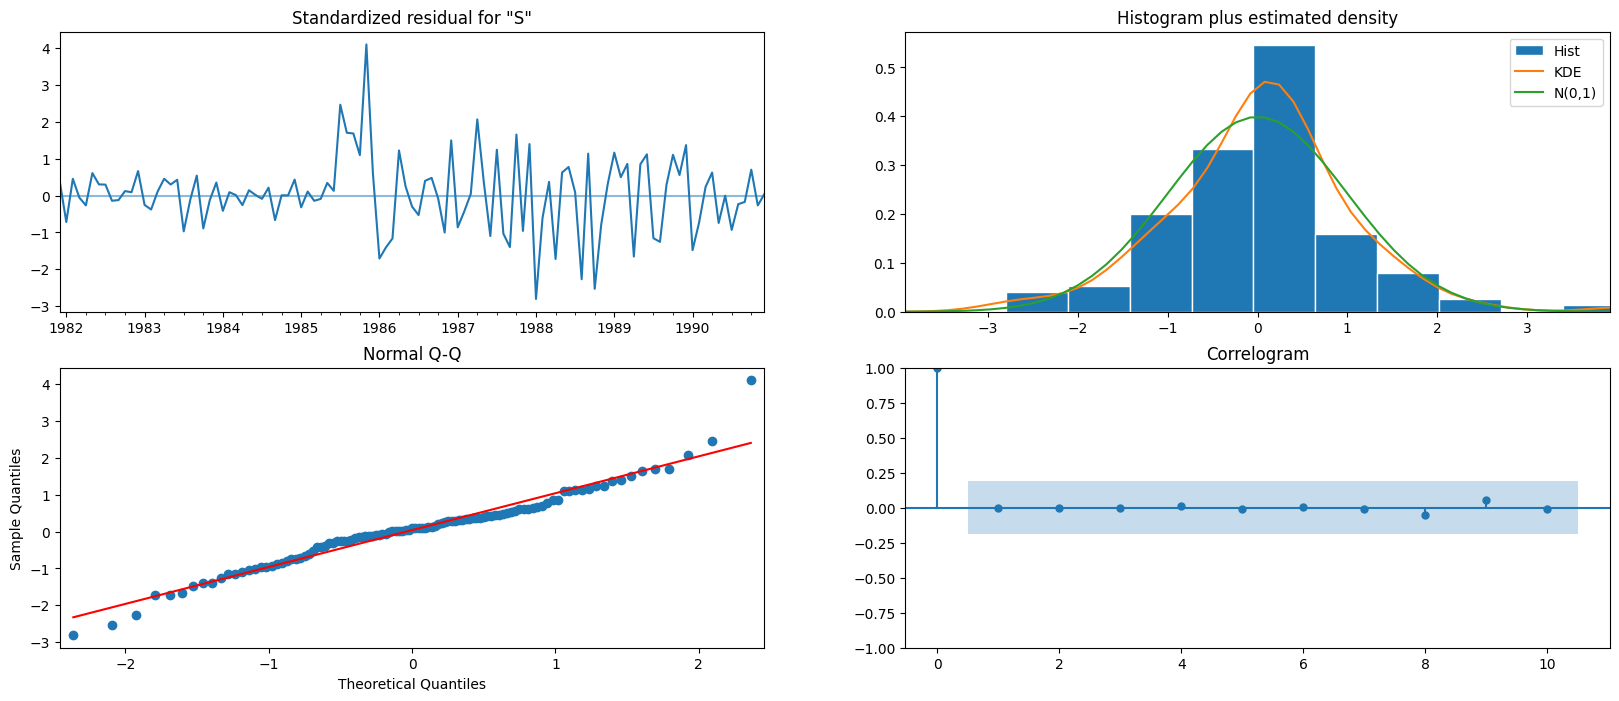

In [134]:
results_auto_SARIMA.plot_diagnostics();

In [135]:
 predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [136]:
rmse = mean_squared_error(test['Shoe_Sales'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Shoe_Sales'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 0.15098832021171987 
MAPE: nan


In [137]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(1,1,3)(3,0,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE  MAPE
Alpha=0.99,SES                      [0.2654185125860849]   NaN
Alpha=1,Beta=0.0189:DES                          0.36507   NaN
Alpha=0.25,Beta=0.0,Gamma=0.74:TES              0.137074   NaN
RegressionOnTime                                0.363304   NaN
NaiveModel                                      0.333035   NaN
SimpleAverageModel                              0.218058   NaN
2pointTrailingMovingAverage                      0.19928   NaN
4pointTrailingMovingAverage                     0.215983   NaN
6pointTrailingMovingAverage                      0.22363   NaN
9pointTrailingMovingAverage                     0.230484   NaN
2pointTrailingMovingAverage                      0.19928   NaN
4pointTrailingMovingAverage                     0.215983   NaN
6pointTrailingMovingAverage                      0.22363   NaN
9pointTrailingMovingAverage                     0.230484   NaN
ARIMA(4,2,1)                                    0.358002   NaN
SARIMA(1,1,3)(3,0,3,6)                          0.150988   NaN

In [138]:


full_data_model = sm.tsa.statespace.SARIMAX(df['Shoe_Sales'],
                                order=(1, 1, 3),
                                seasonal_order=(3, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.83968D+00    |proj g|=  9.58004D-02

At iterate    5    f=  4.82771D+00    |proj g|=  9.75751D-03


/home/avpl/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/avpl/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  4.82430D+00    |proj g|=  7.72242D-03

At iterate   15    f=  4.82119D+00    |proj g|=  4.37948D-02

At iterate   20    f=  4.81790D+00    |proj g|=  2.05353D-02

At iterate   25    f=  4.81149D+00    |proj g|=  1.05646D-01

At iterate   30    f=  4.80565D+00    |proj g|=  3.61196D-02

At iterate   35    f=  4.79834D+00    |proj g|=  7.54636D-02

At iterate   40    f=  4.75388D+00    |proj g|=  1.67153D-01

At iterate   45    f=  4.74080D+00    |proj g|=  8.33355D-03

At iterate   50    f=  4.74045D+00    |proj g|=  1.43217D-03

At iterate   55    f=  4.74037D+00    |proj g|=  1.14558D-02

At iterate   60    f=  4.74012D+00    |proj g|=  2.96553D-03

At iterate   65    f=  4.74011D+00    |proj g|=  3.51818D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

In [139]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [140]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Shoe_Sales        mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  241.693118  51.940889     139.890845     343.495390
1995-09-01  257.083240  57.931299     143.539980     370.626501
1995-10-01  252.489552  66.621727     121.913367     383.065738
1995-11-01  315.282074  71.289482     175.557256     455.006891
1995-12-01  393.639645  75.097046     246.452140     540.827150

In [141]:
rmse = mean_squared_error(df['Shoe_Sales'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 51.127538943197095


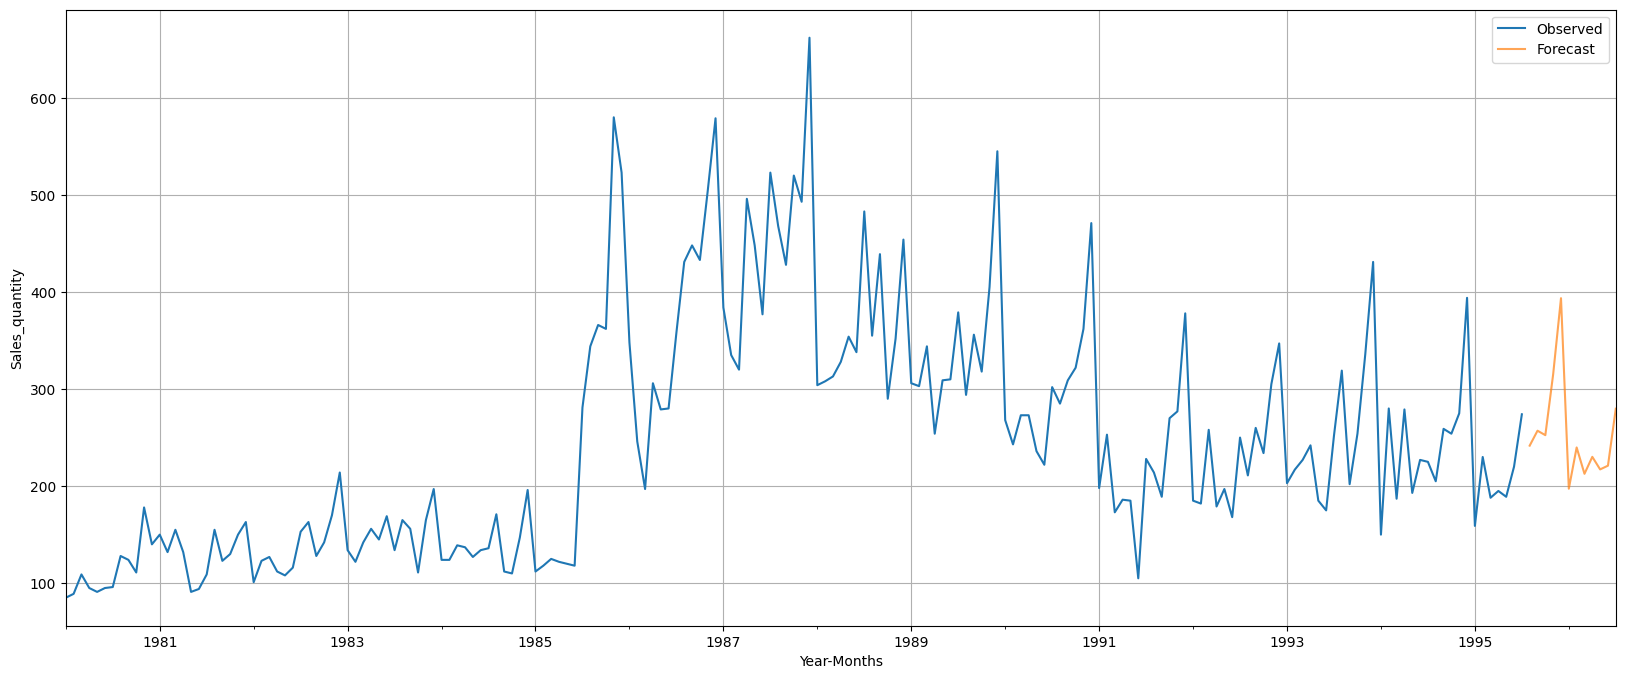

In [142]:
axis = df['Shoe_Sales'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales_quantity')
plt.legend(loc='best')
plt.grid();